<a href="https://colab.research.google.com/github/olusegunajibola/stats_learning/blob/main/MidTerm_Stat_Univaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Files/Intro_to_Stats_Learning_Univaq/MidTerm')
# !ls

In [ ]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from tqdm import tqdm_notebook as tqdm


plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.facecolor'] = "0.92"

import warnings
warnings.filterwarnings("ignore")

# Exercise 1

## Data Preparation

In [ ]:
import scipy.io as spio

mat = spio.loadmat('CrimeData.mat', squeeze_me=True)

In [ ]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fullname', 'Xname', 'Xs_test', 'Xs_training', 'yname', 'ys_test', 'ys_training'])

In [ ]:
Fullname = mat['Fullname']
Xname = mat['Xname']
Xs_test = mat['Xs_test']
Xs_training = mat['Xs_training']
yname = mat['yname']
ys_test = mat['ys_test']
ys_training = mat['ys_training']

In [ ]:
Xs_test.shape, Xs_training.shape

((951, 102), (951, 102))

In [ ]:
Fullname.shape, Xname.shape

((103,), (102,))

In [ ]:
xs_test = pd.DataFrame(Xs_test, columns = Xname)
xs_test

State       pop  perHoush  pctBlack  pctWhite  pctAsian   pctHisp  \
0    0.771571 -0.104095 -0.787319 -0.620185  0.673814  0.126267 -0.414458   
1   -0.109683  0.301403 -0.733037 -0.493857  0.753972 -0.440665 -0.500495   
2   -0.430139 -0.106445 -0.325921 -0.558805  0.809839 -0.312937 -0.491277   
3   -0.670481  0.005771 -0.733037  0.340483  0.099353 -0.552707 -0.520161   
4    0.130659  0.059224 -0.705896 -0.648021  0.842631 -0.362236 -0.514015   
..        ...       ...       ...       ...       ...       ...       ...   
946  0.130659 -0.163244 -0.434485 -0.665150  0.744256 -0.581838 -0.518317   
947  0.290887 -0.172598 -0.407344 -0.660154  0.925824 -0.454110 -0.456862   
948 -1.391506 -0.006061  0.949709 -0.182674 -1.308868  2.770455  1.276162   
949 -0.510253 -0.166454 -0.108793  0.838661 -0.399810 -0.301733 -0.479601   
950  1.252255 -0.161726  0.461170 -0.432477 -0.809098 -0.440665  3.258078   

      pct1221   pct1229   pct1624  ...  persEmergShelt  persHomeless  \
0   -0.661814 -0.293360 -0.503082  ...       -0.079133     -0.068241   
1    0.783104  0.838690  1.013726  ...        0.314665     -0.057002   
2   -0.702607 -0.046279 -0.209127  ...       -0.099393     -0.068241   
3    0.186243  0.037696  0.130181  ...       -0.072802     -0.068241   
4    0.471792  1.205274  1.062439  ...        0.058886     -0.026095   
..        ...       ...       ...  ...             ...           ...   
946 -0.135804 -0.592117 -0.541717  ...       -0.099393     -0.068241   
947 -0.863630 -0.451620 -0.487965  ...       -0.099393     -0.068241   
948  0.218448  0.397821  0.056272  ...       -0.018354     -0.068241   
949  0.626374  0.570616  0.498045  ...       -0.099393     -0.068241   
950  0.583435  0.373597  0.121782  ...       -0.099393     -0.068241   

     pctForeignBorn  pctBornStateResid  pctSameHouse5  pctSameCounty5  \
0         -0.331330          -0.875846      -1.349846       -1.421593   
1         -0.721816           0.278048      -0.819515       -0.569556   
2          0.134805           1.041221       1.152683        0.489341   
3         -0.790790           0.829064       0.351128        0.791883   
4         -0.666191          -0.047848      -0.965845       -0.810131   
..              ...                ...            ...             ...   
946       -0.697341           0.717682      -0.196911        0.605983   
947       -0.157781           0.383536       1.748257        1.053417   
948        1.215037          -0.410281      -1.108447       -0.207781   
949       -0.638379           0.915106      -0.182931        0.175864   
950       -0.633929           1.333525       0.276565        0.260612   

     pctSameState5  landArea  popDensity  pctUsePubTrans  
0        -0.619554 -0.130190   -0.031649        0.238850  
1        -0.248281  0.270206   -0.288237       -0.432358  
2         0.791548 -0.128181   -0.076549        1.275274  
3         0.524654  0.061304   -0.445223       -0.485659  
4        -0.812458  0.005730   -0.156349       -0.345495  
..             ...       ...         ...             ...  
946       0.568256 -0.152955   -0.344084       -0.623849  
947       0.969918 -0.183755    0.402610       -0.383004  
948      -0.219213 -0.089347    0.159354       -0.507375  
949       0.701703 -0.152285   -0.390487       -0.396823  
950       0.861575 -0.158981   -0.240364       -0.623849  

[951 rows x 102 columns]

In [ ]:
xs_training = pd.DataFrame(Xs_training, columns = Xname)
xs_training

State       pop  perHoush  pctBlack  pctWhite  pctAsian   pctHisp  \
0    0.297813 -0.355051  1.218397 -0.571794  0.498565  0.744900 -0.442925   
1    0.844267 -0.242358  0.356753 -0.612731  0.731356  0.132760 -0.513599   
2    1.234592  0.571431 -0.258707  0.991716 -0.986632 -0.371355  0.549937   
3    1.234592 -0.156618 -0.504891  0.236893 -0.027212 -0.401362 -0.270701   
4   -0.560902 -0.065193 -0.504891  0.204575  0.167498 -0.331346 -0.525263   
..        ...       ...       ...       ...       ...       ...       ...   
946 -1.263487 -0.332569  0.818348 -0.592622 -0.083721 -0.273333  1.802849   
947  1.234592 -0.326491 -0.320253 -0.474120  0.536033 -0.429368 -0.131412   
948 -1.185422  0.070123 -0.504891  0.222529  0.028068 -0.149304 -0.326965   
949 -1.341552 -0.144249 -0.751075 -0.632841  0.550160 -0.359352  0.182845   
950 -1.341552 -0.183954 -0.289480 -0.498538 -0.761211  1.263018  1.104347   

      pct1221   pct1229   pct1624  ...  persEmergShelt  persHomeless  \
0   -0.443241 -0.991433 -0.514758  ...       -0.163936     -0.138286   
1   -0.781028 -1.014330 -0.592008  ...       -0.203443     -0.138286   
2    1.271147  1.152760  1.320346  ...       -0.049008     -0.099995   
3    0.310997  0.174707  0.211387  ...       -0.199851     -0.138286   
4    1.648266  1.525663  1.722043  ...       -0.102881     -0.119140   
..        ...       ...       ...  ...             ...           ...   
946  0.172181 -0.019922 -0.277860  ...       -0.099289     -0.138286   
947 -0.003654 -0.369928 -0.202327  ...       -0.135204     -0.138286   
948 -0.584371  0.035686 -0.128511  ...        0.026413     -0.138286   
949 -0.595939 -1.069939 -0.755090  ...       -0.045417     -0.138286   
950 -0.322933 -0.374834 -0.394592  ...       -0.167528     -0.119140   

     pctForeignBorn  pctBornStateResid  pctSameHouse5  pctSameCounty5  \
0          0.355253          -0.389608       1.285377        0.089562   
1          0.082011           0.981635       1.842052        1.222803   
2         -0.342904           0.889244      -0.851959       -0.287874   
3         -0.535100           0.312679      -0.608065       -0.215937   
4         -0.700667           0.593360      -0.928293       -0.415865   
..              ...                ...            ...             ...   
946       -0.054610          -0.383760       0.160855       -0.170159   
947       -0.516575           0.844218      -0.540109       -0.534515   
948        0.090115           0.580495       0.710083        0.852841   
949       -0.027981          -0.685492      -0.442365       -0.148671   
950        1.030254          -0.297802      -0.255255       -1.021257   

     pctSameState5  landArea  popDensity  pctUsePubTrans  
0         0.184280 -0.273203   -0.312734        1.382337  
1         1.124568 -0.216781   -0.192079        0.177564  
2         0.585721  0.717616   -0.499169       -0.463316  
3         0.119619  0.169913   -0.677320       -0.621456  
4         0.147908  0.050189   -0.486813       -0.563194  
..             ...       ...         ...             ...  
946       0.079205 -0.149351   -0.641668       -0.502851  
947       0.923848 -0.130085   -0.655971       -0.523659  
948       0.499506 -0.208525    0.737476        0.075606  
949       0.609969  0.015786   -0.543105       -0.596486  
950       0.176198 -0.064030   -0.495027       -0.332227  

[951 rows x 102 columns]

In [ ]:
yname = np.array([yname])
yname

array(['violentPerPop'], dtype='<U13')

In [ ]:
ys_test = pd.DataFrame(ys_test, columns = yname)
ys_training = pd.DataFrame(ys_training, columns = yname)
# ys_test,ys_training

In [ ]:
# del kols

In [ ]:

kols = ['violentPerPop']
for i in xs_test.columns:
  kols.append(i)
kols

['violentPerPop',
 'State',
 'pop',
 'perHoush',
 'pctBlack',
 'pctWhite',
 'pctAsian',
 'pctHisp',
 'pct1221',
 'pct1229',
 'pct1624',
 'pct65up',
 'persUrban',
 'pctUrban',
 'medIncome',
 'pctWwage',
 'pctWfarm',
 'pctWdiv',
 'pctWsocsec',
 'pctPubAsst',
 'pctRetire',
 'medFamIncome',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'NAperCap',
 'asianPerCap',
 'otherPerCap',
 'hispPerCap',
 'persPoverty',
 'pctPoverty',
 'pctLowEdu',
 'pctNotHSgrad',
 'pctCollGrad',
 'pctUnemploy',
 'pctEmploy',
 'pctEmployMfg',
 'pctEmployProfServ',
 'pctOccupManu',
 'pctOccupMgmt',
 'pctMaleDivorc',
 'pctMaleNevMar',
 'pctFemDivorc',
 'pctAllDivorc',
 'persPerFam',
 'pct2Par',
 'pctKids2Par',
 'pctKids4w2Par',
 'pct1217w2Par',
 'pctWorkMom6',
 'pctWorkMom18',
 'kidsBornNevrMarr',
 'pctKidsBornNevrMarr',
 'numForeignBorn',
 'pctFgnImmig3',
 'pctFgnImmig5',
 'pctFgnImmig8',
 'pctFgnImmig10',
 'pctImmig3',
 'pctImmig5',
 'pctImmig8',
 'pctImmig10',
 'pctSpeakOnlyEng',
 'pctNotSpeakEng',
 'pctLargHousFa

In [ ]:
X = pd.concat([xs_test, xs_training])
y = pd.concat([ys_test, ys_training])

In [ ]:
X

State       pop  perHoush  pctBlack  pctWhite  pctAsian   pctHisp  \
0    0.771571 -0.104095 -0.787319 -0.620185  0.673814  0.126267 -0.414458   
1   -0.109683  0.301403 -0.733037 -0.493857  0.753972 -0.440665 -0.500495   
2   -0.430139 -0.106445 -0.325921 -0.558805  0.809839 -0.312937 -0.491277   
3   -0.670481  0.005771 -0.733037  0.340483  0.099353 -0.552707 -0.520161   
4    0.130659  0.059224 -0.705896 -0.648021  0.842631 -0.362236 -0.514015   
..        ...       ...       ...       ...       ...       ...       ...   
946 -1.263487 -0.332569  0.818348 -0.592622 -0.083721 -0.273333  1.802849   
947  1.234592 -0.326491 -0.320253 -0.474120  0.536033 -0.429368 -0.131412   
948 -1.185422  0.070123 -0.504891  0.222529  0.028068 -0.149304 -0.326965   
949 -1.341552 -0.144249 -0.751075 -0.632841  0.550160 -0.359352  0.182845   
950 -1.341552 -0.183954 -0.289480 -0.498538 -0.761211  1.263018  1.104347   

      pct1221   pct1229   pct1624  ...  persEmergShelt  persHomeless  \
0   -0.661814 -0.293360 -0.503082  ...       -0.079133     -0.068241   
1    0.783104  0.838690  1.013726  ...        0.314665     -0.057002   
2   -0.702607 -0.046279 -0.209127  ...       -0.099393     -0.068241   
3    0.186243  0.037696  0.130181  ...       -0.072802     -0.068241   
4    0.471792  1.205274  1.062439  ...        0.058886     -0.026095   
..        ...       ...       ...  ...             ...           ...   
946  0.172181 -0.019922 -0.277860  ...       -0.099289     -0.138286   
947 -0.003654 -0.369928 -0.202327  ...       -0.135204     -0.138286   
948 -0.584371  0.035686 -0.128511  ...        0.026413     -0.138286   
949 -0.595939 -1.069939 -0.755090  ...       -0.045417     -0.138286   
950 -0.322933 -0.374834 -0.394592  ...       -0.167528     -0.119140   

     pctForeignBorn  pctBornStateResid  pctSameHouse5  pctSameCounty5  \
0         -0.331330          -0.875846      -1.349846       -1.421593   
1         -0.721816           0.278048      -0.819515       -0.569556   
2          0.134805           1.041221       1.152683        0.489341   
3         -0.790790           0.829064       0.351128        0.791883   
4         -0.666191          -0.047848      -0.965845       -0.810131   
..              ...                ...            ...             ...   
946       -0.054610          -0.383760       0.160855       -0.170159   
947       -0.516575           0.844218      -0.540109       -0.534515   
948        0.090115           0.580495       0.710083        0.852841   
949       -0.027981          -0.685492      -0.442365       -0.148671   
950        1.030254          -0.297802      -0.255255       -1.021257   

     pctSameState5  landArea  popDensity  pctUsePubTrans  
0        -0.619554 -0.130190   -0.031649        0.238850  
1        -0.248281  0.270206   -0.288237       -0.432358  
2         0.791548 -0.128181   -0.076549        1.275274  
3         0.524654  0.061304   -0.445223       -0.485659  
4        -0.812458  0.005730   -0.156349       -0.345495  
..             ...       ...         ...             ...  
946       0.079205 -0.149351   -0.641668       -0.502851  
947       0.923848 -0.130085   -0.655971       -0.523659  
948       0.499506 -0.208525    0.737476        0.075606  
949       0.609969  0.015786   -0.543105       -0.596486  
950       0.176198 -0.064030   -0.495027       -0.332227  

[1902 rows x 102 columns]

In [ ]:
X.shape, y.shape

((1902, 102), (1902, 1))

In [ ]:
y

violentPerPop
0        -0.621913
1        -0.259534
2        -0.608927
3        -0.264735
4        -0.788728
..             ...
946      -0.241791
947       0.098397
948      -0.141829
949       0.051700
950       0.915687

[1902 rows x 1 columns]

In [ ]:
data = X.copy()
data['violentPerPop']= y
data

State       pop  perHoush  pctBlack  pctWhite  pctAsian   pctHisp  \
0    0.771571 -0.104095 -0.787319 -0.620185  0.673814  0.126267 -0.414458   
1   -0.109683  0.301403 -0.733037 -0.493857  0.753972 -0.440665 -0.500495   
2   -0.430139 -0.106445 -0.325921 -0.558805  0.809839 -0.312937 -0.491277   
3   -0.670481  0.005771 -0.733037  0.340483  0.099353 -0.552707 -0.520161   
4    0.130659  0.059224 -0.705896 -0.648021  0.842631 -0.362236 -0.514015   
..        ...       ...       ...       ...       ...       ...       ...   
946 -1.263487 -0.332569  0.818348 -0.592622 -0.083721 -0.273333  1.802849   
947  1.234592 -0.326491 -0.320253 -0.474120  0.536033 -0.429368 -0.131412   
948 -1.185422  0.070123 -0.504891  0.222529  0.028068 -0.149304 -0.326965   
949 -1.341552 -0.144249 -0.751075 -0.632841  0.550160 -0.359352  0.182845   
950 -1.341552 -0.183954 -0.289480 -0.498538 -0.761211  1.263018  1.104347   

      pct1221   pct1229   pct1624  ...  persHomeless  pctForeignBorn  \
0   -0.661814 -0.293360 -0.503082  ...     -0.068241       -0.331330   
1    0.783104  0.838690  1.013726  ...     -0.057002       -0.721816   
2   -0.702607 -0.046279 -0.209127  ...     -0.068241        0.134805   
3    0.186243  0.037696  0.130181  ...     -0.068241       -0.790790   
4    0.471792  1.205274  1.062439  ...     -0.026095       -0.666191   
..        ...       ...       ...  ...           ...             ...   
946  0.172181 -0.019922 -0.277860  ...     -0.138286       -0.054610   
947 -0.003654 -0.369928 -0.202327  ...     -0.138286       -0.516575   
948 -0.584371  0.035686 -0.128511  ...     -0.138286        0.090115   
949 -0.595939 -1.069939 -0.755090  ...     -0.138286       -0.027981   
950 -0.322933 -0.374834 -0.394592  ...     -0.119140        1.030254   

     pctBornStateResid  pctSameHouse5  pctSameCounty5  pctSameState5  \
0            -0.875846      -1.349846       -1.421593      -0.619554   
1             0.278048      -0.819515       -0.569556      -0.248281   
2             1.041221       1.152683        0.489341       0.791548   
3             0.829064       0.351128        0.791883       0.524654   
4            -0.047848      -0.965845       -0.810131      -0.812458   
..                 ...            ...             ...            ...   
946          -0.383760       0.160855       -0.170159       0.079205   
947           0.844218      -0.540109       -0.534515       0.923848   
948           0.580495       0.710083        0.852841       0.499506   
949          -0.685492      -0.442365       -0.148671       0.609969   
950          -0.297802      -0.255255       -1.021257       0.176198   

     landArea  popDensity  pctUsePubTrans  violentPerPop  
0   -0.130190   -0.031649        0.238850      -0.621913  
1    0.270206   -0.288237       -0.432358      -0.259534  
2   -0.128181   -0.076549        1.275274      -0.608927  
3    0.061304   -0.445223       -0.485659      -0.264735  
4    0.005730   -0.156349       -0.345495      -0.788728  
..        ...         ...             ...            ...  
946 -0.149351   -0.641668       -0.502851      -0.241791  
947 -0.130085   -0.655971       -0.523659       0.098397  
948 -0.208525    0.737476        0.075606      -0.141829  
949  0.015786   -0.543105       -0.596486       0.051700  
950 -0.064030   -0.495027       -0.332227       0.915687  

[1902 rows x 103 columns]

## Exploratory Data Analysis (EDA)

In [ ]:
data.describe()

State           pop      perHoush      pctBlack      pctWhite  \
count  1.902000e+03  1.902000e+03  1.902000e+03  1.902000e+03  1.902000e+03   
mean  -3.969252e-18 -6.216548e-18  9.284255e-16 -8.177826e-17  1.108530e-15   
std    9.997369e-01  9.997369e-01  9.997369e-01  9.997369e-01  9.997369e-01   
min   -1.711962e+00 -3.749341e-01 -3.040028e+00 -6.730008e-01 -4.974183e+00   
25%   -9.909366e-01 -2.526993e-01 -6.244728e-01 -6.054614e-01 -4.753739e-01   
50%    2.197476e-01 -1.514162e-01 -1.630747e-01 -4.522148e-01  3.814866e-01   
75%    8.498305e-01 -5.109318e-02  4.182993e-01  1.481827e-01  7.609493e-01   
max    1.732939e+00  2.650309e+01  6.947884e+00  6.272605e+00  9.956583e-01   

           pctAsian       pctHisp       pct1221       pct1229       pct1624  \
count  1.902000e+03  1.902000e+03  1.902000e+03  1.902000e+03  1.902000e+03   
mean   1.473293e-16  3.829160e-17  7.144653e-17  3.213635e-16  8.980432e-17   
std    9.997369e-01  9.997369e-01  9.997369e-01  9.997369e-01  9.997369e-01   
min   -6.221729e-01 -5.636877e-01 -2.117467e+00 -2.957956e+00 -1.573080e+00   
25%   -4.573746e-01 -5.029533e-01 -4.936558e-01 -5.253041e-01 -4.511840e-01   
50%   -3.279841e-01 -4.074718e-01 -1.768858e-01 -1.371870e-01 -2.452433e-01   
75%    7.309659e-03  1.366291e-03  2.184479e-01  2.630261e-01  7.097007e-02   
max    1.093922e+01  5.666570e+00  8.578790e+00  7.034160e+00  8.530295e+00   

       ...  persHomeless  pctForeignBorn  pctBornStateResid  pctSameHouse5  \
count  ...  1.902000e+03    1.902000e+03       1.902000e+03   1.902000e+03   
mean   ... -5.026503e-17   -1.424261e-16       8.101943e-17  -2.879167e-16   
std    ...  9.997369e-01    9.997369e-01       9.997369e-01   9.997369e-01   
min    ... -1.382858e-01   -8.631025e-01      -3.116452e+00  -3.658510e+00   
25%    ... -1.382858e-01   -6.361537e-01      -6.859363e-01  -6.224666e-01   
50%    ... -6.824128e-02   -3.579930e-01       1.105221e-01   4.961285e-02   
75%    ... -6.824128e-02    2.527292e-01       8.225826e-01   6.864673e-01   
max    ...  2.928552e+01    5.831888e+00       1.971761e+00   2.520675e+00   

       pctSameCounty5  pctSameState5      landArea    popDensity  \
count    1.902000e+03   1.902000e+03  1.902000e+03  1.902000e+03   
mean     1.602877e-15  -1.132404e-15  5.053499e-17  3.408887e-17   
std      9.997369e-01   9.997369e-01  9.997369e-01  9.997369e-01   
min     -4.457035e+00  -7.228481e+00 -3.502666e-01 -9.371258e-01   
25%     -4.868682e-01  -4.058409e-01 -1.856051e-01 -5.548059e-01   
50%      1.895328e-01   2.567319e-01 -1.275118e-01 -2.759500e-01   
75%      7.082735e-01   6.773252e-01 -2.412219e-02  1.695205e-01   
max      1.817918e+00   1.633189e+00  2.384084e+01  1.469269e+01   

       pctUsePubTrans  violentPerPop  
count    1.902000e+03   1.902000e+03  
mean    -3.379701e-17   1.199006e-15  
std      9.997369e-01   9.997369e-01  
min     -6.238492e-01  -3.547563e+00  
25%     -5.487809e-01  -6.945392e-01  
50%     -3.731333e-01  -1.775725e-01  
75%      7.339960e-02   6.006284e-01  
max      1.010166e+01   5.528645e+00  

[8 rows x 103 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 950
Columns: 103 entries, State to violentPerPop
dtypes: float64(103)
memory usage: 1.5 MB


In [ ]:
y.describe()

violentPerPop
count   1.902000e+03
mean    1.199006e-15
std     9.997369e-01
min    -3.547563e+00
25%    -6.945392e-01
50%    -1.775725e-01
75%     6.006284e-01
max     5.528645e+00

In [ ]:
k = X.dtypes
k = k.to_frame()

In [ ]:
k[0].unique()

array([dtype('<f8')], dtype=object)

In [ ]:
from PIL import Image 
import PIL

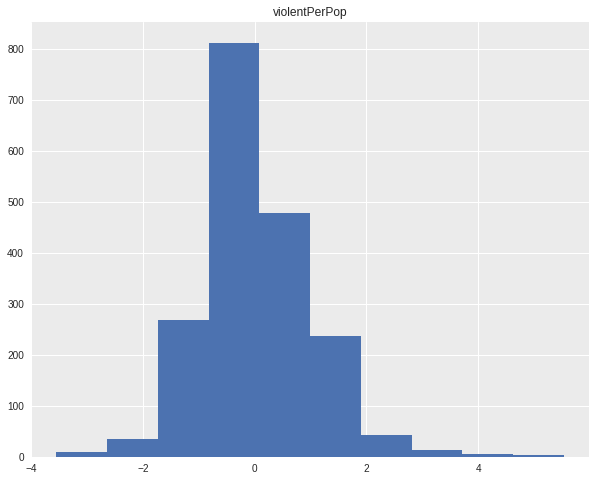

In [ ]:
yhist = y.hist()
# y.hist()
plt.savefig("./Images/yhist.jpg");

In [ ]:
data.corr()

State       pop  perHoush  pctBlack  pctWhite  pctAsian  \
State           1.000000 -0.062429 -0.058147 -0.029920  0.201837 -0.306497   
pop            -0.062429  1.000000 -0.026272  0.149061 -0.203688  0.110590   
perHoush       -0.058147 -0.026272  1.000000 -0.062599 -0.244725  0.190430   
pctBlack       -0.029920  0.149061 -0.062599  1.000000 -0.796599 -0.090337   
pctWhite        0.201837 -0.203688 -0.244725 -0.796599  1.000000 -0.295927   
...                  ...       ...       ...       ...       ...       ...   
pctSameState5   0.116415 -0.043842 -0.047066 -0.004660  0.032063 -0.141185   
landArea       -0.070279  0.302722 -0.006677  0.051045 -0.052001 -0.001660   
popDensity     -0.126277  0.212557  0.031340  0.101046 -0.328047  0.297867   
pctUsePubTrans -0.028276  0.319408 -0.053610  0.174017 -0.228037  0.229208   
violentPerPop  -0.205759  0.240745 -0.057026  0.568724 -0.646464  0.055075   

                 pctHisp   pct1221   pct1229   pct1624  ...  persHomeless  \
State          -0.178317  0.113217  0.053735  0.069314  ...     -0.055056   
pop             0.093690 -0.006254  0.063561  0.026489  ...      0.804124   
perHoush        0.502202  0.488157  0.382904  0.311741  ...     -0.021444   
pctBlack       -0.078270  0.085965  0.120353  0.089338  ...      0.078069   
pctWhite       -0.422269 -0.140948 -0.219423 -0.126916  ...     -0.128027   
...                  ...       ...       ...       ...  ...           ...   
pctSameState5   0.020909 -0.198861 -0.330317 -0.286627  ...     -0.029368   
landArea       -0.010220  0.004373  0.025429  0.006961  ...      0.145009   
popDensity      0.365914 -0.066372  0.096571  0.030215  ...      0.200958   
pctUsePubTrans  0.082629 -0.136925 -0.018511 -0.037610  ...      0.298086   
violentPerPop   0.292384  0.020132  0.125804  0.056245  ...      0.152508   

                pctForeignBorn  pctBornStateResid  pctSameHouse5  \
State                -0.358086           0.350341       0.142335   
pop                   0.136709          -0.086175      -0.058231   
perHoush              0.339147          -0.056611      -0.073194   
pctBlack             -0.093983           0.092383      -0.041407   
pctWhite             -0.386220           0.115096       0.165052   
...                        ...                ...            ...   
pctSameState5        -0.113690           0.736418       0.656604   
landArea             -0.033808          -0.079046      -0.091885   
popDensity            0.625294          -0.220985       0.024779   
pctUsePubTrans        0.385192          -0.165216       0.183465   
violentPerPop         0.210253          -0.091913      -0.199227   

                pctSameCounty5  pctSameState5  landArea  popDensity  \
State                 0.051026       0.116415 -0.070279   -0.126277   
pop                   0.012583      -0.043842  0.302722    0.212557   
perHoush             -0.122565      -0.047066 -0.006677    0.031340   
pctBlack              0.057096      -0.004660  0.051045    0.101046   
pctWhite             -0.023360       0.032063 -0.052001   -0.328047   
...                        ...            ...       ...         ...   
pctSameState5         0.737260       1.000000 -0.087882   -0.015070   
landArea             -0.067609      -0.087882  1.000000   -0.091859   
popDensity            0.109137      -0.015070 -0.091859    1.000000   
pctUsePubTrans        0.075427      -0.041265 -0.000204    0.612535   
violentPerPop         0.052826      -0.007698  0.087803    0.250134   

                pctUsePubTrans  violentPerPop  
State                -0.028276      -0.205759  
pop                   0.319408       0.240745  
perHoush             -0.053610      -0.057026  
pctBlack              0.174017       0.568724  
pctWhite             -0.228037      -0.646464  
...                        ...            ...  
pctSameState5        -0.041265      -0.007698  
landArea             -0.000204       0.087803  
popDensity            0.612535       0.250134  
pctUseP

In [ ]:
def heatmap(data_, height, width):
  """Function to create a correlation heeatmap"""
  heatmap = data_.corr()

  fig, ax = plt.subplots()
  im = ax.pcolor(heatmap, cmap='RdBu')

#label names
  row_labels = heatmap.columns
  col_labels = heatmap.index

#move ticks and labels to the center
  ax.set_xticks(np.arange(heatmap.shape[1]) + 0.5, minor=False)
  ax.set_yticks(np.arange(heatmap.shape[0]) + 0.5, minor=False)

#insert labels
  ax.set_xticklabels(row_labels, minor=False)
  ax.set_yticklabels(col_labels, minor=False)

#tick sizes
  plt.xticks(fontsize=25)
  plt.yticks(fontsize=22)

#rotate label if too long
  plt.xticks(rotation=90)

  fig.colorbar(im)
  plt.rcParams['figure.figsize'] = height, width

  plt.grid(True)
  plt.show()

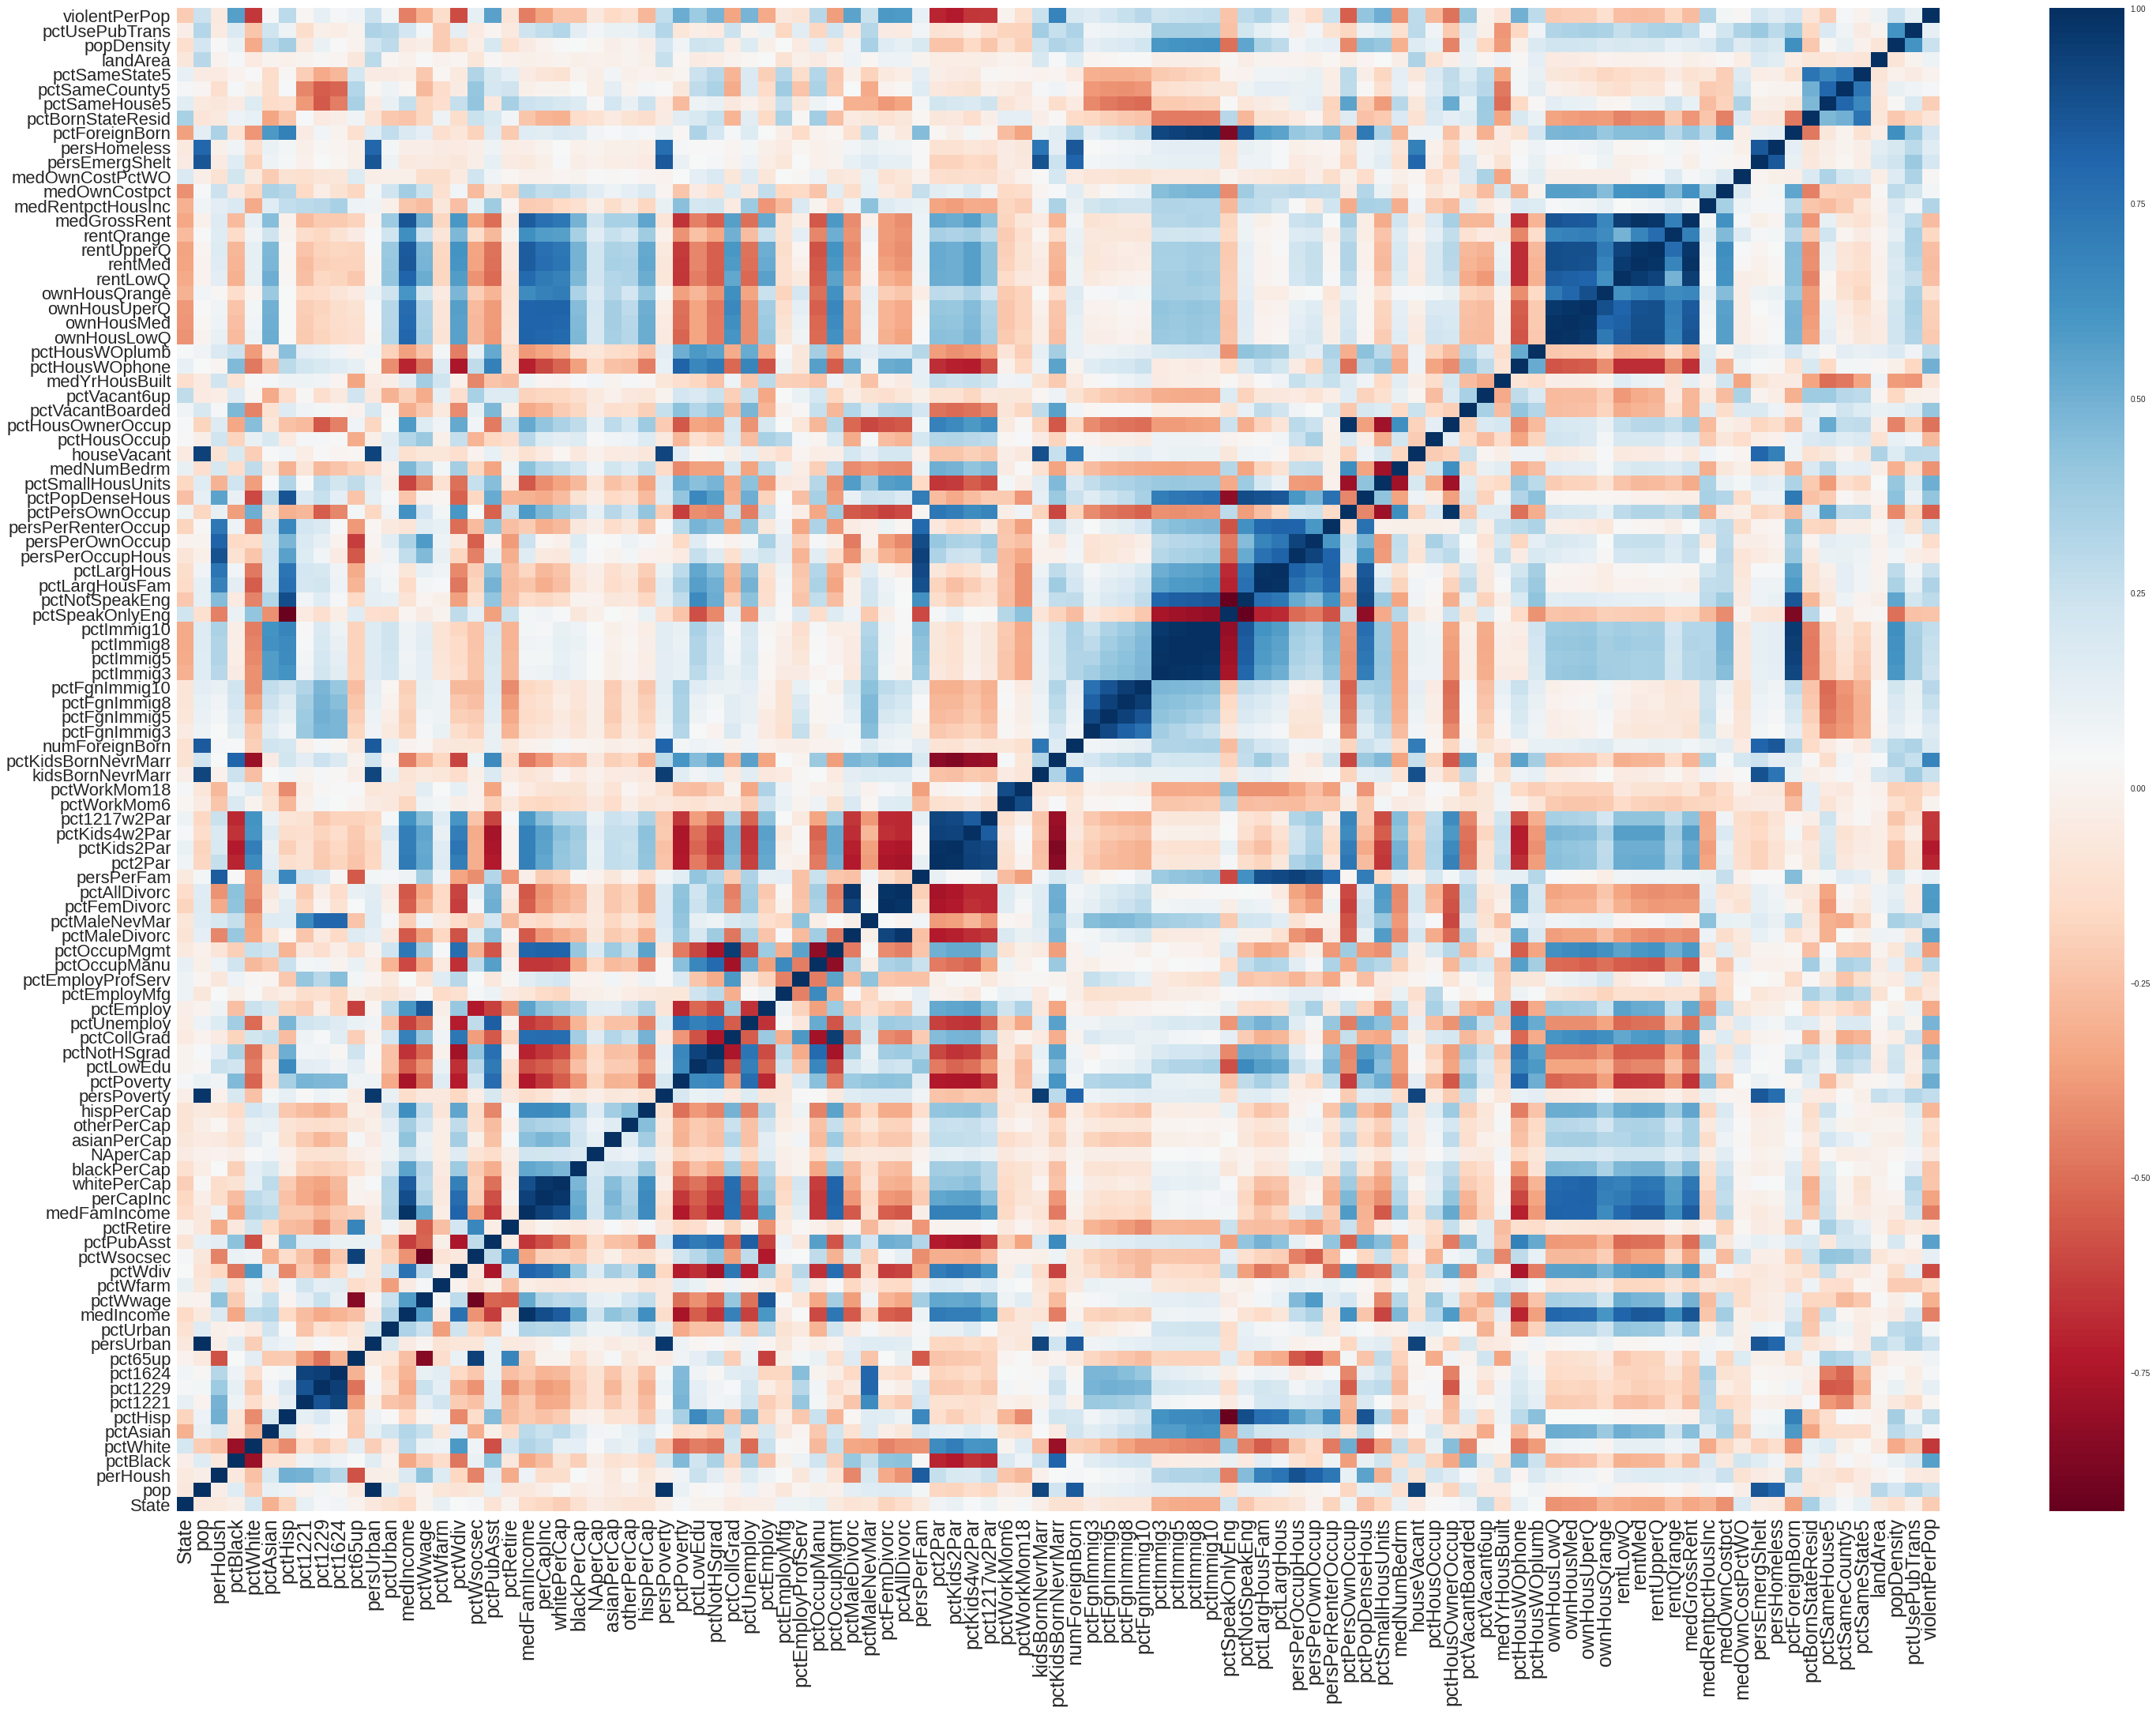

<Figure size 3600x2520 with 0 Axes>

In [ ]:
ht = heatmap(data,50,35)
plt.savefig("./Images/CorrelPlot.png")

The correlation heatmap is quite huge and some variables are highly correlated. 

In [ ]:
print(data.dtypes)

State             float64
pop               float64
perHoush          float64
pctBlack          float64
pctWhite          float64
                   ...   
pctSameState5     float64
landArea          float64
popDensity        float64
pctUsePubTrans    float64
violentPerPop     float64
Length: 103, dtype: object


In [ ]:
uniq = data.dtypes
uniq = uniq.to_frame(name = 'datatype')
uniq['datatype'].unique()

array([dtype('<f8')], dtype=object)

In [ ]:
for col in uniq:
  print(uniq[col].unique())

[dtype('<f8')]


The entire dataset consists of 64-bit floating-point number.

In [ ]:
data.iloc[:,-20:].corr()

ownHousQrange  rentLowQ   rentMed  rentUpperQ  rentQrange  \
ownHousQrange           1.000000  0.616976  0.679716    0.718722    0.642698   
rentLowQ                0.616976  1.000000  0.962083    0.927261    0.489359   
rentMed                 0.679716  0.962083  1.000000    0.979496    0.674085   
rentUpperQ              0.718722  0.927261  0.979496    1.000000    0.779842   
rentQrange              0.642698  0.489359  0.674085    0.779842    1.000000   
medGrossRent            0.663121  0.948360  0.988005    0.976915    0.691191   
medRentpctHousInc       0.122452  0.041092  0.063639    0.094141    0.148626   
medOwnCostpct           0.456251  0.608870  0.623294    0.635871    0.463426   
medOwnCostPctWO        -0.028966 -0.030551  0.027480    0.046041    0.157280   
persEmergShelt          0.084874 -0.019905 -0.009589    0.008764    0.054903   
persHomeless            0.098267  0.015479  0.021631    0.037737    0.063218   
pctForeignBorn          0.400128  0.449343  0.446437    0.452903    0.304573   
pctBornStateResid      -0.375256 -0.438907 -0.407541   -0.408759   -0.220454   
pctSameHouse5           0.010921  0.017935  0.097182    0.109078    0.224357   
pctSameCounty5         -0.106652 -0.124566 -0.078339   -0.085999    0.007931   
pctSameState5          -0.174920 -0.152192 -0.118945   -0.126945   -0.042507   
landArea               -0.008262 -0.016679 -0.015736   -0.008503    0.008713   
popDensity              0.176774  0.199437  0.185530    0.194865    0.120668   
pctUsePubTrans          0.339152  0.267605  0.314154    0.340352    0.346368   
violentPerPop          -0.117345 -0.257205 -0.259219   -0.254637   -0.164696   

                   medGrossRent  medRentpctHousInc  medOwnCostpct  \
ownHousQrange          0.663121           0.122452       0.456251   
rentLowQ               0.948360           0.041092       0.608870   
rentMed                0.988005           0.063639       0.623294   
rentUpperQ             0.976915           0.094141       0.635871   
rentQrange             0.691191           0.148626       0.463426   
medGrossRent           1.000000           0.060724       0.618267   
medRentpctHousInc      0.060724           1.000000       0.355335   
medOwnCostpct          0.618267           0.355335       1.000000   
medOwnCostPctWO        0.052903           0.085707       0.178706   
persEmergShelt        -0.020252           0.053688       0.027567   
persHomeless           0.012580           0.055248       0.065198   
pctForeignBorn         0.408904           0.298215       0.541508   
pctBornStateResid     -0.387746          -0.228989      -0.450306   
pctSameHouse5          0.116950          -0.258373      -0.187208   
pctSameCounty5        -0.070549          -0.205832      -0.191955   
pctSameState5         -0.107397          -0.082188      -0.202956   
landArea              -0.017675          -0.002503       0.027324   
popDensity             0.147503           0.177994       0.288247   
pctUsePubTrans         0.286660           0.070361       0.222826   
violentPerPop         -0.263121           0.327587       0.059188   

                   medOwnCostPctWO  persEmergShelt  persHomeless  \
ownHousQrange            -0.028966        0.084874      0.098267   
rentLowQ                 -0.030551       -0.019905      0.015479   
rentMed                   0.027480       -0.009589      0.021631   
rentUpperQ                0.046041        0.008764      0.037737   
rentQrange                0.157280        0.054903      0.063218   
medGrossRent              0.052903       -0.020252      0.012580   
medRentpctHousInc         0.085707        0.053688      0.055248   
medOwnCostpct             0.178706        0.027567      0.065198   
medOwnCostPctWO           1.000000        0.009549     -0.017295   
persEmergShelt            0.009549        1.000000      0.852072   
persHomeless             -0.017295        0.852072      1.000000   
pctForeignBorn           -0.024979        0.107244      0.130021   
pctB

In [ ]:
data.shape

(1902, 103)

In [ ]:
data[['pctHisp','pctAsian','pctWhite','pctBlack','violentPerPop']].corr()

pctHisp  pctAsian  pctWhite  pctBlack  violentPerPop
pctHisp        1.000000  0.191683 -0.422269 -0.078270       0.292384
pctAsian       0.191683  1.000000 -0.295927 -0.090337       0.055075
pctWhite      -0.422269 -0.295927  1.000000 -0.796599      -0.646464
pctBlack      -0.078270 -0.090337 -0.796599  1.000000       0.568724
violentPerPop  0.292384  0.055075 -0.646464  0.568724       1.000000

In [ ]:
data[kols[0:19]].corr()

violentPerPop     State       pop  perHoush  pctBlack  \
violentPerPop       1.000000 -0.205759  0.240745 -0.057026  0.568724   
State              -0.205759  1.000000 -0.062429 -0.058147 -0.029920   
pop                 0.240745 -0.062429  1.000000 -0.026272  0.149061   
perHoush           -0.057026 -0.058147 -0.026272  1.000000 -0.062599   
pctBlack            0.568724 -0.029920  0.149061 -0.062599  1.000000   
pctWhite           -0.646464  0.201837 -0.203688 -0.244725 -0.796599   
pctAsian            0.055075 -0.306497  0.110590  0.190430 -0.090337   
pctHisp             0.292384 -0.178317  0.093690  0.502202 -0.078270   
pct1221             0.020132  0.113217 -0.006254  0.488157  0.085965   
pct1229             0.125804  0.053735  0.063561  0.382904  0.120353   
pct1624             0.056245  0.069314  0.026489  0.311741  0.089338   
pct65up             0.077105 -0.008032 -0.060712 -0.581443  0.038234   
persUrban           0.239401 -0.065545  0.997893 -0.027142  0.146837   
pctUrban            0.061465 -0.109997  0.149011 -0.018611 -0.003568   
medIncome          -0.446302 -0.159070 -0.061925  0.179975 -0.337928   
pctWwage           -0.308136  0.001678 -0.001854  0.423287 -0.207970   
pctWfarm           -0.131787  0.105670 -0.082664  0.168615 -0.138901   
pctWdiv            -0.592697  0.038741 -0.097430 -0.166635 -0.479414   
pctWsocsec          0.118859  0.054550 -0.075252 -0.439223  0.101262   

               pctWhite  pctAsian   pctHisp   pct1221   pct1229   pct1624  \
violentPerPop -0.646464  0.055075  0.292384  0.020132  0.125804  0.056245   
State          0.201837 -0.306497 -0.178317  0.113217  0.053735  0.069314   
pop           -0.203688  0.110590  0.093690 -0.006254  0.063561  0.026489   
perHoush      -0.244725  0.190430  0.502202  0.488157  0.382904  0.311741   
pctBlack      -0.796599 -0.090337 -0.078270  0.085965  0.120353  0.089338   
pctWhite       1.000000 -0.295927 -0.422269 -0.140948 -0.219423 -0.126916   
pctAsian      -0.295927  1.000000  0.191683 -0.010291  0.068508  0.031692   
pctHisp       -0.422269  0.191683  1.000000  0.123477  0.172036  0.060443   
pct1221       -0.140948 -0.010291  0.123477  1.000000  0.869404  0.931922   
pct1229       -0.219423  0.068508  0.172036  0.869404  1.000000  0.945409   
pct1624       -0.126916  0.031692  0.060443  0.931922  0.945409  1.000000   
pct65up        0.137761 -0.215603 -0.206182 -0.375243 -0.485508 -0.295668   
persUrban     -0.202549  0.120144  0.093242 -0.019675  0.054598  0.016434   
pctUrban      -0.047042  0.231320  0.031198 -0.235945 -0.110021 -0.154530   
medIncome      0.292325  0.315123 -0.157723 -0.261463 -0.328809 -0.289135   
pctWwage       0.103550  0.256922  0.008278  0.126742  0.251735  0.108076   
pctWfarm       0.090983 -0.081964  0.072820  0.231098  0.129768  0.142334   
pctWdiv        0.590284  0.126456 -0.430704 -0.207477 -0.302261 -0.156553   
pctWsocsec     0.074528 -0.311129 -0.138305 -0.247444 -0.398622 -0.220611   

                pct65up  persUrban  pctUrban  medIncome  pctWwage  pctWfarm  \
violentPerPop  0.077105   0.239401  0.061465  -0.446302 -0.308136 -0.131787   
State         -0.008032  -0.065545 -0.109997  -0.159070  0.001678  0.105670   
pop           -0.060712   0.997893  0.149011  -0.061925 -0.001854 -0.082664   
perHoush      -0.581443  -0.027142 -0.018611   0.179975  0.423287  0.168615   
pctBlack       0.038234   0.146837 -0.003568  -0.337928 -0.207970 -0.138901   
pctWhite       0.137761  -0.202549 -0.047042   0.292325  0.103550  0.090983   
pctAsian      -0.215603   0.120144  0.231320   0.315123  0.256922 -0.081964   
pctHisp       -0.206182   0.093242  0.031198  -0.157723  0.008278  0.072820   
pct1221       -0.375243  -0.019675 -0.235945  -0.261463  0.126742  0.231098   
pct1229       -0.485508   0.054598 -0.110021  -0.328809  0.251735  0.129768   
pct1624       -0.295668   0.016434 -0.154530  -0.289135  0.108076  0.142334   
pct65up        1.000000  -0.061701 -0.080421  -0.254900 -0.840787 -0.140324   
persUr

In [ ]:
to_remove = kols[1:19]
# ['perHoush', 'pctAsian', 'pct1221', 'pct1229', 'pct1624', 'pct65up', 'pctUrban', 'pctWfarm', 'pctWsocsec']
for i in to_remove:
  kols.remove(i)

In [ ]:
data[kols[0:19]].corr()

violentPerPop  pctPubAsst  pctRetire  medFamIncome  perCapInc  \
violentPerPop       1.000000    0.558823  -0.090064     -0.455198  -0.353422   
pctPubAsst          0.558823    1.000000  -0.037881     -0.656684  -0.587698   
pctRetire          -0.090064   -0.037881   1.000000     -0.058160   0.005574   
medFamIncome       -0.455198   -0.656684  -0.058160      1.000000   0.933592   
perCapInc          -0.353422   -0.587698   0.005574      0.933592   1.000000   
whitePerCap        -0.231838   -0.497676  -0.032077      0.886058   0.976120   
blackPerCap        -0.240906   -0.317993  -0.053657      0.538775   0.513690   
NAperCap           -0.062795   -0.141197  -0.025635      0.228438   0.219659   
asianPerCap        -0.153383   -0.246626   0.048338      0.437188   0.473001   
otherPerCap        -0.122293   -0.264197  -0.010717      0.362391   0.336932   
hispPerCap         -0.281368   -0.432402   0.057791      0.644871   0.653073   
persPoverty         0.272160    0.197800  -0.066291     -0.134597  -0.092318   
pctPoverty          0.516338    0.779871  -0.157691     -0.733268  -0.642735   
pctLowEdu           0.386396    0.716391  -0.123181     -0.582457  -0.544500   
pctNotHSgrad        0.482203    0.766397  -0.003917     -0.704182  -0.654669   
pctCollGrad        -0.341718   -0.559009  -0.176099      0.768414   0.774087   
pctUnemploy         0.482233    0.831495   0.001827     -0.645284  -0.601470   
pctEmploy          -0.329339   -0.620489  -0.405007      0.555356   0.424632   
pctEmployMfg       -0.067296    0.091021  -0.047136     -0.084088  -0.145990   

               whitePerCap  blackPerCap  NAperCap  asianPerCap  otherPerCap  \
violentPerPop    -0.231838    -0.240906 -0.062795    -0.153383    -0.122293   
pctPubAsst       -0.497676    -0.317993 -0.141197    -0.246626    -0.264197   
pctRetire        -0.032077    -0.053657 -0.025635     0.048338    -0.010717   
medFamIncome      0.886058     0.538775  0.228438     0.437188     0.362391   
perCapInc         0.976120     0.513690  0.219659     0.473001     0.336932   
whitePerCap       1.000000     0.479667  0.212907     0.449613     0.320452   
blackPerCap       0.479667     1.000000  0.180412     0.229036     0.214053   
NAperCap          0.212907     0.180412  1.000000     0.121086     0.092873   
asianPerCap       0.449613     0.229036  0.121086     1.000000     0.150833   
otherPerCap       0.320452     0.214053  0.092873     0.150833     1.000000   
hispPerCap        0.625997     0.390197  0.149621     0.372735     0.445696   
persPoverty      -0.028269    -0.070974 -0.027770    -0.074438    -0.057512   
pctPoverty       -0.547535    -0.390822 -0.170177    -0.297824    -0.295183   
pctLowEdu        -0.488286    -0.251421 -0.127428    -0.210567    -0.213768   
pctNotHSgrad     -0.591470    -0.328560 -0.149117    -0.251000    -0.245114   
pctCollGrad       0.766842     0.370755  0.163249     0.317962     0.249524   
pctUnemploy      -0.532042    -0.294066 -0.152434    -0.247450    -0.246783   
pctEmploy         0.376715     0.321834  0.144737     0.140185     0.238712   
pctEmployMfg     -0.172037    -0.025625 -0.021724     0.000957    -0.038615   

               hispPerCap  persPoverty  pctPoverty  pctLowEdu  pctNotHSgrad  \
violentPerPop   -0.281368     0.272160    0.516338   0.386396      0.482203   
pctPubAsst      -0.432402     0.197800    0.779871   0.716391      0.766397   
pctRetire        0.057791    -0.066291   -0.157691  -0.123181     -0.003917   
medFamIncome     0.644871    -0.134597   -0.733268  -0.582457     -0.704182   
perCapInc        0.653073    -0.092318   -0.642735  -0.544500     -0.654669   
whitePerCap      0.625997    -0.028269   -0.547535  -0.488286     -0.591470   
blackPerCap      0.390197    -0.070974   -0.390822  -0.251421     -0.328560   
NAperCap         0.149621    -0.027770   -0.170177  -0.127428     -0.149117   
asianPerCap      0.372735    -0.074438   -0.297824  -0.210567     -0.251000   
otherPerCap      0.445696    -0.057512   -0

In [ ]:
to_remove = kols[1:19]
for i in to_remove:
  kols.remove(i)

In [ ]:
data[kols[0:19]].corr()

violentPerPop  pctEmployProfServ  pctOccupManu  \
violentPerPop             1.000000          -0.095182      0.299529   
pctEmployProfServ        -0.095182           1.000000     -0.456814   
pctOccupManu              0.299529          -0.456814      1.000000   
pctOccupMgmt             -0.364656           0.550363     -0.818811   
pctMaleDivorc             0.554722          -0.272884      0.372226   
pctMaleNevMar             0.250257           0.423954     -0.037097   
pctFemDivorc              0.587694          -0.232416      0.338775   
pctAllDivorc              0.584341          -0.248405      0.362744   
persPerFam                0.113784          -0.249088      0.252384   
pct2Par                  -0.697607          -0.016969     -0.464124   
pctKids2Par              -0.728098           0.025663     -0.492660   
pctKids4w2Par            -0.653645           0.024682     -0.522169   
pct1217w2Par             -0.643296          -0.059297     -0.346755   
pctWorkMom6               0.005672           0.001974      0.084089   
pctWorkMom18             -0.121303           0.025574     -0.012317   
kidsBornNevrMarr          0.253774           0.022096      0.037215   
pctKidsBornNevrMarr       0.678980          -0.000962      0.392130   
numForeignBorn            0.193404          -0.028706     -0.002298   
pctFgnImmig3              0.157710           0.267844     -0.018321   

                     pctOccupMgmt  pctMaleDivorc  pctMaleNevMar  pctFemDivorc  \
violentPerPop           -0.364656       0.554722       0.250257      0.587694   
pctEmployProfServ        0.550363      -0.272884       0.423954     -0.232416   
pctOccupManu            -0.818811       0.372226      -0.037097      0.338775   
pctOccupMgmt             1.000000      -0.465829       0.043167     -0.421992   
pctMaleDivorc           -0.465829       1.000000      -0.017283      0.921384   
pctMaleNevMar            0.043167      -0.017283       1.000000      0.040080   
pctFemDivorc            -0.421992       0.921384       0.040080      1.000000   
pctAllDivorc            -0.448999       0.975425       0.009168      0.983492   
persPerFam              -0.232024      -0.247565       0.066218     -0.131551   
pct2Par                  0.499967      -0.732130      -0.376331     -0.750654   
pctKids2Par              0.528750      -0.711866      -0.357581     -0.731750   
pctKids4w2Par            0.531809      -0.672699      -0.287025     -0.671918   
pct1217w2Par             0.387780      -0.654783      -0.382597     -0.684987   
pctWorkMom6             -0.100922       0.182957       0.019985      0.151133   
pctWorkMom18            -0.019087       0.106463      -0.007439      0.054560   
kidsBornNevrMarr        -0.049155       0.140388       0.165799      0.155204   
pctKidsBornNevrMarr     -0.368221       0.477492       0.446859      0.512494   
numForeignBorn          -0.006327       0.047492       0.153864      0.087039   
pctFgnImmig3             0.066709       0.065909       0.449930      0.133523   

                     pctAllDivorc  persPerFam   pct2Par  pctKids2Par  \
violentPerPop            0.584341    0.113784 -0.697607    -0.728098   
pctEmployProfServ       -0.248405   -0.249088 -0.016969     0.025663   
pctOccupManu             0.362744    0.252384 -0.464124    -0.492660   
pctOccupMgmt            -0.448999   -0.232024  0.499967     0.528750   
pctMaleDivorc            0.975425   -0.247565 -0.732130    -0.711866   
pctMaleNevMar            0.009168    0.066218 -0.376331    -0.357581   
pctFemDivorc             0.983492   -0.131551 -0.750654    -0.731750   
pctAllDivorc             1.000000   -0.192806 -0.763238    -0.742670   
persPerFam              -0.192806    1.000000  0.106341     0.029723   
pct2Par                 -0.763238    0.106341  1.000000     0.985874   
pctKids2Par             -0.742670    0.029723  0.985874     1.000000   
pctKids4w2Par           -0.691522    0.032479  0.937039     0.932038   
pct1217w2Par            -0.690528    0.1250

In [ ]:
def sub_corr():
  to_remove = kols[1:19]
  for i in to_remove:
    kols.remove(i)
  return data[kols[0:19]].corr()

In [ ]:
sub_corr()

violentPerPop  pctFgnImmig5  pctFgnImmig8  pctFgnImmig10  \
violentPerPop            1.000000      0.213967      0.256596       0.301681   
pctFgnImmig5             0.213967      1.000000      0.935368       0.868678   
pctFgnImmig8             0.256596      0.935368      1.000000       0.947860   
pctFgnImmig10            0.301681      0.868678      0.947860       1.000000   
pctImmig3                0.233633      0.420492      0.443186       0.473986   
pctImmig5                0.252721      0.403742      0.434078       0.472267   
pctImmig8                0.258877      0.368098      0.419127       0.464015   
pctImmig10               0.270383      0.334391      0.387237       0.448797   
pctSpeakOnlyEng         -0.241826     -0.118478     -0.156069      -0.226653   
pctNotSpeakEng           0.291067      0.181357      0.214304       0.282447   
pctLargHousFam           0.332768      0.144934      0.175904       0.241422   
pctLargHous              0.250331      0.103505      0.130309       0.191219   
persPerOccupHous        -0.050491     -0.079273     -0.053268      -0.001993   
persPerOwnOccup         -0.142616     -0.082481     -0.063683      -0.025955   
persPerRenterOccup       0.252628      0.105886      0.147798       0.214163   
pctPersOwnOccup         -0.542614     -0.479237     -0.506083      -0.529948   
pctPopDenseHous          0.412588      0.227504      0.270678       0.346312   
pctSmallHousUnits        0.506438      0.327240      0.342788       0.368793   
medNumBedrm             -0.396117     -0.309365     -0.325178      -0.339057   

                    pctImmig3  pctImmig5  pctImmig8  pctImmig10  \
violentPerPop        0.233633   0.252721   0.258877    0.270383   
pctFgnImmig5         0.420492   0.403742   0.368098    0.334391   
pctFgnImmig8         0.443186   0.434078   0.419127    0.387237   
pctFgnImmig10        0.473986   0.472267   0.464015    0.448797   
pctImmig3            1.000000   0.989920   0.978562    0.966221   
pctImmig5            0.989920   1.000000   0.993748    0.985164   
pctImmig8            0.978562   0.993748   1.000000    0.995207   
pctImmig10           0.966221   0.985164   0.995207    1.000000   
pctSpeakOnlyEng     -0.759468  -0.784148  -0.797772   -0.814780   
pctNotSpeakEng       0.802970   0.831170   0.835534    0.856320   
pctLargHousFam       0.548246   0.581327   0.589606    0.609739   
pctLargHous          0.509960   0.541548   0.550151    0.571014   
persPerOccupHous     0.310151   0.341292   0.357693    0.378262   
persPerOwnOccup      0.280805   0.304845   0.320488    0.336972   
persPerRenterOccup   0.413553   0.447348   0.459518    0.478418   
pctPersOwnOccup     -0.407705  -0.409307  -0.396056   -0.390568   
pctPopDenseHous      0.703188   0.735938   0.744477    0.768024   
pctSmallHousUnits    0.394124   0.400135   0.391554    0.393891   
medNumBedrm         -0.344748  -0.348715  -0.340715   -0.340434   

                    pctSpeakOnlyEng  pctNotSpeakEng  pctLargHousFam  \
violentPerPop             -0.241826        0.291067        0.332768   
pctFgnImmig5              -0.118478        0.181357        0.144934   
pctFgnImmig8              -0.156069        0.214304        0.175904   
pctFgnImmig10             -0.226653        0.282447        0.241422   
pctImmig3                 -0.759468        0.802970        0.548246   
pctImmig5                 -0.784148        0.831170        0.581327   
pctImmig8                 -0.797772        0.835534        0.589606   
pctImmig10                -0.814780        0.856320        0.609739   
pctSpeakOnlyEng            1.000000       -0.928283       -0.703841   
pctNotSpeakEng            -0.928283        1.000000        0.763267   
pctLargHousFam            -0.703841        0.763267        1.000000   
pctLargHous               -0.681054        0.735492        0.986596   
persPerOccupHous          -0.513480        0.520449        0.752987   
persPerOwnOccup           -0.467708        0.450766        0.671290   
persPerRenter

In [ ]:
sub_corr()

violentPerPop  houseVacant  pctHousOccup  \
violentPerPop           1.000000     0.285936     -0.275506   
houseVacant             0.285936     1.000000     -0.210983   
pctHousOccup           -0.275506    -0.210983      1.000000   
pctHousOwnerOccup      -0.486171    -0.184496      0.133358   
pctVacantBoarded        0.409721     0.247553     -0.158741   
pctVacant6up           -0.014598     0.011245     -0.258562   
medYrHousBuilt         -0.086264    -0.029866     -0.138432   
pctHousWOphone          0.495629     0.094382     -0.340766   
pctHousWOplumb          0.291198     0.089127     -0.179022   
ownHousLowQ            -0.218557    -0.057526      0.231515   
ownHousMed             -0.204415    -0.044254      0.212380   
ownHousUperQ           -0.194328    -0.020788      0.182503   
ownHousQrange          -0.117345     0.046358      0.065041   
rentLowQ               -0.257205    -0.054821      0.197971   
rentMed                -0.259219    -0.054401      0.201267   
rentUpperQ             -0.254637    -0.041116      0.199532   
rentQrange             -0.164696    -0.004085      0.132799   
medGrossRent           -0.263121    -0.061041      0.180540   
medRentpctHousInc       0.327587     0.091362     -0.213554   

                   pctHousOwnerOccup  pctVacantBoarded  pctVacant6up  \
violentPerPop              -0.486171          0.409721     -0.014598   
houseVacant                -0.184496          0.247553      0.011245   
pctHousOccup                0.133358         -0.158741     -0.258562   
pctHousOwnerOccup           1.000000         -0.192663      0.175682   
pctVacantBoarded           -0.192663          1.000000      0.350163   
pctVacant6up                0.175682          0.350163      1.000000   
medYrHousBuilt              0.205884         -0.258781     -0.326287   
pctHousWOphone             -0.421641          0.415015      0.280589   
pctHousWOplumb             -0.268993          0.321955      0.180162   
ownHousLowQ                 0.203336         -0.265135     -0.269414   
ownHousMed                  0.186761         -0.254571     -0.263838   
ownHousUperQ                0.179901         -0.250285     -0.262446   
ownHousQrange               0.106964         -0.179900     -0.203578   
rentLowQ                    0.265008         -0.320532     -0.385248   
rentMed                     0.304829         -0.293528     -0.320438   
rentUpperQ                  0.307468         -0.279498     -0.297910   
rentQrange                  0.273300         -0.113953     -0.050366   
medGrossRent                0.356600         -0.284265     -0.280647   
medRentpctHousInc          -0.269596          0.156355     -0.060206   

                   medYrHousBuilt  pctHousWOphone  pctHousWOplumb  \
violentPerPop           -0.086264        0.495629        0.291198   
houseVacant             -0.029866        0.094382        0.089127   
pctHousOccup            -0.138432       -0.340766       -0.179022   
pctHousOwnerOccup        0.205884       -0.421641       -0.268993   
pctVacantBoarded        -0.258781        0.415015        0.321955   
pctVacant6up            -0.326287        0.280589        0.180162   
medYrHousBuilt           1.000000       -0.092508       -0.140255   
pctHousWOphone          -0.092508        1.000000        0.519956   
pctHousWOplumb          -0.140255        0.519956        1.000000   
ownHousLowQ             -0.029012       -0.570057       -0.225312   
ownHousMed              -0.026787       -0.554191       -0.214711   
ownHousUperQ            -0.017779       -0.548065       -0.213039   
ownHousQrange            0.004978       -0.412467       -0.153850   
rentLowQ                 0.153901       -0.677608       -0.303263   
rentMed                  0.097505       -0.674423       -0.289966   
rentUpperQ               0.086361       -0.672568       -0.279783   
rentQrange              -0.055902       -0.433849       -0.143568   
medGrossRent             0.121630       -0.669439       -0.291513   
medRen

In [ ]:
sub_corr()

violentPerPop  medOwnCostpct  medOwnCostPctWO  \
violentPerPop           1.000000       0.059188         0.020840   
medOwnCostpct           0.059188       1.000000         0.178706   
medOwnCostPctWO         0.020840       0.178706         1.000000   
persEmergShelt          0.202345       0.027567         0.009549   
persHomeless            0.152508       0.065198        -0.017295   
pctForeignBorn          0.210253       0.541508        -0.024979   
pctBornStateResid      -0.091913      -0.450306         0.172276   
pctSameHouse5          -0.199227      -0.187208         0.330032   
pctSameCounty5          0.052826      -0.191955         0.203135   
pctSameState5          -0.007698      -0.202956         0.161324   
landArea                0.087803       0.027324        -0.035637   
popDensity              0.250134       0.288247         0.157567   
pctUsePubTrans          0.124140       0.222826         0.334470   

                   persEmergShelt  persHomeless  pctForeignBorn  \
violentPerPop            0.202345      0.152508        0.210253   
medOwnCostpct            0.027567      0.065198        0.541508   
medOwnCostPctWO          0.009549     -0.017295       -0.024979   
persEmergShelt           1.000000      0.852072        0.107244   
persHomeless             0.852072      1.000000        0.130021   
pctForeignBorn           0.107244      0.130021        1.000000   
pctBornStateResid       -0.063009     -0.074833       -0.475502   
pctSameHouse5           -0.018544     -0.028181       -0.070860   
pctSameCounty5           0.015533     -0.000908        0.001105   
pctSameState5           -0.032596     -0.029368       -0.113690   
landArea                 0.172497      0.145009       -0.033808   
popDensity               0.232347      0.200958        0.625294   
pctUsePubTrans           0.396748      0.298086        0.385192   

                   pctBornStateResid  pctSameHouse5  pctSameCounty5  \
violentPerPop              -0.091913      -0.199227        0.052826   
medOwnCostpct              -0.450306      -0.187208       -0.191955   
medOwnCostPctWO             0.172276       0.330032        0.203135   
persEmergShelt             -0.063009      -0.018544        0.015533   
persHomeless               -0.074833      -0.028181       -0.000908   
pctForeignBorn             -0.475502      -0.070860        0.001105   
pctBornStateResid           1.000000       0.469519        0.499948   
pctSameHouse5               0.469519       1.000000        0.801655   
pctSameCounty5              0.499948       0.801655        1.000000   
pctSameState5               0.736418       0.656604        0.737260   
landArea                   -0.079046      -0.091885       -0.067609   
popDensity                 -0.220985       0.024779        0.109137   
pctUsePubTrans             -0.165216       0.183465        0.075427   

                   pctSameState5  landArea  popDensity  pctUsePubTrans  
violentPerPop          -0.007698  0.087803    0.250134        0.124140  
medOwnCostpct          -0.202956  0.027324    0.288247        0.222826  
medOwnCostPctWO         0.161324 -0.035637    0.157567        0.334470  
persEmergShelt         -0.032596  0.172497    0.232347        0.396748  
persHomeless           -0.029368  0.145009    0.200958        0.298086  
pctForeignBorn         -0.113690 -0.033808    0.625294        0.385192  
pctBornStateResid       0.736418 -0.079046   -0.220985       -0.165216  
pctSameHouse5           0.656604 -0.091885    0.024779        0.183465  
pctSameCounty5          0.737260 -0.067609    0.109137        0.075427  
pctSameState5           1.000000 -0.087882   -0.015070       -0.041265  
landArea               -0.087882  1.000000   -0.091859       -0.000204  
popDensity             -0.015070 -0.091859    1.000000        0.612535  
pctUsePubTrans         -0.041265 -0.000204    0.612535        1.000000

In [ ]:
sub_corr()

violentPerPop
violentPerPop            1.0

Using the correlation coefficient, we remove the following columns (using the criteria of $- 0.199 < \rho < + 0.199 $, where $\rho$ is the correlation coefficient):

perHoush

pctAsian

pct1221

pct1229

pct1624

pct65up

pctUrban

pctWfarm

pctWsocsec

pctRetire

NAperCap

asianPerCap

otherPerCap

pctEmployMfg

pctEmployProfServ

persPerFam

pctWorkMom6

pctWorkMom18

numForeignBorn

pctFgnImmig3

persPerOccupHous

persPerOwnOccup

pctVacant6up

medYrHousBuilt

ownHousUperQ

ownHousQrange


medOwnCostpct

medOwnCostPctWO

persHomeless

pctBornStateResid

pctSameHouse5

pctSameCounty5

pctSameState5

landArea

pctUsePubTrans


In [ ]:
data_update = data.drop([ 'perHoush',
'pctAsian',
'pct1221',
'pct1229',
'pct1624',
'pct65up',
'pctUrban',
'pctWfarm',
'pctWsocsec',
'pctRetire',
'NAperCap',
'asianPerCap',
'otherPerCap',
'pctEmployMfg',
'pctEmployProfServ',
'persPerFam',
'pctWorkMom6',
'pctWorkMom18',
'numForeignBorn',
'pctFgnImmig3',
'persPerOccupHous',
'persPerOwnOccup',
'pctVacant6up',
'medYrHousBuilt',
'ownHousUperQ',
'ownHousQrange',
'medOwnCostpct',
'medOwnCostPctWO',
'persHomeless',
'pctBornStateResid',
'pctSameHouse5',
'pctSameCounty5',
'pctSameState5',
'landArea',
'pctUsePubTrans',
 ], axis = 1)

In [ ]:
data_update.shape

(1902, 68)

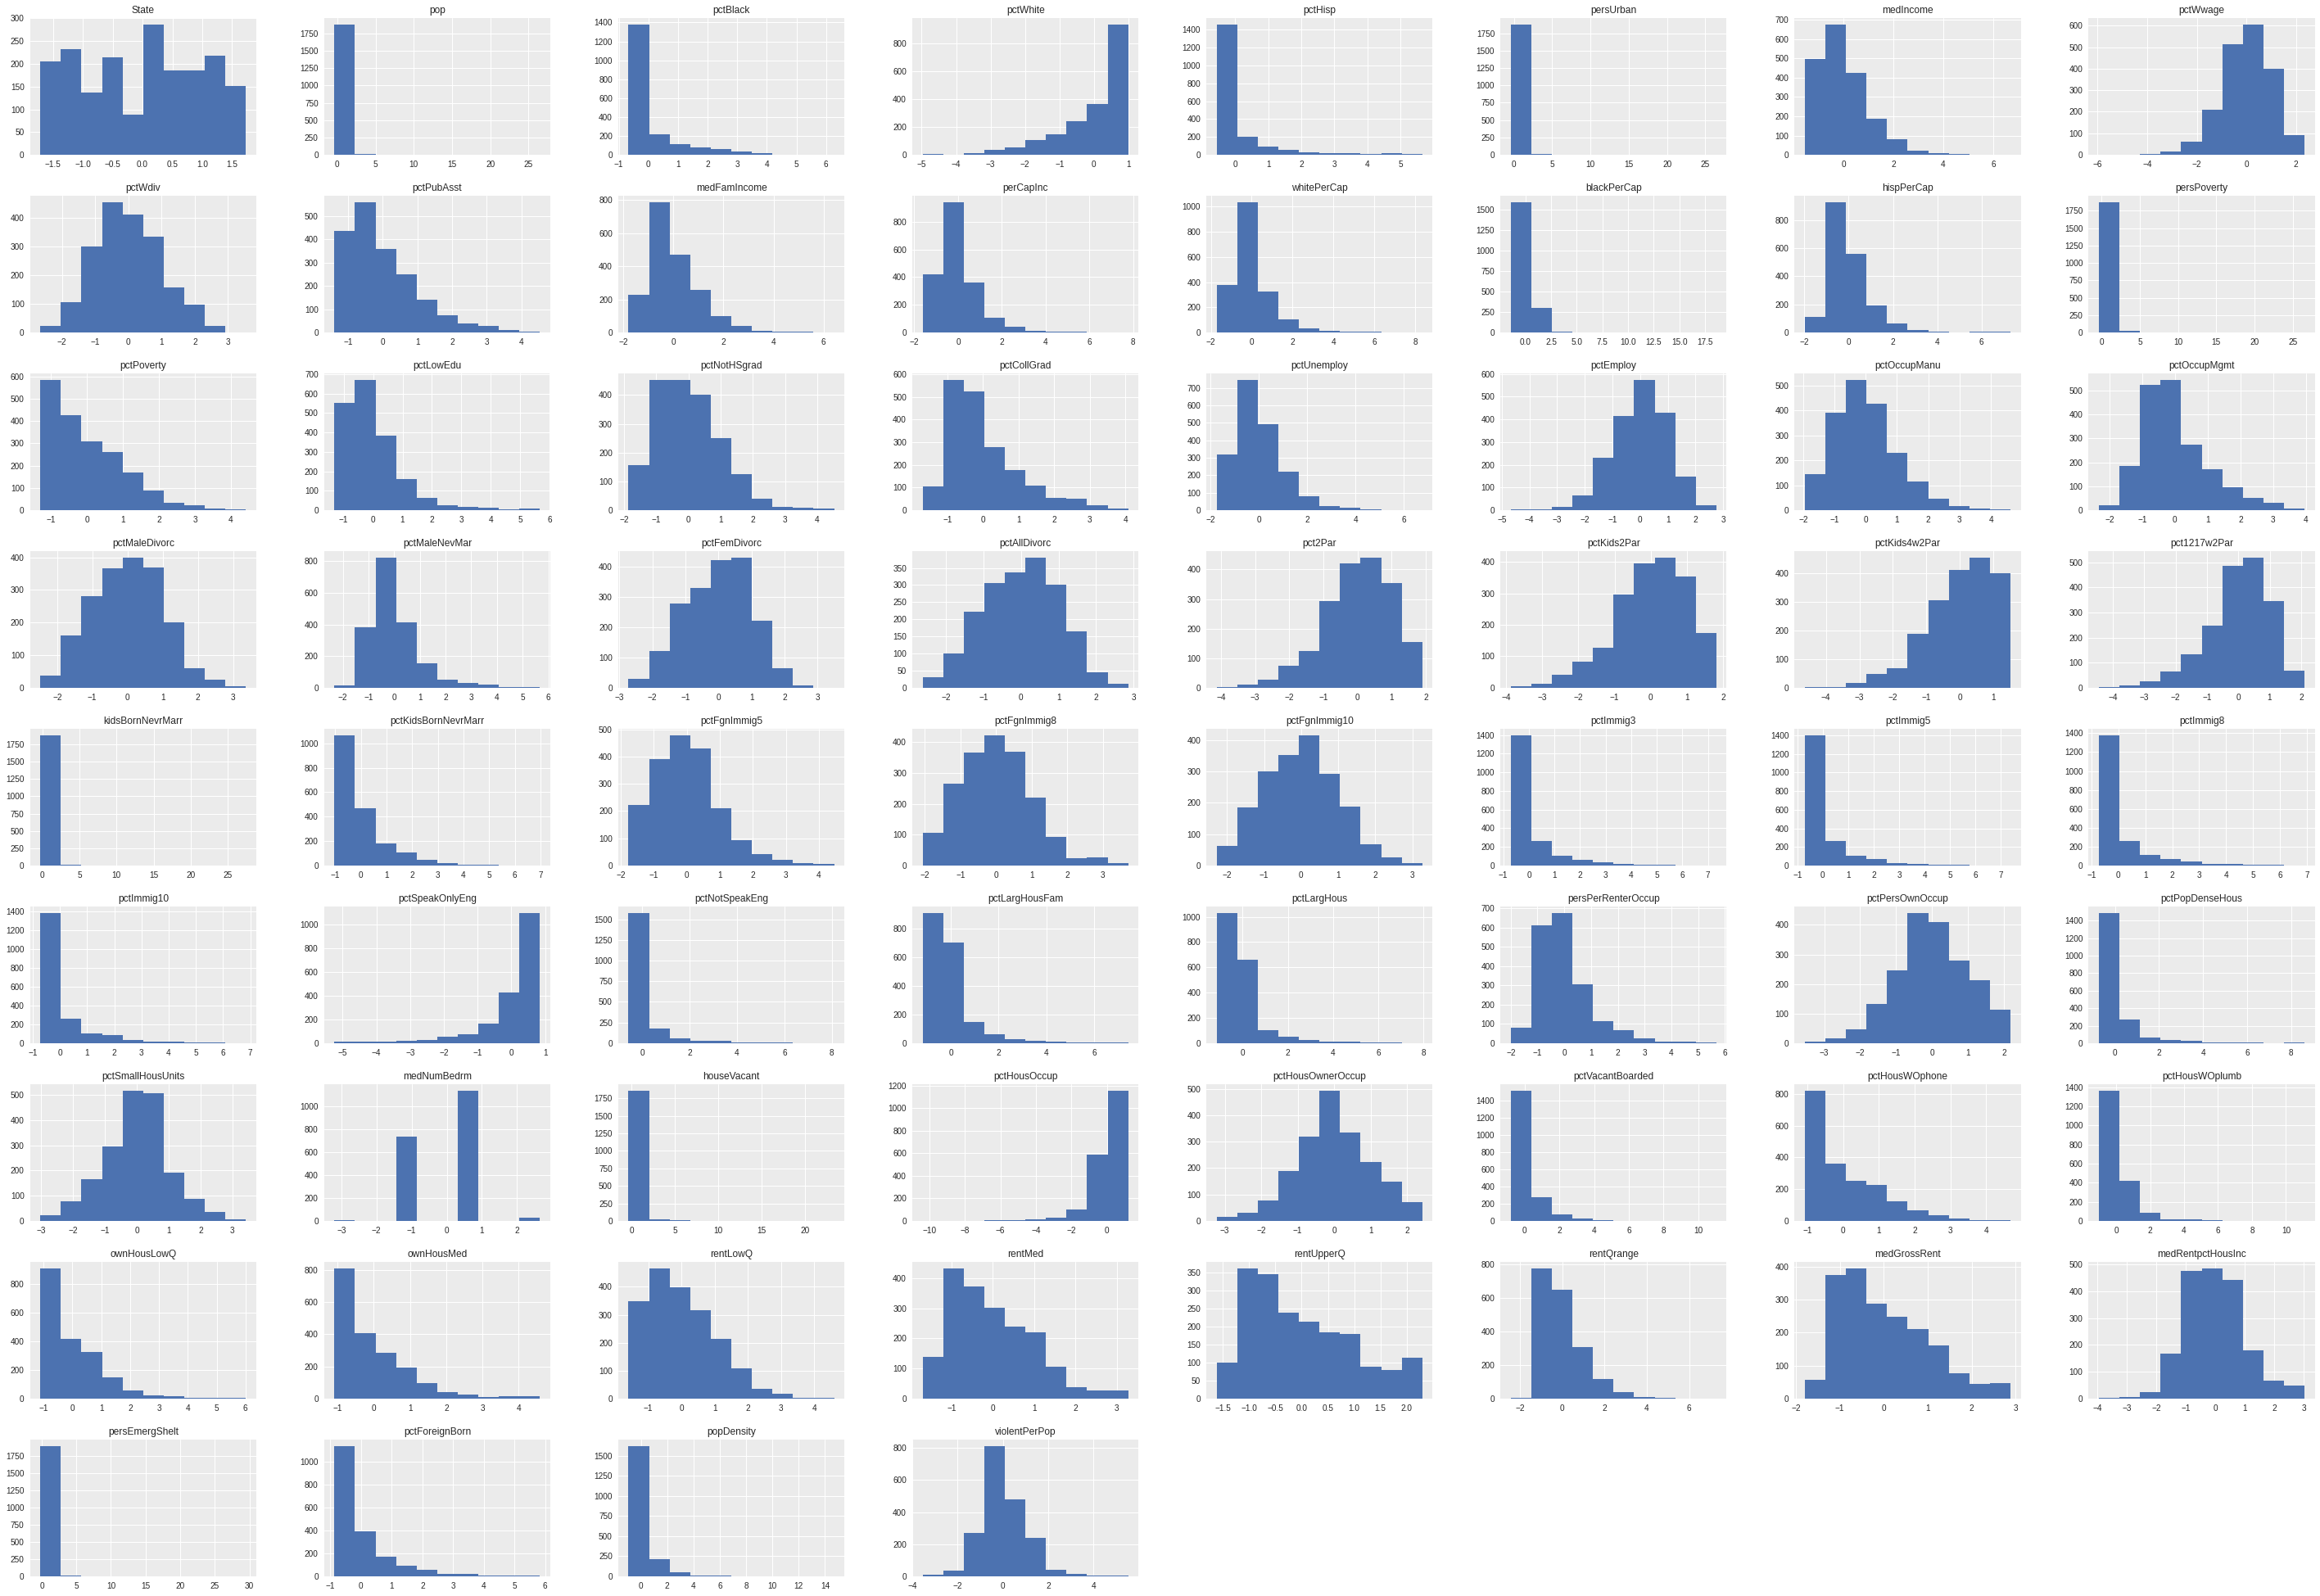

In [ ]:
histo = data_update.hist()
histo;

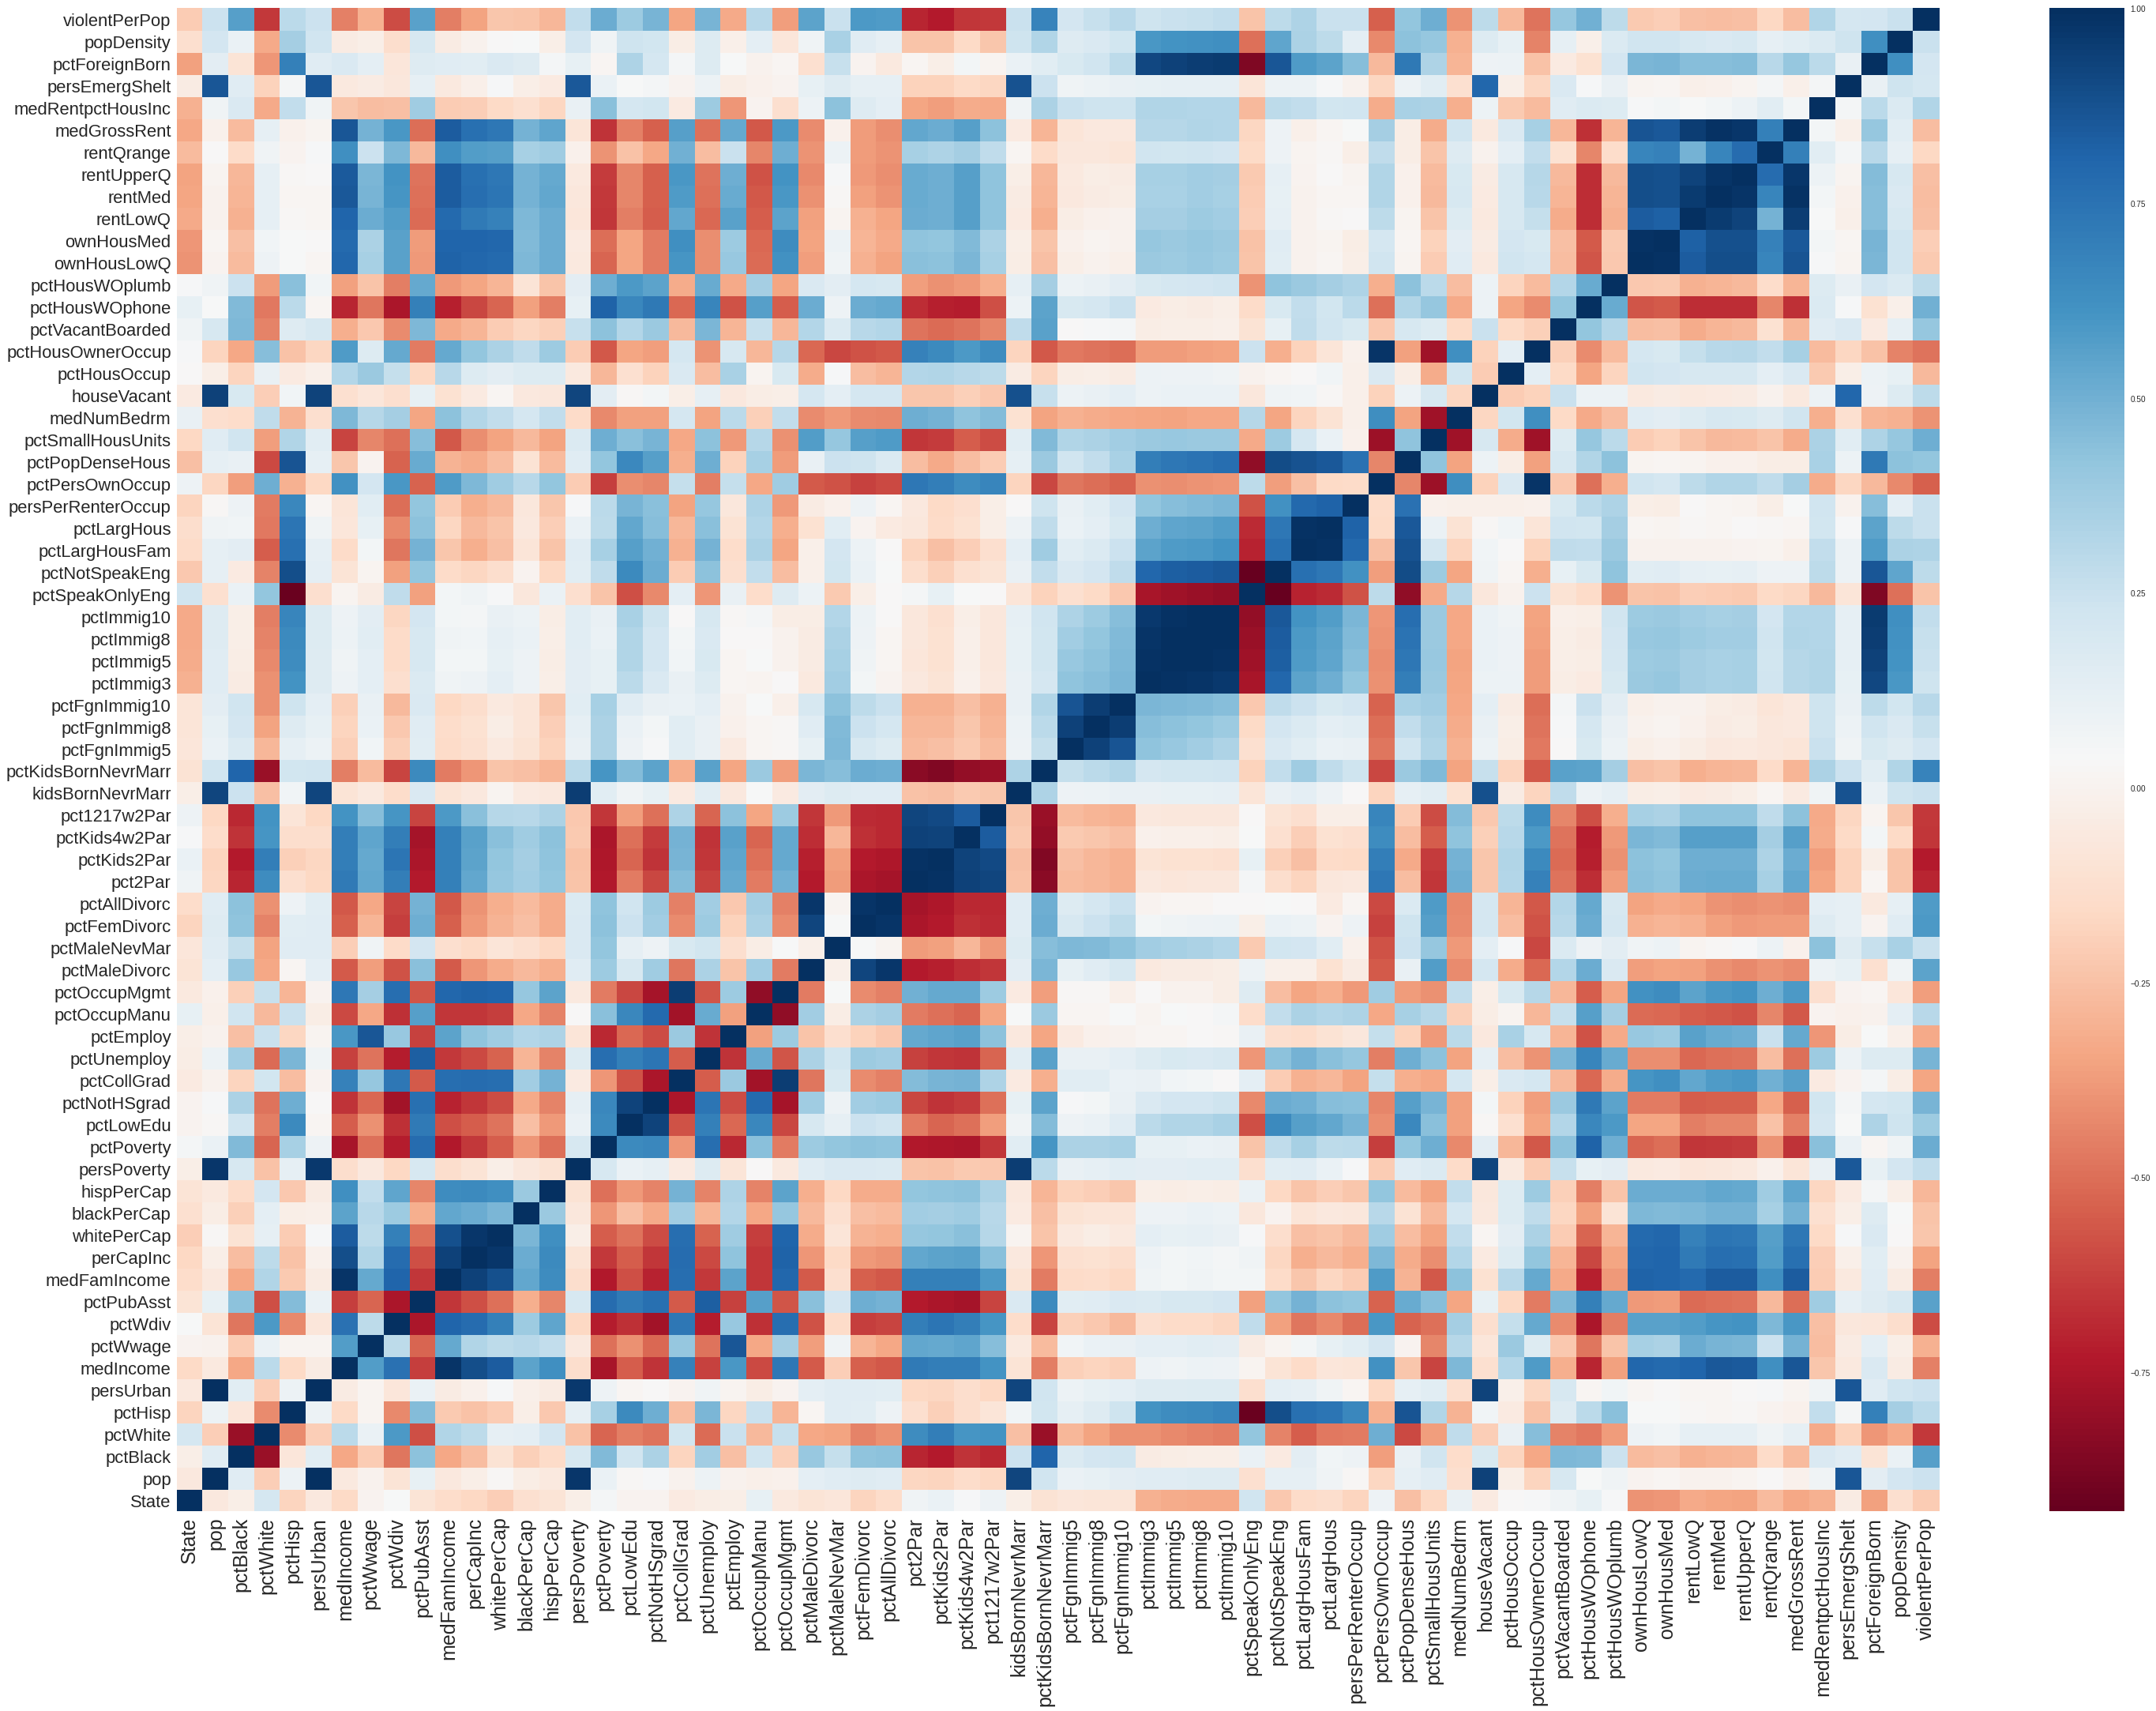

In [ ]:
heatmap(data_update,50,35)

In [ ]:
data_update.corr()[data_update.corr()['violentPerPop'] >= 0]

State       pop  pctBlack  pctWhite   pctHisp  \
pop                 -0.062429  1.000000  0.149061 -0.203688  0.093690   
pctBlack            -0.029920  0.149061  1.000000 -0.796599 -0.078270   
pctHisp             -0.178317  0.093690 -0.078270 -0.422269  1.000000   
persUrban           -0.065545  0.997893  0.146837 -0.202549  0.093242   
pctPubAsst          -0.098127  0.117078  0.434411 -0.589263  0.451484   
persPoverty         -0.027753  0.973322  0.199087 -0.243395  0.120442   
pctPoverty           0.058137  0.101337  0.462219 -0.525191  0.355010   
pctLowEdu            0.000506  0.027850  0.226327 -0.457681  0.646152   
pctNotHSgrad         0.004245  0.045258  0.342453 -0.485146  0.509791   
pctUnemploy         -0.039271  0.088937  0.373272 -0.513450  0.477552   
pctOccupManu         0.113389 -0.020436  0.225792 -0.274423  0.247935   
pctMaleDivorc       -0.098847  0.133225  0.399411 -0.336776  0.019587   
pctMaleNevMar       -0.079809  0.154331  0.265514 -0.350965  0.154635   
pctFemDivorc        -0.177062  0.159487  0.424242 -0.442553  0.148115   
pctAllDivorc        -0.139917  0.148901  0.428707 -0.403631  0.085530   
kidsBornNevrMarr    -0.027209  0.921297  0.239781 -0.254214  0.072748   
pctKidsBornNevrMarr -0.106088  0.228643  0.806796 -0.799047  0.223876   
pctFgnImmig5        -0.078670  0.098647  0.178024 -0.283122  0.125993   
pctFgnImmig8        -0.091472  0.117308  0.216415 -0.350104  0.159796   
pctFgnImmig10       -0.087613  0.135284  0.230633 -0.406260  0.234186   
pctImmig3           -0.308868  0.151251 -0.045006 -0.403695  0.611521   
pctImmig5           -0.320455  0.153043 -0.035912 -0.427613  0.641837   
pctImmig8           -0.331072  0.158457 -0.031671 -0.444498  0.648275   
pctImmig10          -0.328971  0.159756 -0.027171 -0.454860  0.670140   
pctNotSpeakEng      -0.221341  0.122235 -0.052874 -0.442987  0.892792   
pctLargHousFam      -0.150825  0.119243  0.138128 -0.546204  0.764018   
pctLargHous         -0.136338  0.074448  0.067814 -0.472235  0.743606   
persPerRenterOccup  -0.175294  0.022786  0.087939 -0.467777  0.668481   
pctPopDenseHous     -0.253038  0.126139  0.107430 -0.598078  0.866815   
pctSmallHousUnits   -0.166999  0.149598  0.229643 -0.366835  0.325034   
houseVacant         -0.048944  0.934267  0.191335 -0.204005  0.067840   
pctVacantBoarded     0.077344  0.196837  0.470420 -0.440388  0.159619   
pctHousWOphone       0.115905  0.037474  0.464499 -0.470778  0.298865   
pctHousWOplumb       0.050899  0.080823  0.244842 -0.375615  0.438731   
medRentpctHousInc   -0.304511  0.078122  0.185043 -0.332274  0.270336   
persEmergShelt      -0.042165  0.863908  0.152363 -0.184344  0.054607   
pctForeignBorn      -0.358086  0.136709 -0.093983 -0.386220  0.692058   
popDensity          -0.126277  0.212557  0.101046 -0.328047  0.365914   
violentPerPop       -0.205759  0.240745  0.568724 -0.646464  0.292384   

                     persUrban  medIncome  pctWwage   pctWdiv  pctPubAsst  \
pop                   0.997893  -0.061925 -0.001854 -0.097430    0.117078   
pctBlack              0.146837  -0.337928 -0.207970 -0.479414    0.434411   
pctHisp               0.093242  -0.157723  0.008278 -0.430704    0.451484   
persUrban             1.000000  -0.043305  0.009243 -0.082835    0.103232   
pctPubAsst            0.103232  -0.629324 -0.522420 -0.748764    1.000000   
persPoverty           0.969361  -0.132533 -0.062631 -0.161069    0.197800   
pctPoverty            0.082565  -0.759354 -0.497541 -0.718406    0.779871   
pctLowEdu             0.015780  -0.546885 -0.402588 -0.665979    0.716391   
pctNotHSgrad          0.032982  -0.663200 -0.515405 -0.774370    0.766397   
pctUnemploy           0.074438  -0.621161 -0.483998 -0.722578    0.831495   
pctOccupManu         -0.033290  -0.603068 -0.336191 -0.669008    0.569195   
pctMaleDivorc         0.126940  -0.557000 -0.364769 -0.575251    0.440558   
pctMaleNevMar         0.154116  -0.203358  0.080110 -0.150723    0.216592   
pctFemDivorc          0.1

In [ ]:
data_update.corr()[data_update.corr()['violentPerPop'] < 0]

State       pop  pctBlack  pctWhite   pctHisp  \
State              1.000000 -0.062429 -0.029920  0.201837 -0.178317   
pctWhite           0.201837 -0.203688 -0.796599  1.000000 -0.422269   
medIncome         -0.159070 -0.061925 -0.337928  0.292325 -0.157723   
pctWwage           0.001678 -0.001854 -0.207970  0.103550  0.008278   
pctWdiv            0.038741 -0.097430 -0.479414  0.590284 -0.430704   
medFamIncome      -0.143935 -0.064747 -0.337648  0.325825 -0.218037   
perCapInc         -0.166332 -0.030972 -0.260647  0.287621 -0.243491   
whitePerCap       -0.198449  0.027798 -0.100361  0.119959 -0.210716   
blackPerCap       -0.120778 -0.032235 -0.196078  0.132054 -0.024596   
hispPerCap        -0.094816 -0.060265 -0.151553  0.212704 -0.224704   
pctCollGrad       -0.048061 -0.006069 -0.176537  0.217025 -0.263396   
pctEmploy         -0.026258 -0.008147 -0.257209  0.246904 -0.168519   
pctOccupMgmt      -0.058645 -0.010528 -0.194781  0.260906 -0.294016   
pct2Par            0.077279 -0.173630 -0.700626  0.639844 -0.128142   
pctKids2Par        0.102485 -0.179301 -0.731107  0.699880 -0.197015   
pctKids4w2Par      0.044637 -0.141480 -0.658830  0.602345 -0.133136   
pct1217w2Par       0.087591 -0.165816 -0.688961  0.611714 -0.089303   
pctSpeakOnlyEng    0.225693 -0.117337  0.101306  0.412662 -0.914100   
pctPersOwnOccup    0.083579 -0.171445 -0.369267  0.507104 -0.305445   
medNumBedrm        0.107956 -0.124328 -0.141534  0.283717 -0.299838   
pctHousOccup       0.028656 -0.027372 -0.177740  0.110517 -0.051555   
pctHousOwnerOccup  0.044174 -0.175730 -0.336941  0.443015 -0.244365   
ownHousLowQ       -0.394167  0.003966 -0.269180  0.086787  0.037027   
ownHousMed        -0.392114  0.013782 -0.253824  0.072391  0.042174   
rentLowQ          -0.327335 -0.002320 -0.305575  0.120257  0.028177   
rentMed           -0.346684 -0.002324 -0.291678  0.123206  0.016208   
rentUpperQ        -0.349505  0.011999 -0.283487  0.119940  0.022615   
rentQrange        -0.266750  0.031835 -0.148929  0.078024  0.005691   
medGrossRent      -0.336566 -0.013269 -0.268672  0.124726 -0.009763   

                   persUrban  medIncome  pctWwage   pctWdiv  pctPubAsst  ...  \
State              -0.065545  -0.159070  0.001678  0.038741   -0.098127  ...   
pctWhite           -0.202549   0.292325  0.103550  0.590284   -0.589263  ...   
medIncome          -0.043305   1.000000  0.575738  0.753063   -0.629324  ...   
pctWwage            0.009243   0.575738  1.000000  0.286859   -0.522420  ...   
pctWdiv            -0.082835   0.753063  0.286859  1.000000   -0.748764  ...   
medFamIncome       -0.046733   0.979450  0.526136  0.804737   -0.656684  ...   
perCapInc          -0.013877   0.888220  0.327165  0.776749   -0.587698  ...   
whitePerCap         0.044346   0.840188  0.291081  0.695380   -0.497676  ...   
blackPerCap        -0.020114   0.550188  0.300200  0.388002   -0.317993  ...   
hispPerCap         -0.046170   0.630910  0.273378  0.541497   -0.432402  ...   
pctCollGrad         0.004282   0.685198  0.412417  0.734998   -0.559009  ...   
pctEmploy           0.006100   0.598503  0.860993  0.398403   -0.620489  ...   
pctOccupMgmt        0.001164   0.731207  0.366687  0.770783   -0.569310  ...   
pct2Par            -0.165559   0.716077  0.538253  0.700671   -0.726751  ...   
pctKids2Par        -0.171254   0.702799  0.525736  0.742004   -0.750653  ...   
pctKids4w2Par      -0.130040   0.699123  0.543862  0.705635   -0.764747  ...   
pct1217w2Par       -0.160934   0.611501  0.443184  0.605960   -0.618454  ...   
pctSpeakOnlyEng    -0.122781   0.009792 -0.044313  0.278829   -0.359992  ...   
pctPersOwnOccup    -0.163088   0.619696  0.215303  0.600712   -0.532725  ...   
medNumBedrm        -0.123289   0.471935  0.311509  0.364958   -0.347262  ...   
pctHousOccup       -0.018188   0.315531  0.396701  0.266038   -0.167404  ...   
pctHousOwnerOccup  -0.169024   0.585223  0.167898  0.527868   -0.464042  ...   
ownHousLowQ         0.020589   0.797882  0.358795  

Our updated data resulted in 68 variables and 1,902 observations. 39 variables including our y variable (violentPerPop) are positively correlated with violentPerPop, whereas, we have 29 corresponding negatively correlating variables.

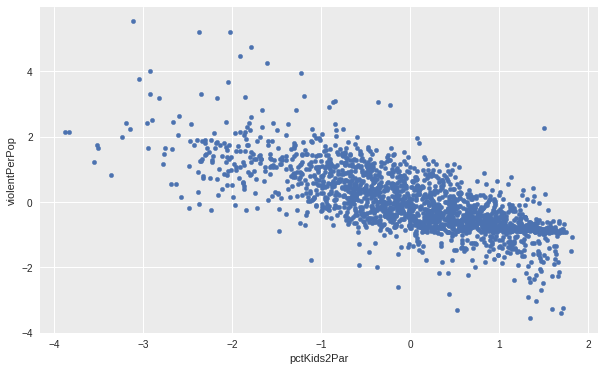

In [ ]:
data_update.plot.scatter(x = 'pctKids2Par', y = 'violentPerPop', figsize=(10,6));

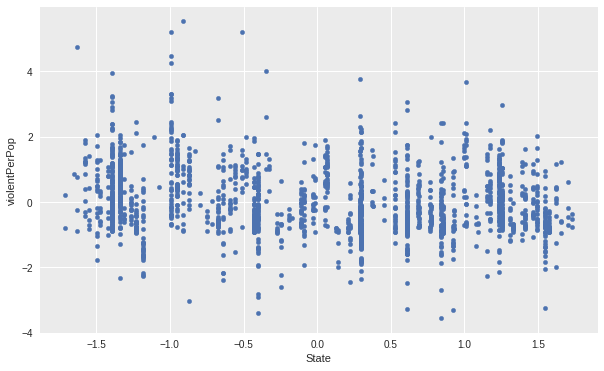

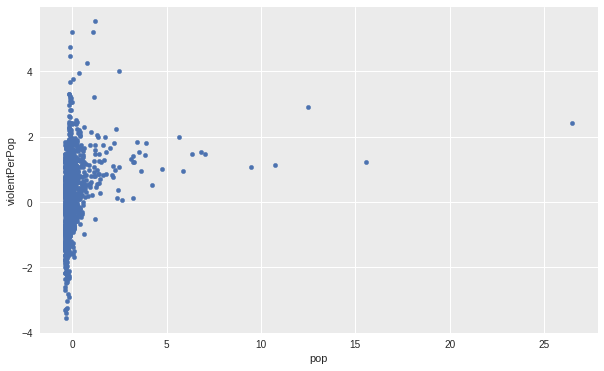

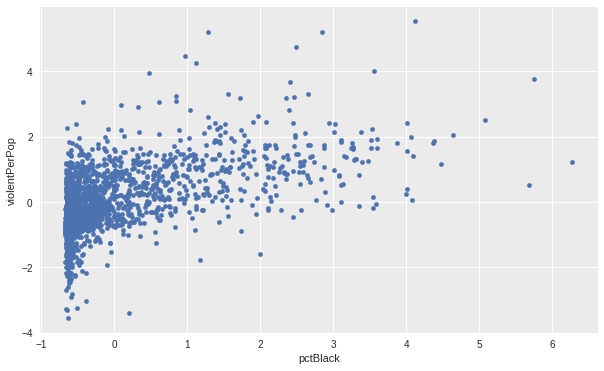

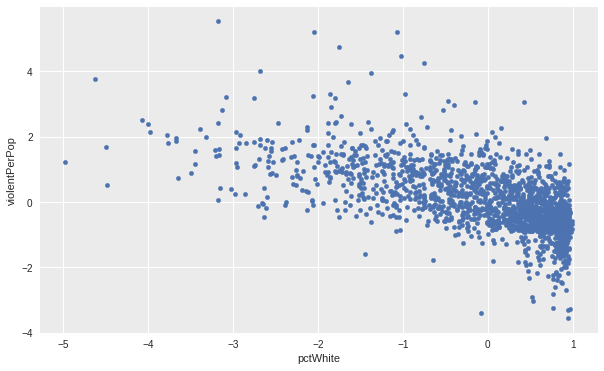

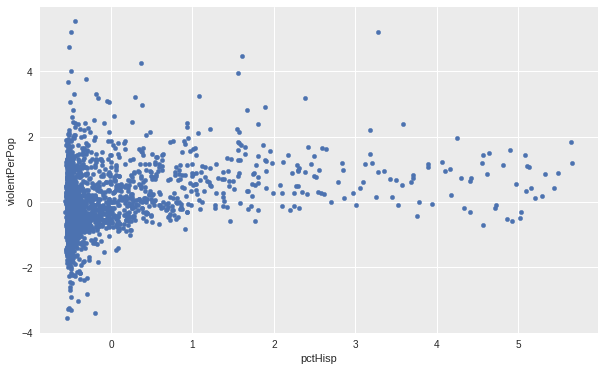

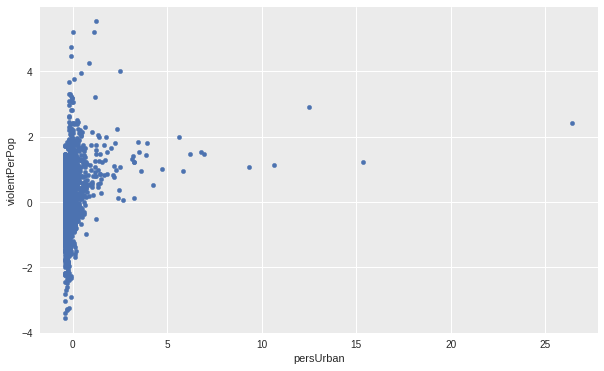

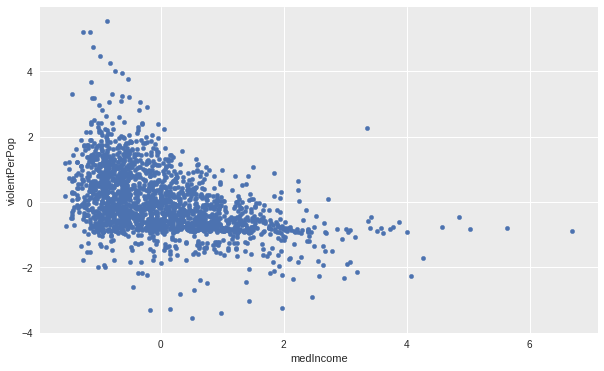

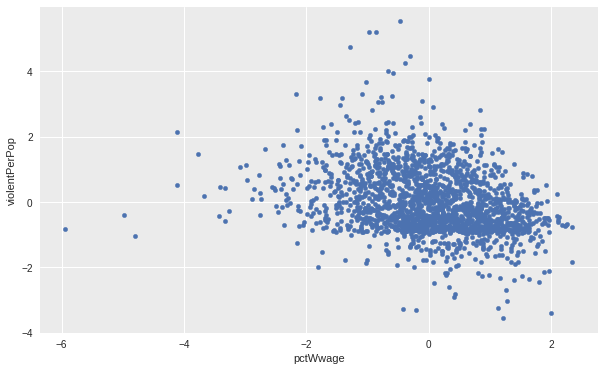

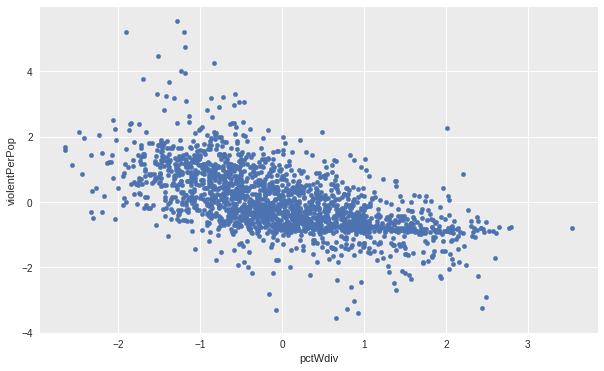

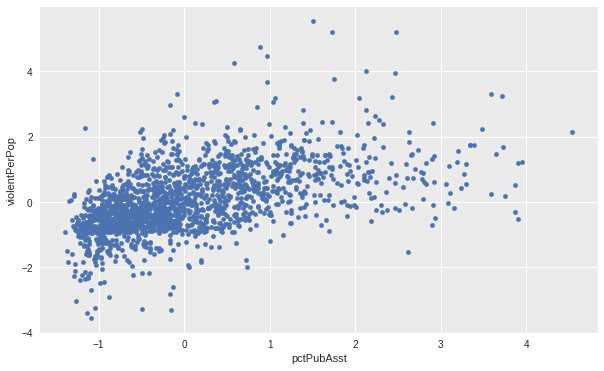

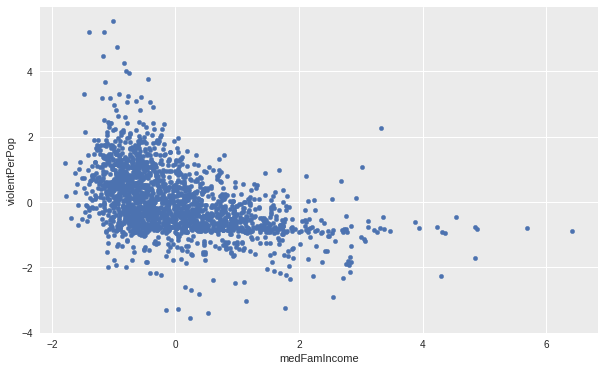

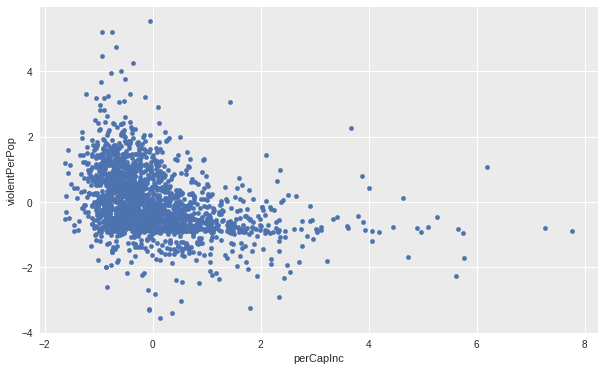

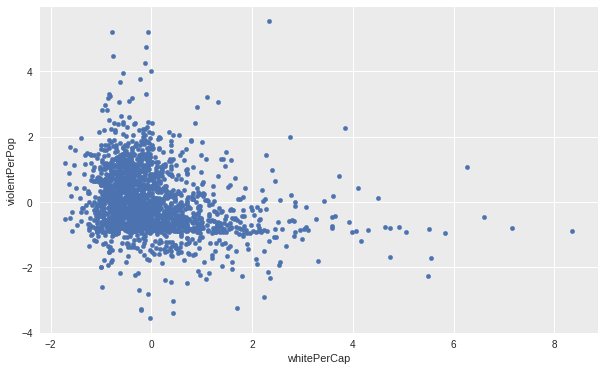

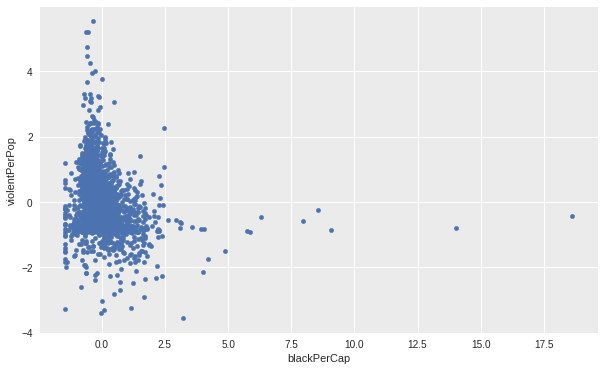

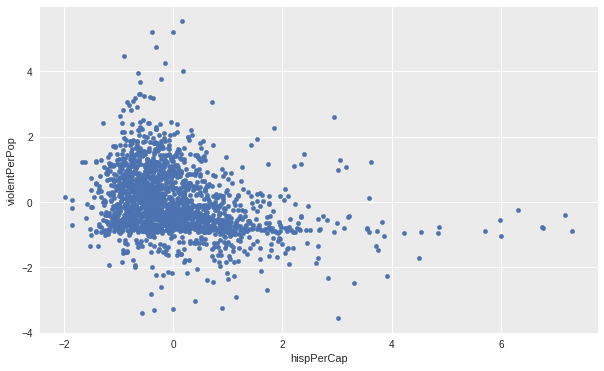

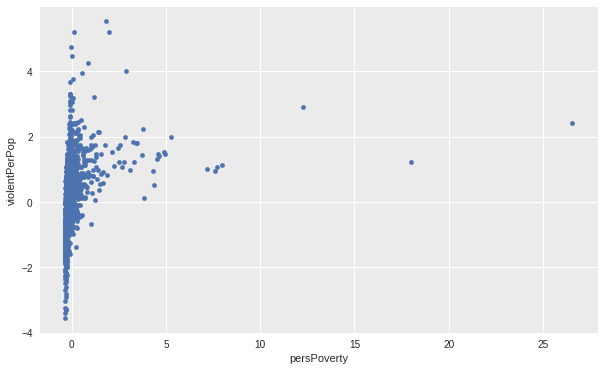

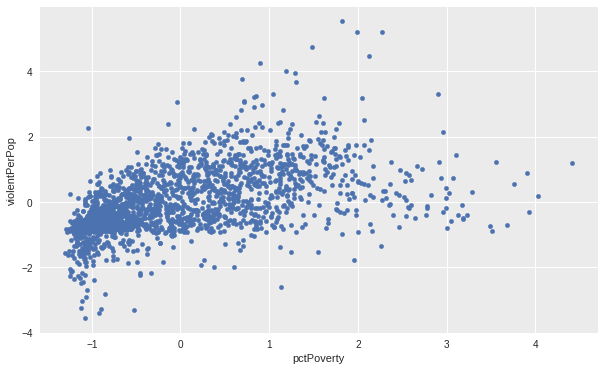

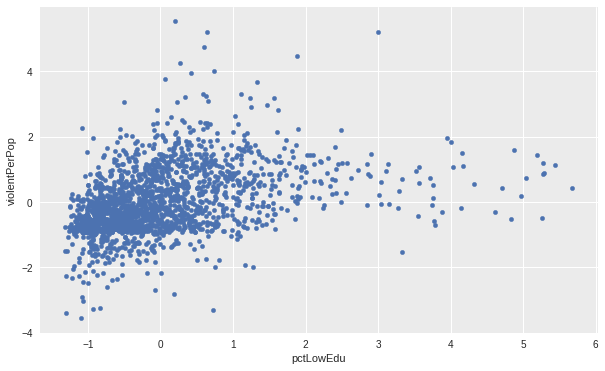

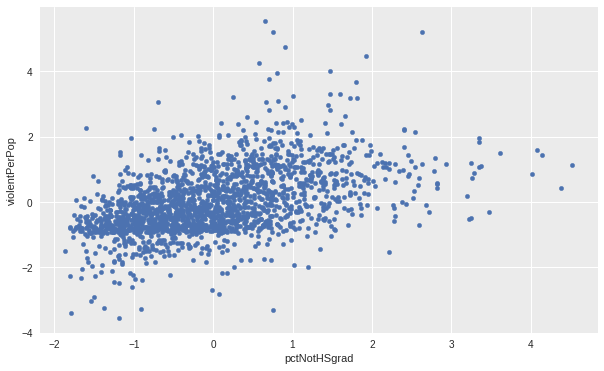

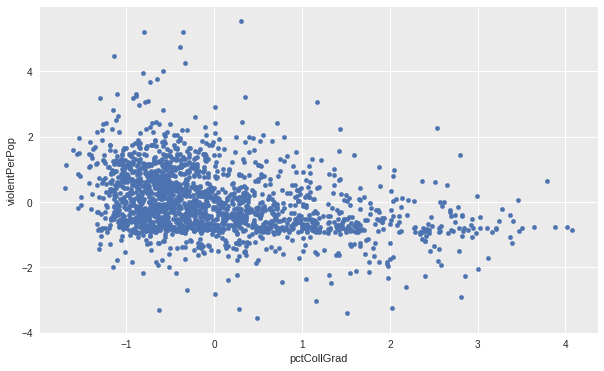

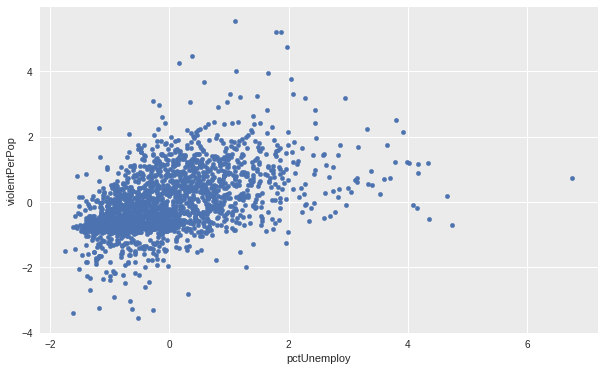

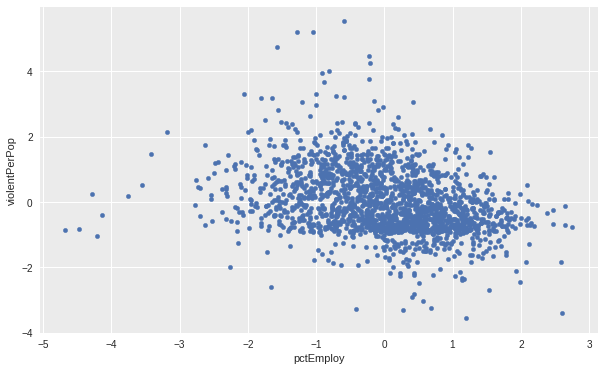

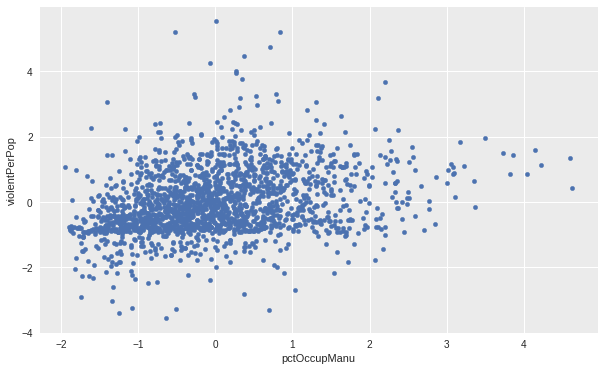

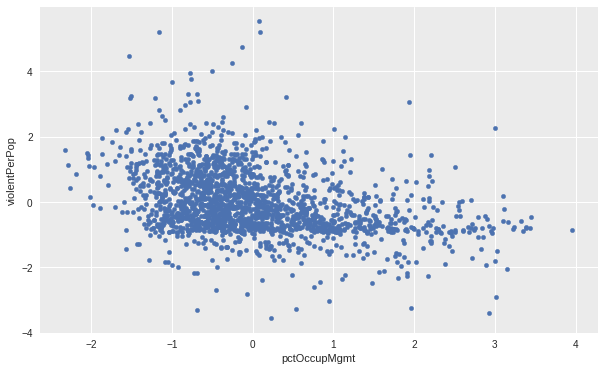

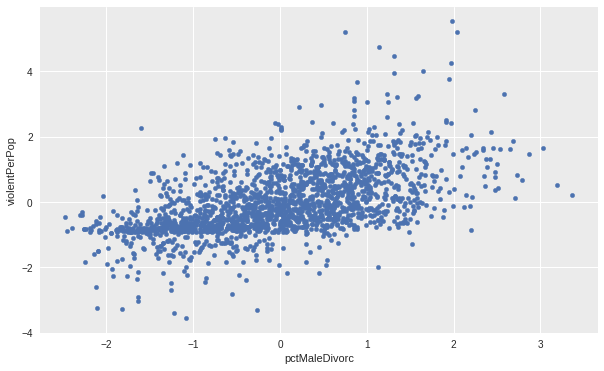

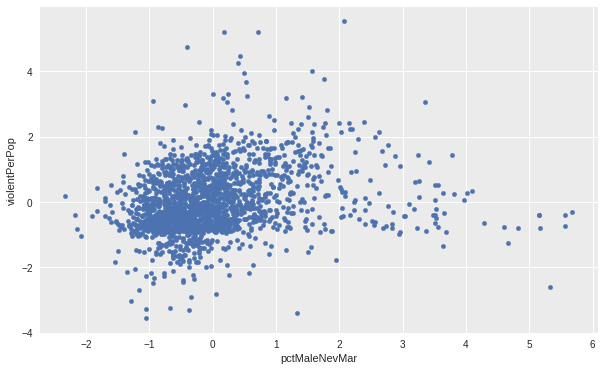

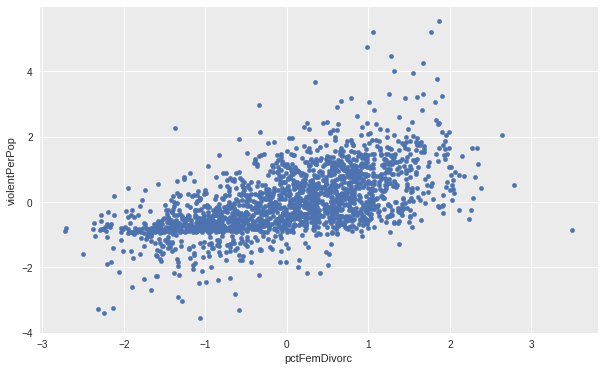

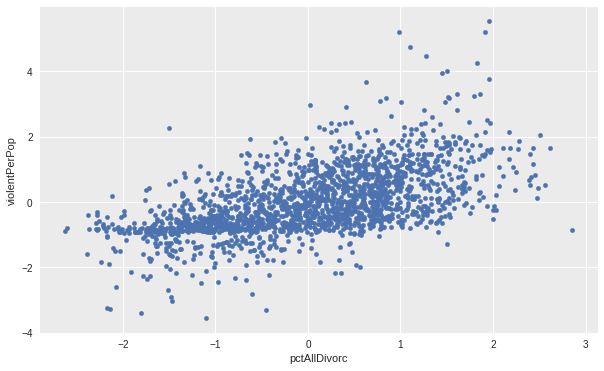

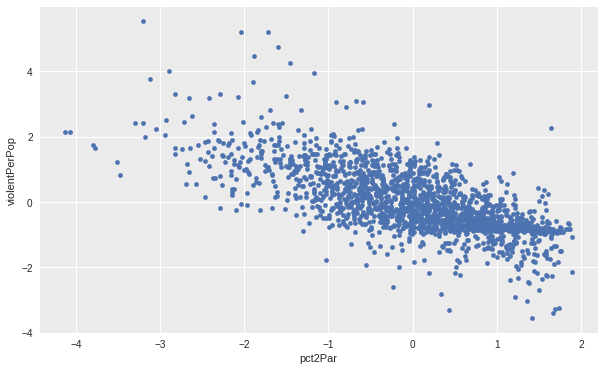

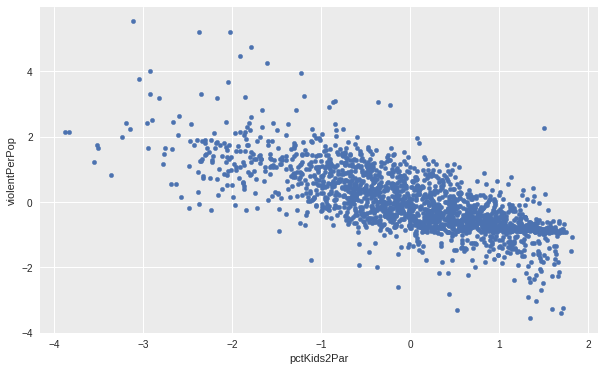

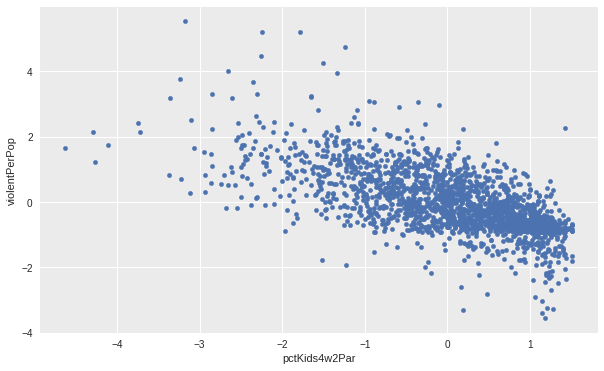

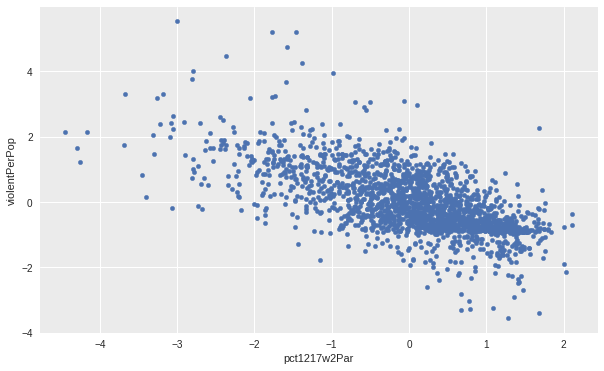

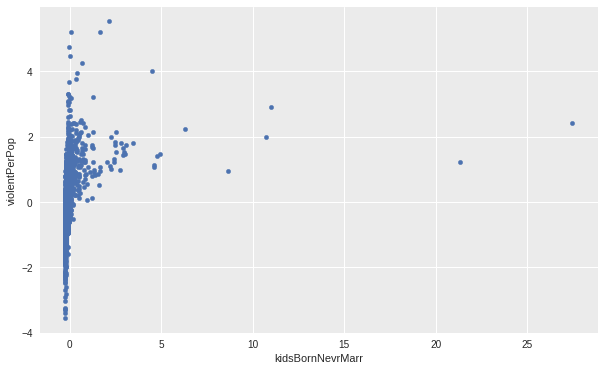

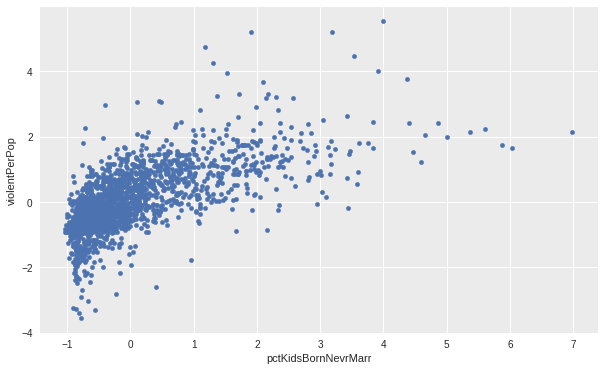

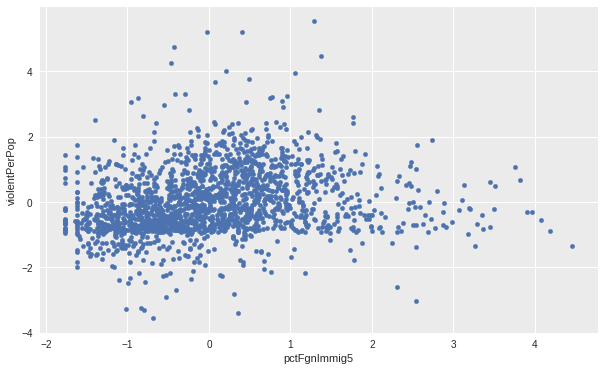

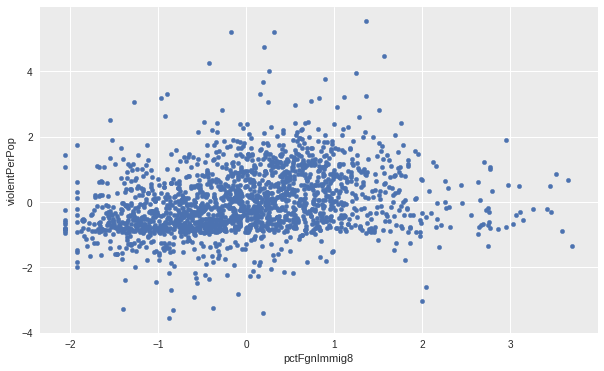

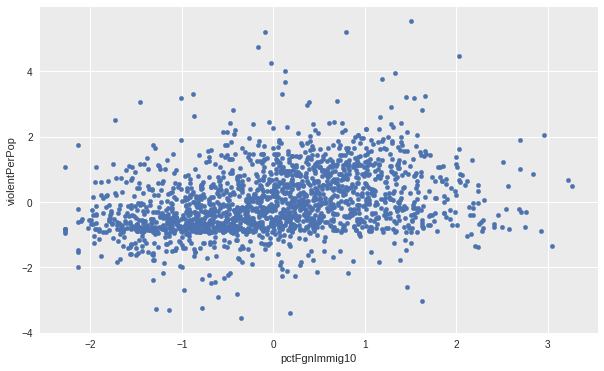

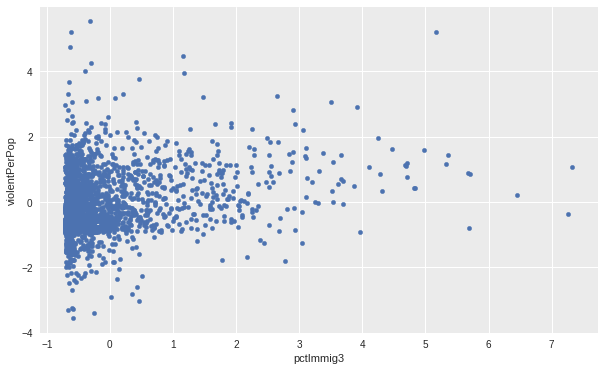

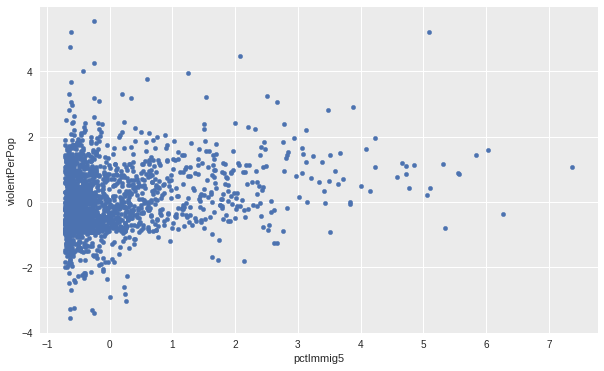

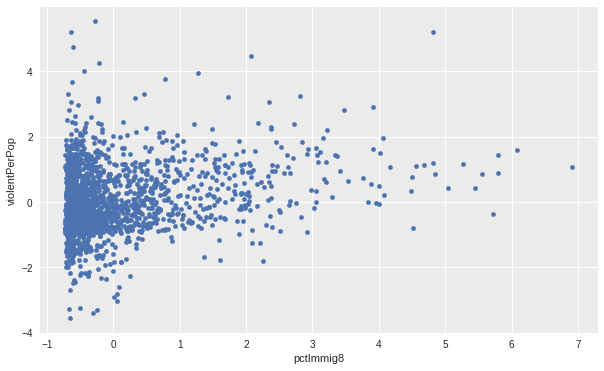

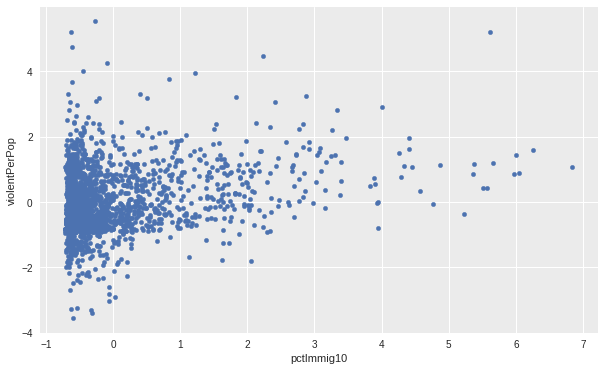

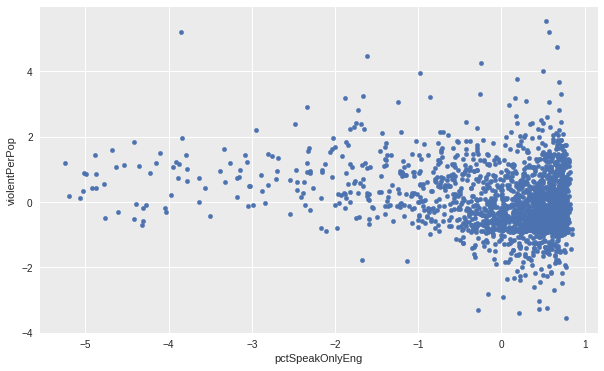

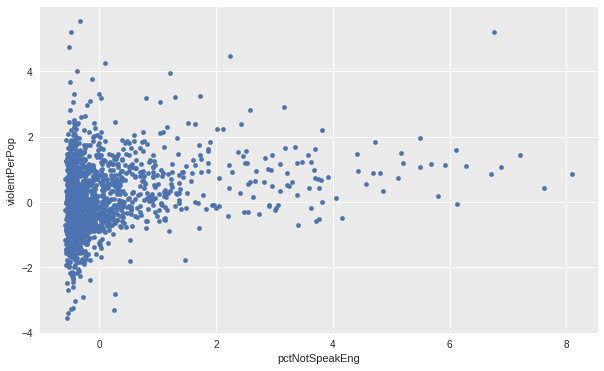

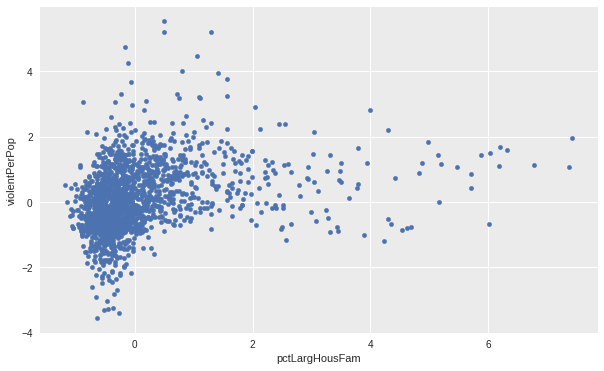

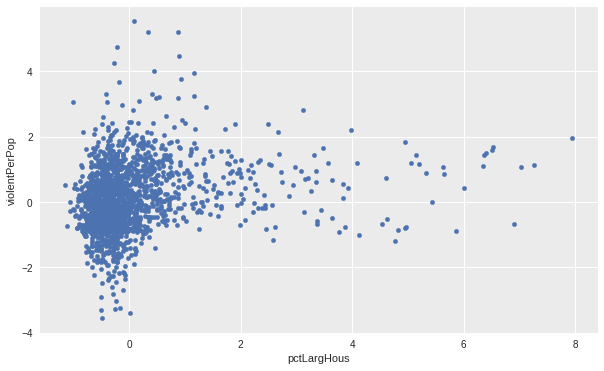

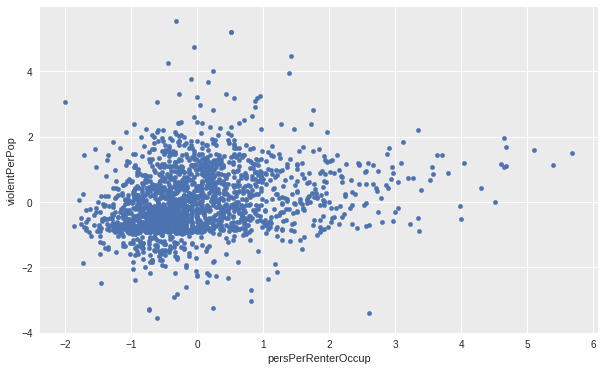

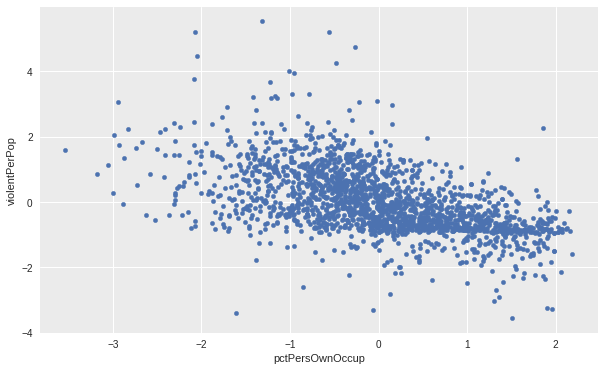

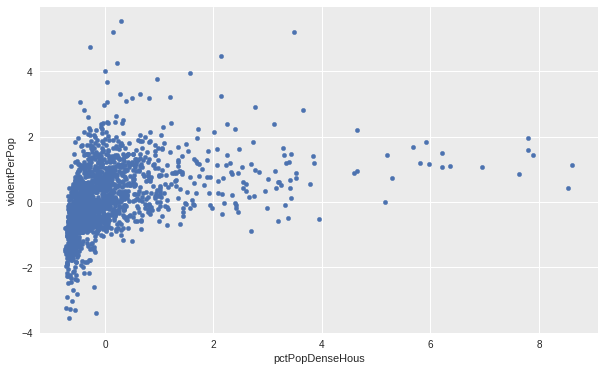

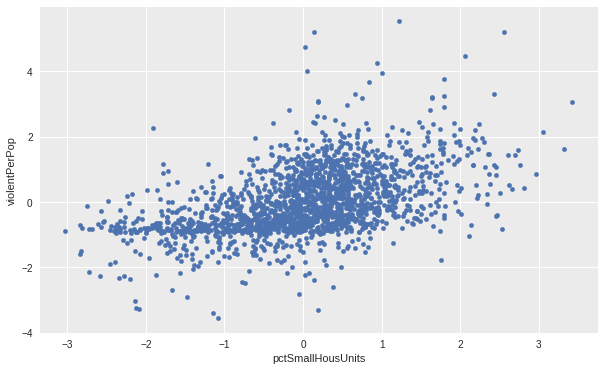

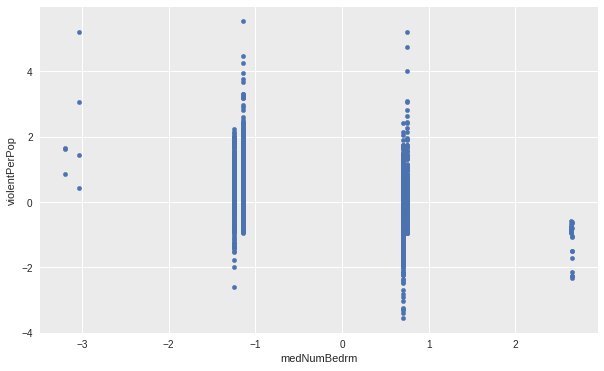

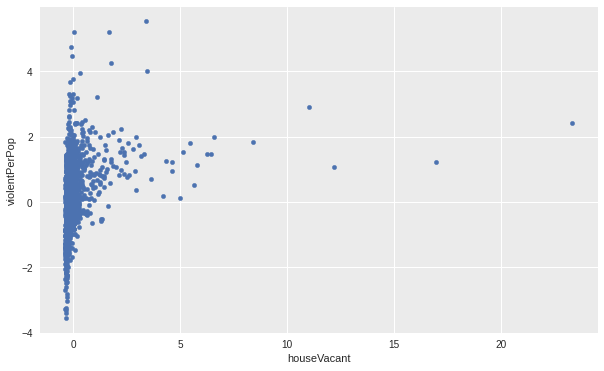

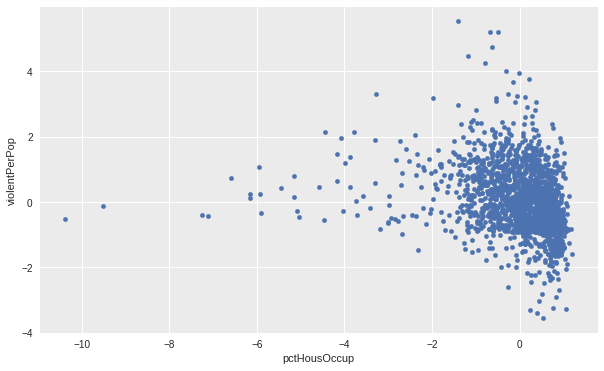

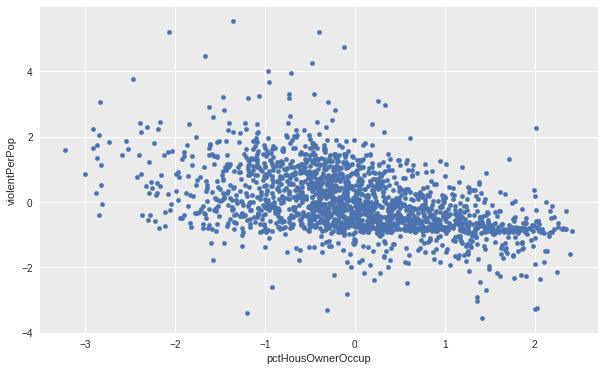

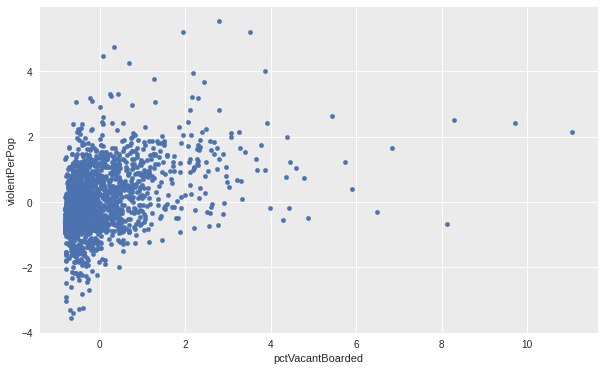

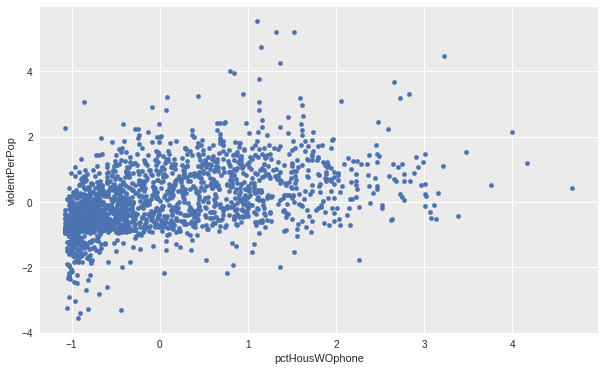

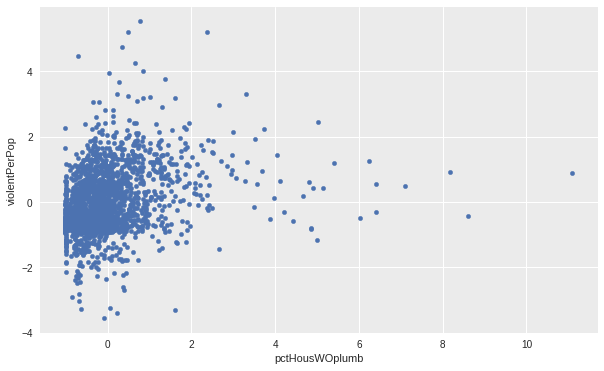

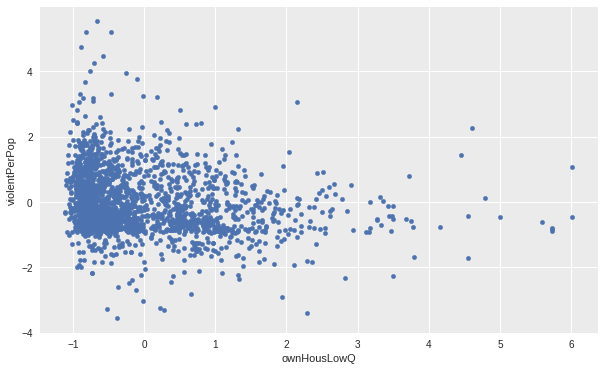

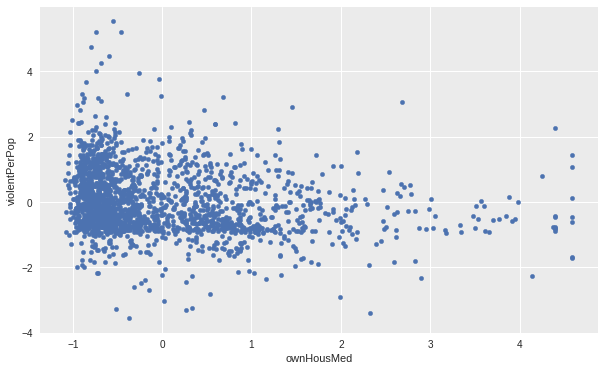

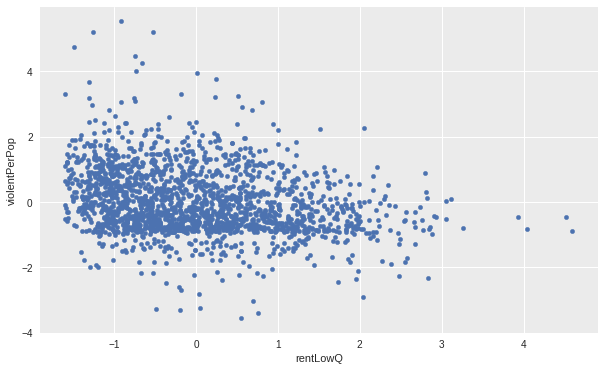

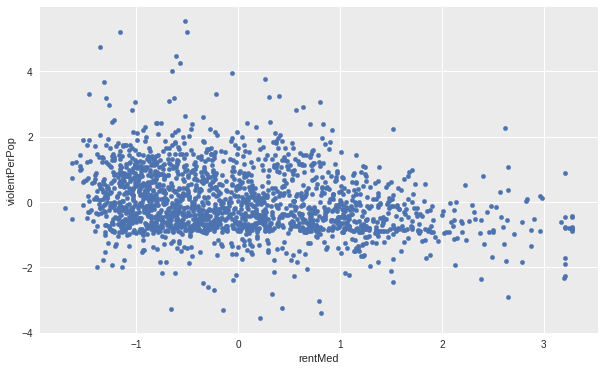

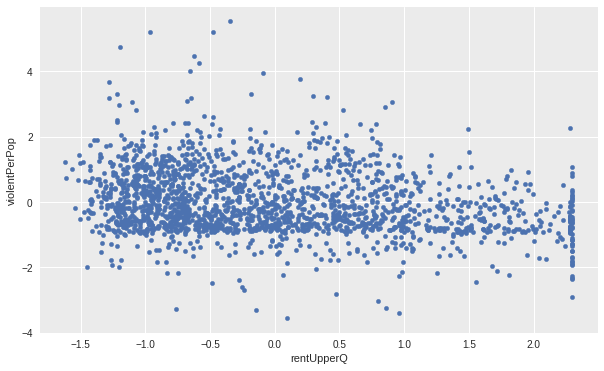

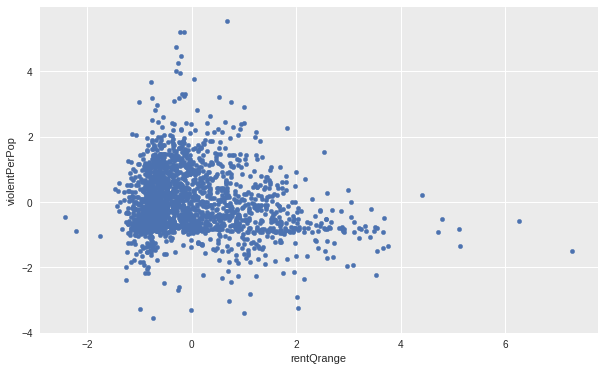

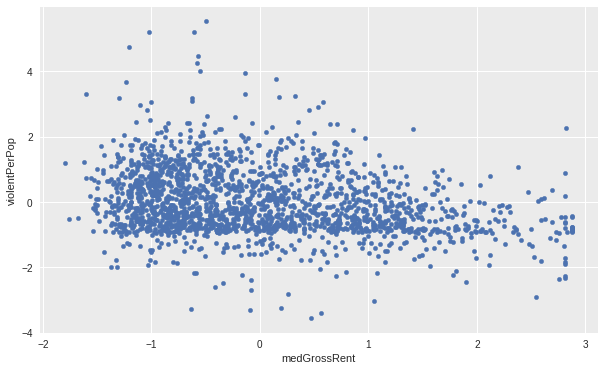

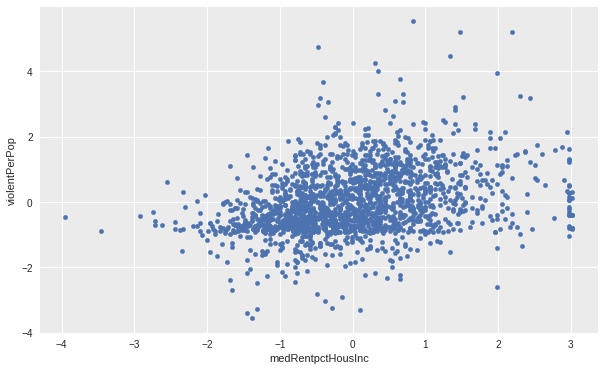

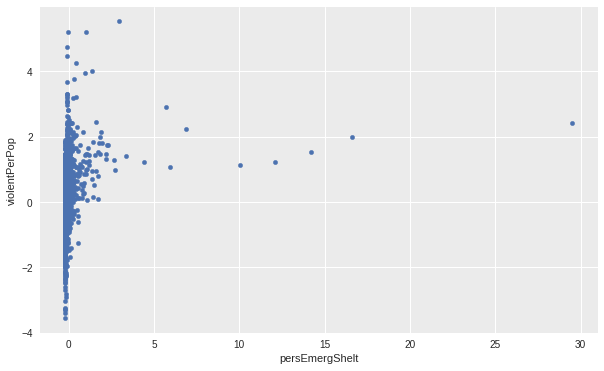

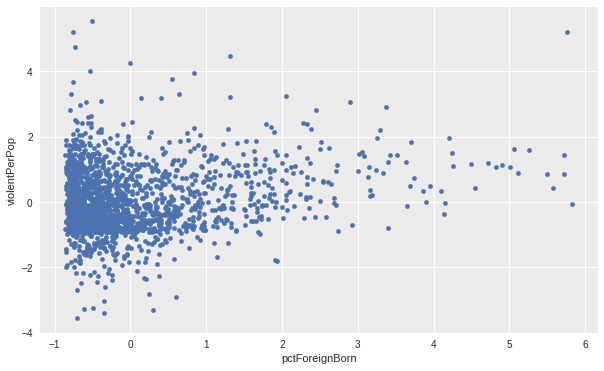

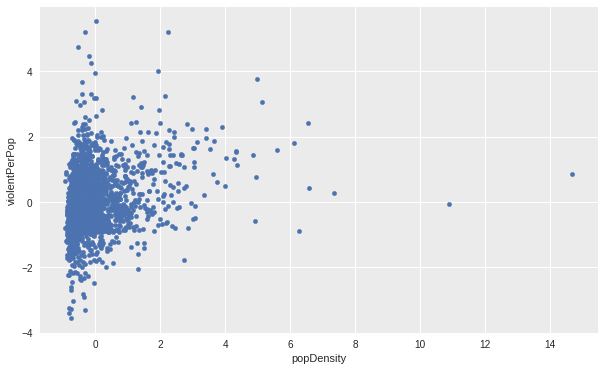

In [ ]:
for col in data_update.columns[:-1]:
    data_update.plot.scatter(x = col, y = 'violentPerPop', figsize=(10,6))
    # plt.ylim(-4, 4)
    # plt.savefig(f'{col}.jpeg')
    plt.show()

In [ ]:

from pandas.plotting import scatter_matrix



In [ ]:
# scatter_matrix(data_update, alpha=0.5, figsize=(100, 85), diagonal='kde')
# plt.xticks(rotation=90,fontsize=15)
# plt.yticks(fontsize=10);

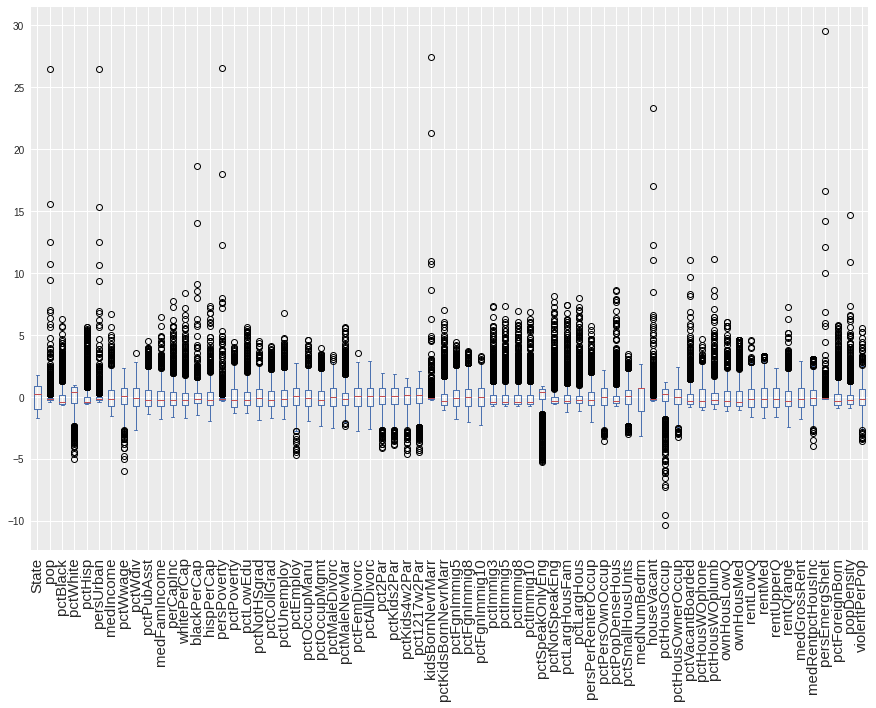

In [ ]:
data_update.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=10);

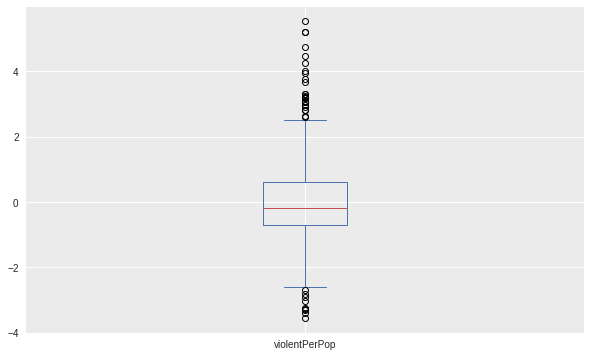

In [ ]:
y.plot(kind='box',figsize=(10,6));

From the two plots above, majority (approximately $89.705\%$) of our dataset have outliers.

Let's calculate the Pearson Correlation Coefficient and $\rho$-value  to ascertain that the correlation between our $X$ variables and $y$ variable `'violentPerPop'` are statistically significant.

In [ ]:
pearson_coefs = []
p_values = []

for i in tqdm(data_update.columns[:-1]):
  pc, pv = stats.pearsonr(data_update[i], data_update['violentPerPop'])
  pearson_coefs.append(pc)
  p_values.append(pv)

len(p_values), len(pearson_coefs)

  0%|          | 0/67 [00:00<?, ?it/s]

(67, 67)

In [ ]:
dict_ = { 'Xvariable' : data_update.columns[:-1] , 'pearson_coefs' : pearson_coefs, 'p_values' : p_values }

violentPerPop_stats = pd.DataFrame(dict_)
violentPerPop_stats.sort_values(by = 'pearson_coefs')

Xvariable  pearson_coefs       p_values
29          pctKids2Par      -0.728098  6.054853e-314
28              pct2Par      -0.697607  2.029259e-277
30        pctKids4w2Par      -0.653645  3.256556e-232
3              pctWhite      -0.646464  1.540924e-225
31         pct1217w2Par      -0.643296  1.193340e-222
..                  ...            ...            ...
9            pctPubAsst       0.558823  1.132850e-156
2              pctBlack       0.568724  1.967953e-163
27         pctAllDivorc       0.584341  1.419696e-174
26         pctFemDivorc       0.587694  4.787189e-177
33  pctKidsBornNevrMarr       0.678980  2.686173e-257

[67 rows x 3 columns]

In [ ]:
violentPerPop_stats[violentPerPop_stats['p_values'] > 0.1]

Empty DataFrame
Columns: [Xvariable, pearson_coefs, p_values]
Index: []

In [ ]:
violentPerPop_stats[violentPerPop_stats['p_values'] < 0.1].head(67//2)

Xvariable  pearson_coefs       p_values
0              State      -0.205759   1.248213e-19
1                pop       0.240745   1.753895e-26
2           pctBlack       0.568724  1.967953e-163
3           pctWhite      -0.646464  1.540924e-225
4            pctHisp       0.292384   8.390434e-39
5          persUrban       0.239401   3.379255e-26
6          medIncome      -0.446302   9.270710e-94
7           pctWwage      -0.308136   4.089104e-43
8            pctWdiv      -0.592697  8.661760e-181
9         pctPubAsst       0.558823  1.132850e-156
10      medFamIncome      -0.455198   6.398557e-98
11         perCapInc      -0.353422   4.614488e-57
12       whitePerCap      -0.231838   1.257563e-24
13       blackPerCap      -0.240906   1.620556e-26
14        hispPerCap      -0.281368   6.054636e-36
15       persPoverty       0.272160   1.184629e-33
16        pctPoverty       0.516338  4.169689e-130
17         pctLowEdu       0.386396   9.137228e-69
18      pctNotHSgrad       0.482203  2.467025e-111
19       pctCollGrad      -0.341718   3.137246e-53
20       pctUnemploy       0.482233  2.382586e-111
21         pctEmploy      -0.329339   2.370802e-49
22      pctOccupManu       0.299529   1.002333e-40
23      pctOccupMgmt      -0.364656   6.753818e-61
24     pctMaleDivorc       0.554722  6.131089e-154
25     pctMaleNevMar       0.250257   1.503051e-28
26      pctFemDivorc       0.587694  4.787189e-177
27      pctAllDivorc       0.584341  1.419696e-174
28           pct2Par      -0.697607  2.029259e-277
29       pctKids2Par      -0.728098  6.054853e-314
30     pctKids4w2Par      -0.653645  3.256556e-232
31      pct1217w2Par      -0.643296  1.193340e-222
32  kidsBornNevrMarr       0.253774   2.454752e-29

In [ ]:
violentPerPop_stats[violentPerPop_stats['p_values'] < 0.1].tail(67//2 + 1)

Xvariable  pearson_coefs       p_values
33  pctKidsBornNevrMarr       0.678980  2.686173e-257
34         pctFgnImmig5       0.213967   3.916223e-21
35         pctFgnImmig8       0.256596   5.617149e-30
36        pctFgnImmig10       0.301681   2.577870e-41
37            pctImmig3       0.233633   5.392200e-25
38            pctImmig5       0.252721   4.234215e-29
39            pctImmig8       0.258877   1.683863e-30
40           pctImmig10       0.270383   3.204290e-33
41      pctSpeakOnlyEng      -0.241826   1.031510e-26
42       pctNotSpeakEng       0.291067   1.871696e-38
43       pctLargHousFam       0.332768   2.081917e-50
44          pctLargHous       0.250331   1.446735e-28
45   persPerRenterOccup       0.252628   4.442696e-29
46      pctPersOwnOccup      -0.542614  4.372276e-146
47      pctPopDenseHous       0.412588   4.533721e-79
48    pctSmallHousUnits       0.506438  1.931090e-124
49          medNumBedrm      -0.396117   1.754696e-72
50          houseVacant       0.285936   4.095188e-37
51         pctHousOccup      -0.275506   1.782613e-34
52    pctHousOwnerOccup      -0.486171  2.080659e-113
53     pctVacantBoarded       0.409721   6.761443e-78
54       pctHousWOphone       0.495629  1.827243e-118
55       pctHousWOplumb       0.291198   1.728469e-38
56          ownHousLowQ      -0.218557   5.302265e-22
57           ownHousMed      -0.204415   2.170492e-19
58             rentLowQ      -0.257205   4.077065e-30
59              rentMed      -0.259219   1.403453e-30
60           rentUpperQ      -0.254637   1.566634e-29
61           rentQrange      -0.164696   4.922814e-13
62         medGrossRent      -0.263121   1.731266e-31
63    medRentpctHousInc       0.327587   8.119016e-49
64       persEmergShelt       0.202345   5.048197e-19
65       pctForeignBorn       0.210253   1.909768e-20
66           popDensity       0.250134   1.600521e-28

In [ ]:
pearson_coefs2 = []
p_values2 = []

for i in tqdm(data.columns[:-1]):
  pc, pv = stats.pearsonr(data[i], data['violentPerPop'])
  pearson_coefs2.append(pc)
  p_values2.append(pv)

len(p_values2), len(pearson_coefs2)

  0%|          | 0/102 [00:00<?, ?it/s]

(102, 102)

In [ ]:
dict_2 = { 'Xvariables2' : data.columns[:-1] , 'pearson_coefs2' : pearson_coefs2, 'p_values2' : p_values2 }

violentPerPop_stats2 = pd.DataFrame(dict_2)
violentPerPop_stats2

Xvariables2  pearson_coefs2      p_values2
0             State       -0.205759   1.248213e-19
1               pop        0.240745   1.753895e-26
2          perHoush       -0.057026   1.286734e-02
3          pctBlack        0.568724  1.967953e-163
4          pctWhite       -0.646464  1.540924e-225
..              ...             ...            ...
97   pctSameCounty5        0.052826   2.122530e-02
98    pctSameState5       -0.007698   7.372559e-01
99         landArea        0.087803   1.260027e-04
100      popDensity        0.250134   1.600521e-28
101  pctUsePubTrans        0.124140   5.590119e-08

[102 rows x 3 columns]

In [ ]:
less_pval = violentPerPop_stats2[violentPerPop_stats2['p_values2'] > 0.05]
less_pval

Xvariables2  pearson_coefs2  p_values2
7           pct1221        0.020132   0.380218
48      pctWorkMom6        0.005672   0.804744
76     pctVacant6up       -0.014598   0.524606
91  medOwnCostPctWO        0.020840   0.363679
98    pctSameState5       -0.007698   0.737256

In [ ]:
less_coeffs = violentPerPop_stats2[violentPerPop_stats2['pearson_coefs2'] < 0.1999999 ].sort_values(by = 'pearson_coefs2', ascending = False).head(36)
less_coeffs

Xvariables2  pearson_coefs2     p_values2
52      numForeignBorn        0.193404  1.744772e-17
53        pctFgnImmig3        0.157710  4.617683e-12
93        persHomeless        0.152508  2.294604e-11
8              pct1229        0.125804  3.695200e-08
101     pctUsePubTrans        0.124140  5.590119e-08
17          pctWsocsec        0.118859  2.006968e-07
43          persPerFam        0.113784  6.516997e-07
99            landArea        0.087803  1.260027e-04
10             pct65up        0.077105  7.640810e-04
12            pctUrban        0.061465  7.331765e-03
90       medOwnCostpct        0.059188  9.827104e-03
9              pct1624        0.056245  1.415637e-02
5             pctAsian        0.055075  1.629755e-02
97      pctSameCounty5        0.052826  2.122530e-02
91     medOwnCostPctWO        0.020840  3.636794e-01
7              pct1221        0.020132  3.802177e-01
48         pctWorkMom6        0.005672  8.047445e-01
98       pctSameState5       -0.007698  7.372559e-01
76        pctVacant6up       -0.014598  5.246058e-01
65    persPerOccupHous       -0.050491  2.766762e-02
2             perHoush       -0.057026  1.286734e-02
24            NAperCap       -0.062795  6.152654e-03
35        pctEmployMfg       -0.067296  3.321314e-03
77      medYrHousBuilt       -0.086264  1.654240e-04
19           pctRetire       -0.090064  8.380003e-05
95   pctBornStateResid       -0.091913  5.960408e-05
36   pctEmployProfServ       -0.095182  3.213256e-05
83       ownHousQrange       -0.117345  2.866372e-07
49        pctWorkMom18       -0.121303  1.118177e-07
26         otherPerCap       -0.122293  8.794876e-08
15            pctWfarm       -0.131787  7.980693e-09
66     persPerOwnOccup       -0.142616  4.167578e-10
25         asianPerCap       -0.153383  1.758584e-11
87          rentQrange       -0.164696  4.922814e-13
82        ownHousUperQ       -0.194328  1.219497e-17
96       pctSameHouse5       -0.199227  1.770504e-18

In [ ]:
violentPerPop_stats2[violentPerPop_stats2['pearson_coefs2'] < 0.1999999 ].sort_values(by = 'pearson_coefs2', ascending = False).shape
# .head(38)

(64, 3)

In [ ]:
less_coeffs = list(less_coeffs.Xvariables2)
less_pval = list(less_pval.Xvariables2)
less_coeffs.extend(less_pval)
less_coeffs = list(set(less_coeffs)) 

In [ ]:
len(less_coeffs), less_coeffs

(36,
 ['pctFgnImmig3',
  'perHoush',
  'persPerOwnOccup',
  'landArea',
  'pctVacant6up',
  'persHomeless',
  'pctWorkMom6',
  'pctSameState5',
  'persPerFam',
  'pctAsian',
  'rentQrange',
  'pctUrban',
  'medOwnCostpct',
  'medYrHousBuilt',
  'pct1229',
  'ownHousQrange',
  'pct1221',
  'otherPerCap',
  'asianPerCap',
  'pctSameCounty5',
  'pctRetire',
  'pctBornStateResid',
  'pctWfarm',
  'numForeignBorn',
  'NAperCap',
  'pctWsocsec',
  'pct1624',
  'pctEmployProfServ',
  'pctWorkMom18',
  'pctEmployMfg',
  'pct65up',
  'pctSameHouse5',
  'pctUsePubTrans',
  'ownHousUperQ',
  'medOwnCostPctWO',
  'persPerOccupHous'])

In [ ]:
txt1 = "My name is {fname}, I'm {age}".format(fname = "John", age = 36)
txt2 = "My name is {0}, I'm {1}".format("John",36)
txt3 = "My name is {}, I'm {}".format("John",36)
txt1, txt2, txt3

("My name is John, I'm 36",
 "My name is John, I'm 36",
 "My name is John, I'm 36")

  0%|          | 0/36 [00:00<?, ?it/s]

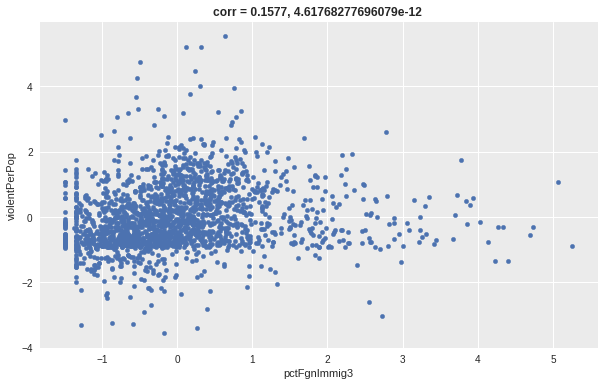

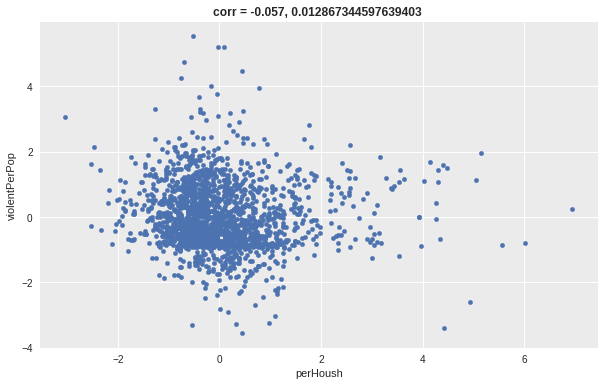

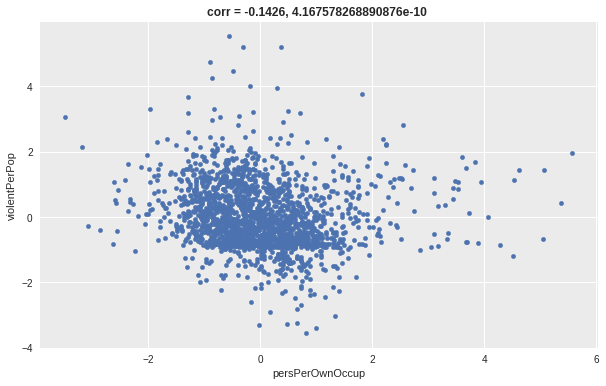

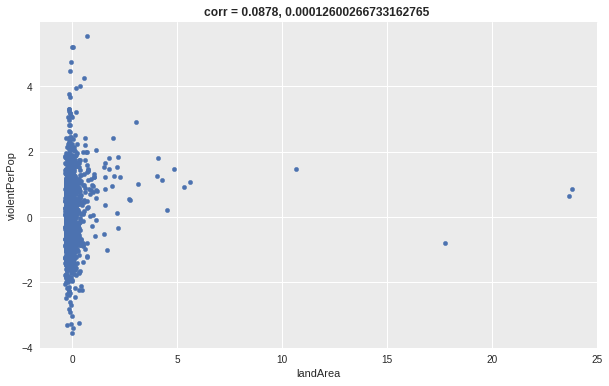

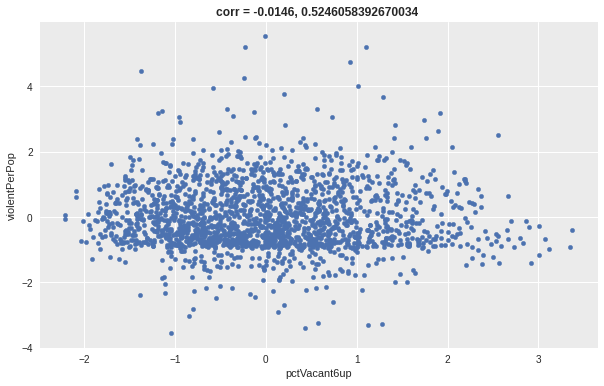

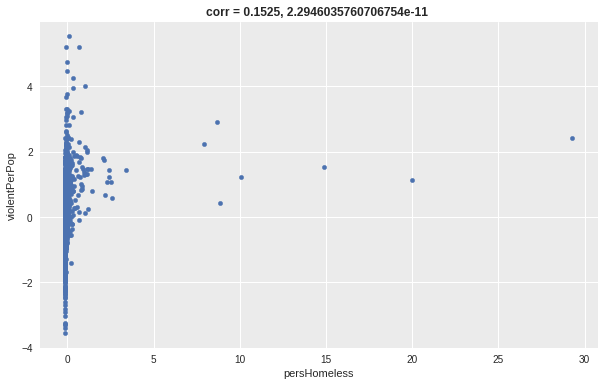

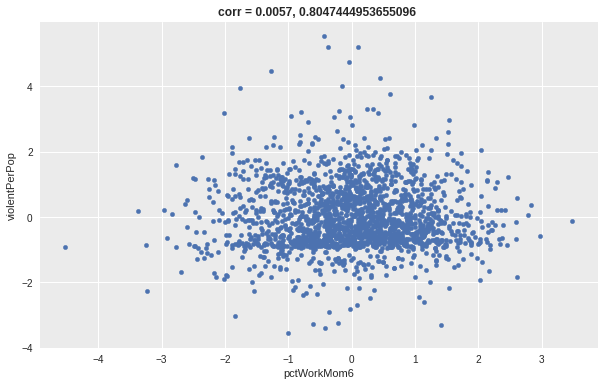

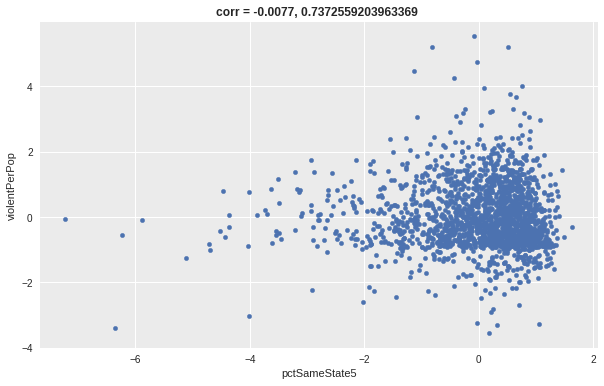

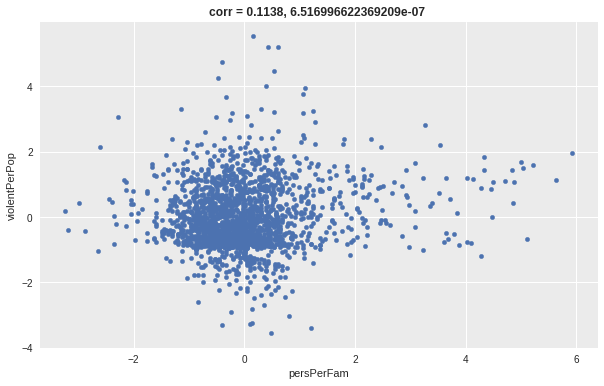

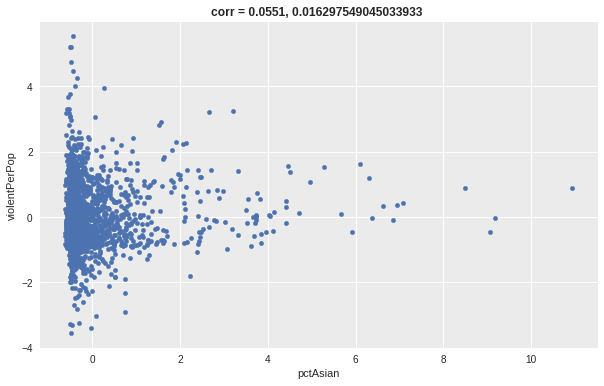

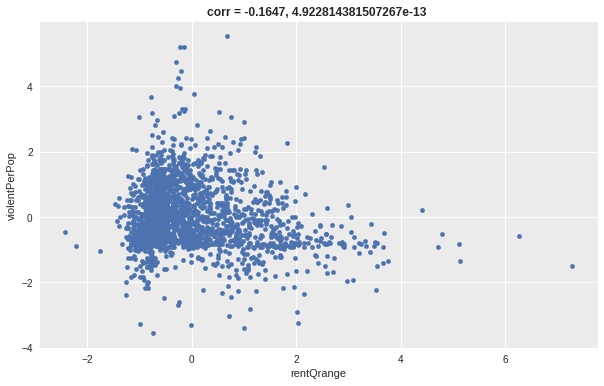

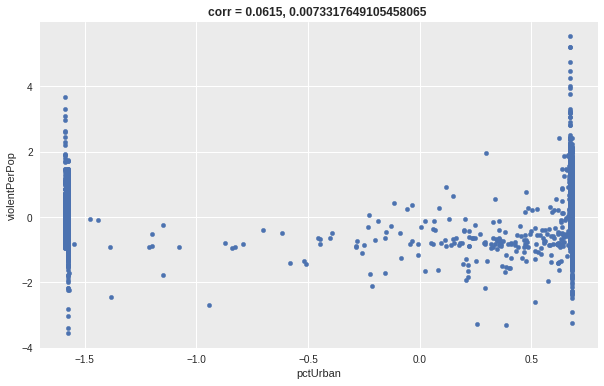

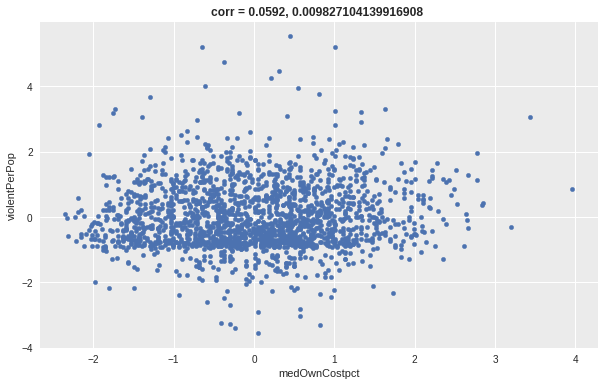

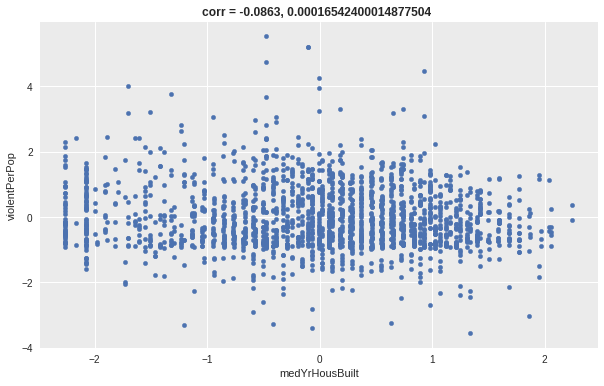

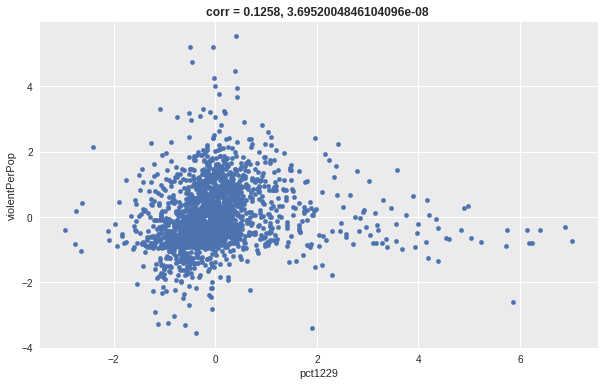

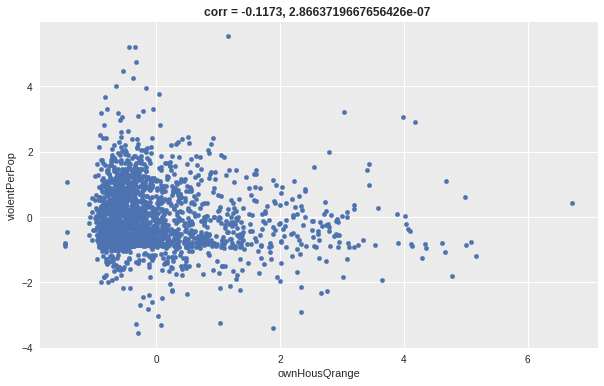

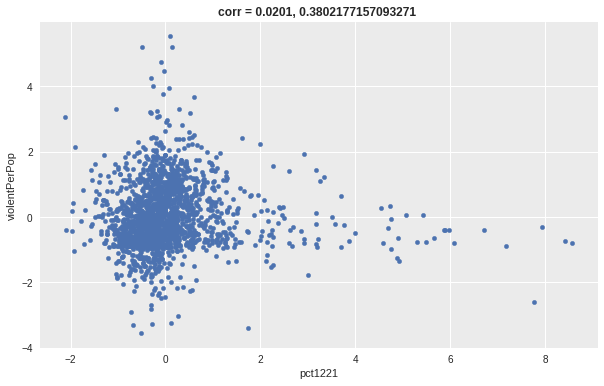

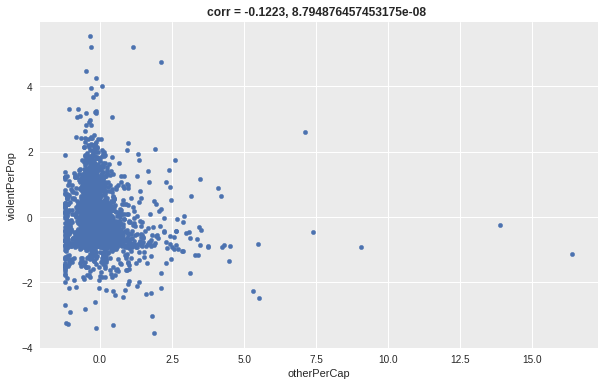

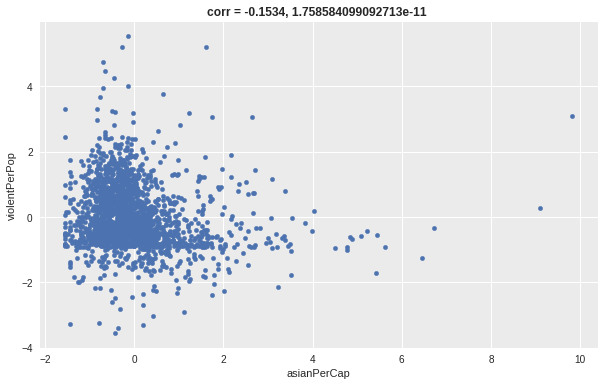

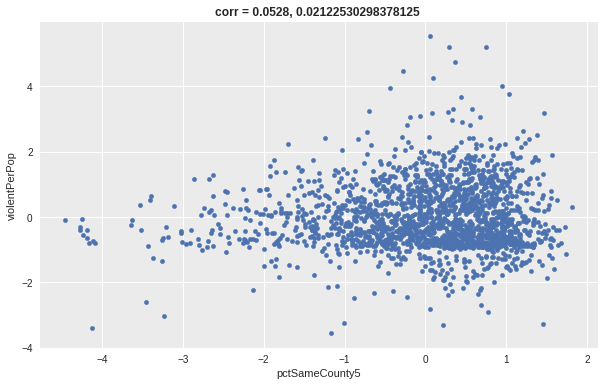

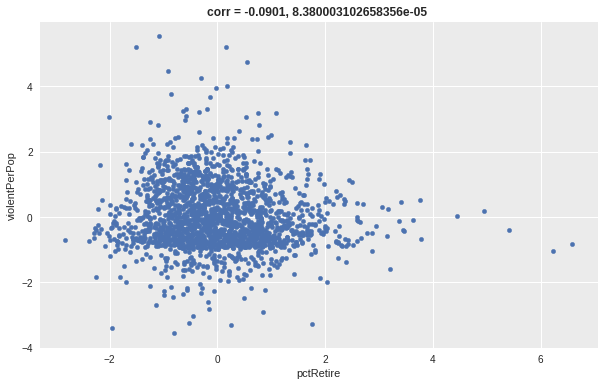

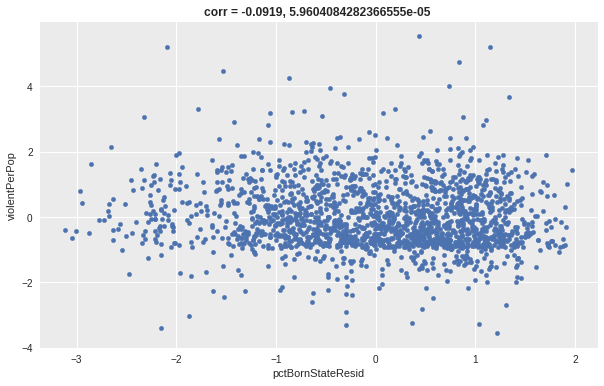

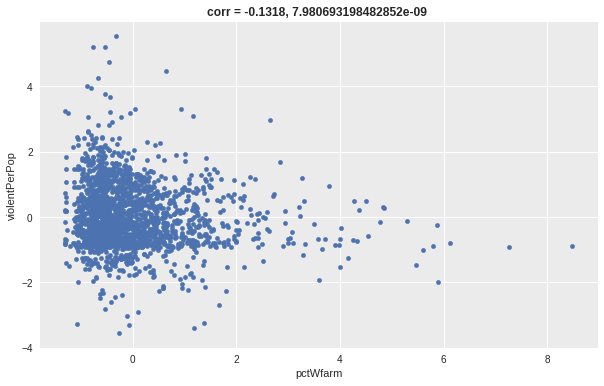

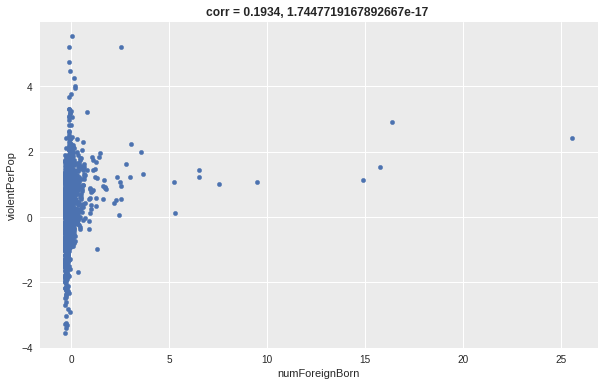

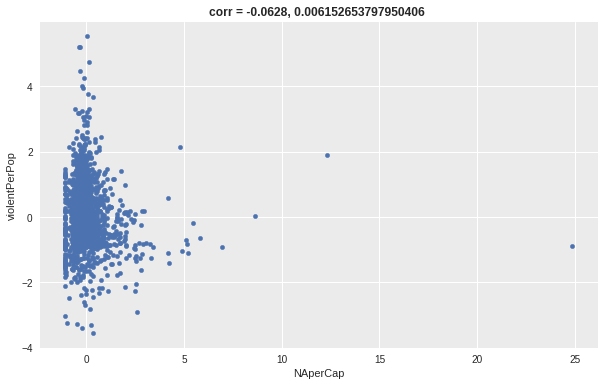

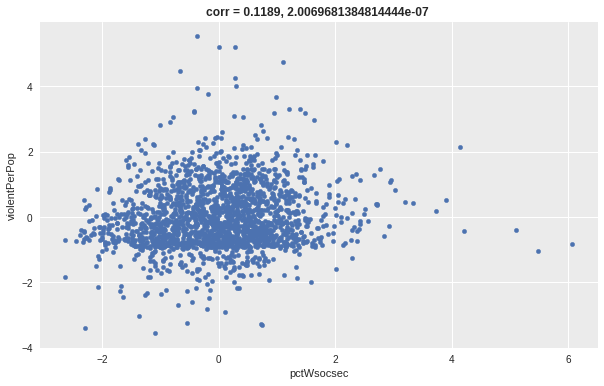

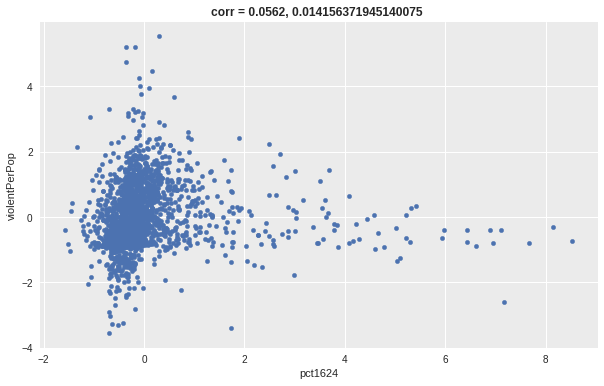

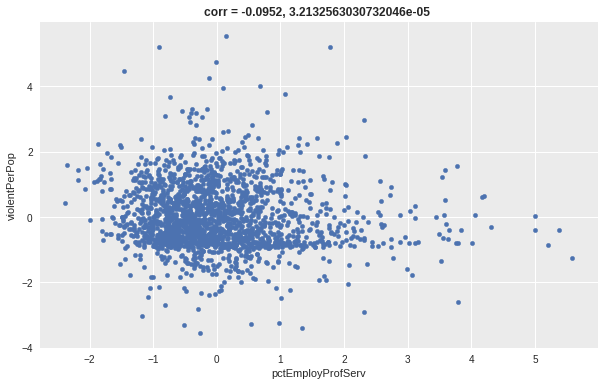

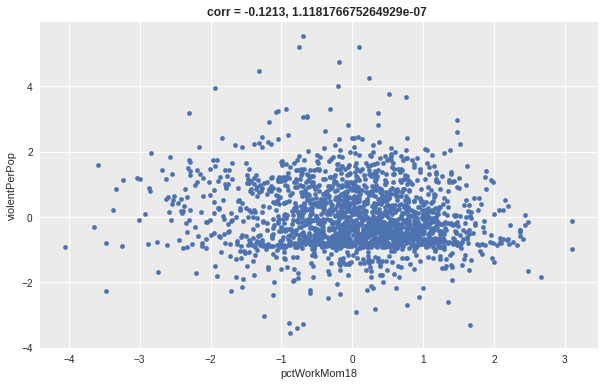

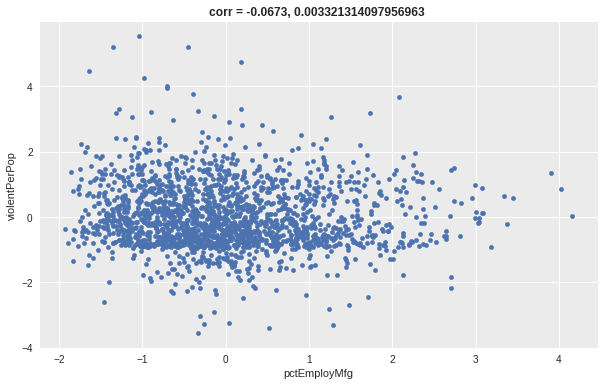

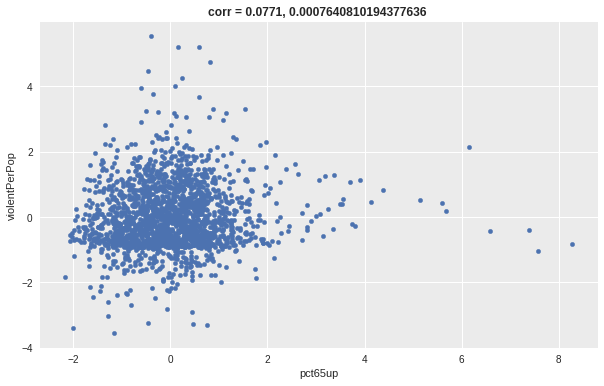

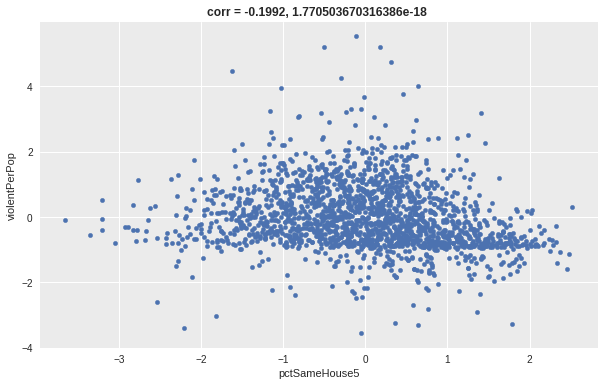

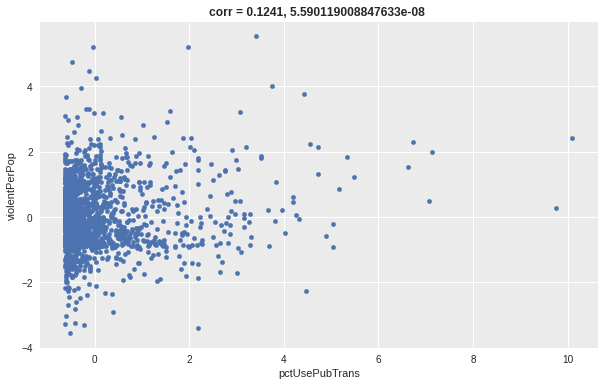

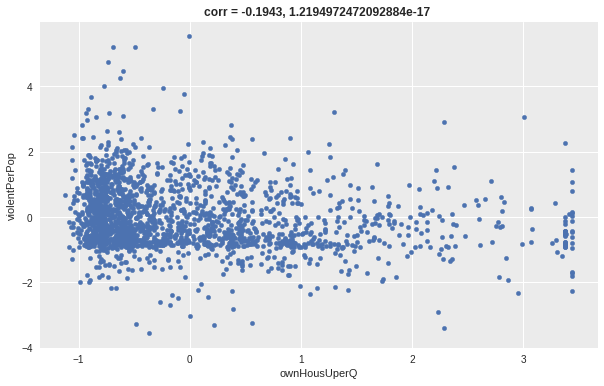

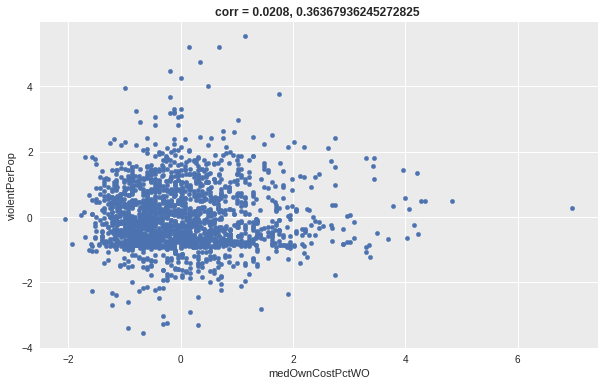

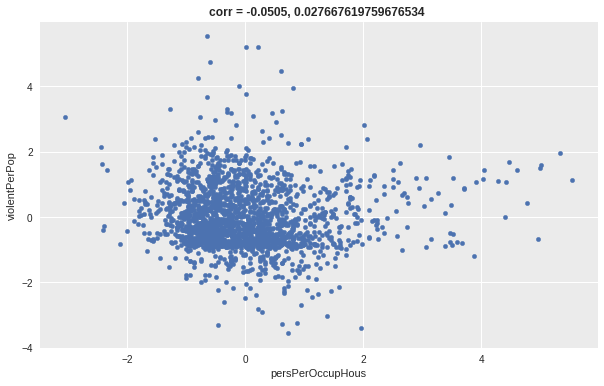

In [ ]:
for col in tqdm(less_coeffs):
    y = 'violentPerPop'
    data.plot.scatter(x = col, y = 'violentPerPop', figsize=(10,6))
    c, p = stats.pearsonr(data[col], data[y])
    plt.title("corr = {}, {} " .format(round(c, 4), p), size='large', weight='semibold')
    # plt.text(0+0.2, 4, "corr = {}, {} " .format(round(c, 4), p), size='large', color='black', weight='semibold')
    # plt.ylim(-4, 4)
    # plt.savefig(f'{col}.jpeg')
    plt.show() 

No significant non-linear relationships exist.

In [ ]:
y = 'violentPerPop'
x = 'State'
data[[x, y]].corr()
stats.pearsonr(data[col], data[y])

(-0.05049101567185305, 0.027667619759676534)

In [ ]:
data_update = data.drop(less_coeffs, axis = 1)
data_update

State       pop  pctBlack  pctWhite   pctHisp  persUrban  medIncome  \
0    0.771571 -0.104095 -0.620185  0.673814 -0.414458  -0.083116   0.132323   
1   -0.109683  0.301403 -0.493857  0.753972 -0.500495   0.321092  -0.919371   
2   -0.430139 -0.106445 -0.558805  0.809839 -0.491277  -0.085458   0.664886   
3   -0.670481  0.005771  0.340483  0.099353 -0.520161   0.026364  -0.796678   
4    0.130659  0.059224 -0.648021  0.842631 -0.514015   0.079698  -0.639581   
..        ...       ...       ...       ...       ...        ...        ...   
946 -1.263487 -0.332569 -0.592622 -0.083721  1.802849  -0.414685  -0.505227   
947  1.234592 -0.326491 -0.474120  0.536033 -0.131412  -0.414685  -0.646229   
948 -1.185422  0.070123  0.222529  0.028068 -0.326965   0.122585   0.126781   
949 -1.341552 -0.144249 -0.632841  0.550160  0.182845  -0.088231  -0.501110   
950 -1.341552 -0.183954 -0.498538 -0.761211  1.104347  -0.129605  -0.787451   

     pctWwage   pctWdiv  pctPubAsst  ...  ownHousMed  rentLowQ   rentMed  \
0    0.484789  0.965603   -0.854621  ...   -0.327399  0.262728 -0.029190   
1   -0.310027 -0.162601    0.069339  ...   -0.748497 -0.801798 -0.883860   
2    0.161496  0.344239   -0.308644  ...    0.694773  0.901444  1.362537   
3   -0.844164 -0.581228    0.442902  ...   -0.943472 -1.000967 -1.039780   
4    0.700744  0.298585   -0.573896  ...   -0.559292 -0.623232 -0.647093   
..        ...       ...         ...  ...         ...       ...       ...   
946  0.153838 -1.035066    0.145189  ...   -0.553907 -0.340681 -0.397874   
947 -0.836124 -0.389343    0.286777  ...   -0.766173 -0.692532 -0.708445   
948  0.406729 -0.233235   -0.409924  ...    0.357514  0.708107  0.567722   
949 -2.334409  0.082137    0.516014  ...    0.080490  0.099133  0.099041   
950 -1.177972 -1.272383    2.772426  ...   -0.354834 -0.408345 -0.363993   

     rentUpperQ  medGrossRent  medRentpctHousInc  persEmergShelt  \
0     -0.074130     -0.139170          -0.753486       -0.079133   
1     -0.909901     -0.980380           0.036023        0.314665   
2      1.411684      1.332948          -0.650507       -0.099393   
3     -1.027202     -0.992063           0.001696       -0.072802   
4     -0.724174     -0.892754          -0.375895        0.058886   
..          ...           ...                ...             ...   
946   -0.382288     -0.485260           1.540915       -0.099289   
947   -0.740673     -0.662004           0.442098       -0.135204   
948    0.437581      0.649318          -0.004297        0.026413   
949    0.089014      0.039268           1.403563       -0.045417   
950   -0.411744     -0.462455           1.540915       -0.167528   

     pctForeignBorn  popDensity  violentPerPop  
0         -0.331330   -0.031649      -0.621913  
1         -0.721816   -0.288237      -0.259534  
2          0.134805   -0.076549      -0.608927  
3         -0.790790   -0.445223      -0.264735  
4         -0.666191   -0.156349      -0.788728  
..              ...         ...            ...  
946       -0.054610   -0.641668      -0.241791  
947       -0.516575   -0.655971       0.098397  
948        0.090115    0.737476      -0.141829  
949       -0.027981   -0.543105       0.051700  
950        1.030254   -0.495027       0.915687  

[1902 rows x 67 columns]

In [ ]:
data_update.shape

(1902, 67)

## Models

The following models shall be considered for the dataset:



1.   Linear regression 
2.   Polynomial regression 
3.   Ridge regression
4.   LASSO
5.   Principal component regression
6.   Elastic Net
7. Selection  based  on  forward  stepwise



In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_update.iloc[:,:-1], data_update.iloc[:,-1:], test_size=0.50)

In [ ]:
model = []
R_2_training = []
R_2_testing = []
MSE_training = []
MSE_testing  = []

In [ ]:
def Metrics(modelname, model_id, x_test = x_test, x_train = x_train, y_test = y_test, y_train = y_train):
  """A function that tracks the performance metrics of the models used"""


  model.append(model_id)

  if modelname == poly:
    x_test = pr.fit_transform(x_test)
    x_train = pr.fit_transform(x_train)
  

  R_2_training.append(modelname.score(x_train,y_train))
  R_2_testing.append(modelname.score(x_test,y_test))

  MSE_training.append(mean_squared_error(y_train, modelname.predict(x_train) ) )

  MSE_testing.append(mean_squared_error(y_test, modelname.predict(x_test) ) )

  return None


### Multivariate Linear Regression

This usually takes the form:



> $y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ⋯ + \beta_nX_n   $



In [ ]:
lm = LinearRegression()
lm


LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

The intercept is given by:

In [ ]:
lm.intercept_

array([-0.00350731])

The slopes/coefficients of the independent variables are given by:

In [ ]:
coeff = lm.coef_
coeff[0]

array([-0.01897907, -0.20130432,  0.21972475,  0.01597061,  0.0144743 ,
        0.618887  , -0.17227594, -0.167709  , -0.14582678,  0.05891128,
        0.31788382,  0.26730818, -0.16345387, -0.00950034,  0.02377316,
       -0.06646584, -0.0935716 , -0.04828195, -0.04257471, -0.18469205,
       -0.04112313,  0.20396824, -0.03003511,  0.13133383,  0.44249584,
        0.02115261,  0.35054253, -0.70032607,  0.13187347, -0.43431001,
       -0.04131843,  0.01382531, -0.1869419 ,  0.02925997,  0.01010433,
       -0.05879265,  0.07434849, -0.11493422, -0.35077163,  0.54051298,
       -0.04931578, -0.26901355, -0.23036907,  0.02418962,  0.0891748 ,
       -0.08766737, -0.77198061,  0.21526167,  0.04645741, -0.01602821,
       -0.02112012, -0.05223919,  0.67885689,  0.0370479 , -0.00766824,
       -0.0567136 ,  0.05150798, -0.07137792, -0.1963739 , -0.06723706,
       -0.03733759,  0.10618448,  0.07672209, -0.09191988, -0.05619184,
        0.03867247])

In [ ]:
coeff_names = data_update.columns
coeff_names

Index(['State', 'pop', 'pctBlack', 'pctWhite', 'pctHisp', 'persUrban',
       'medIncome', 'pctWwage', 'pctWdiv', 'pctPubAsst', 'medFamIncome',
       'perCapInc', 'whitePerCap', 'blackPerCap', 'hispPerCap', 'persPoverty',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy',
       'pctEmploy', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc',
       'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'pct2Par',
       'pctKids2Par', 'pctKids4w2Par', 'pct1217w2Par', 'kidsBornNevrMarr',
       'pctKidsBornNevrMarr', 'pctFgnImmig5', 'pctFgnImmig8', 'pctFgnImmig10',
       'pctImmig3', 'pctImmig5', 'pctImmig8', 'pctImmig10', 'pctSpeakOnlyEng',
       'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerRenterOccup',
       'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits',
       'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup',
       'pctVacantBoarded', 'pctHousWOphone', 'pctHousWOplumb', 'ownHousLowQ',
       'ownHousMed', 'rentLowQ

In [ ]:
coeff_names = np.delete(coeff_names, -1)
# coeff_names = list(coeff_names)

coeff_names

Index(['State', 'pop', 'pctBlack', 'pctWhite', 'pctHisp', 'persUrban',
       'medIncome', 'pctWwage', 'pctWdiv', 'pctPubAsst', 'medFamIncome',
       'perCapInc', 'whitePerCap', 'blackPerCap', 'hispPerCap', 'persPoverty',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy',
       'pctEmploy', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc',
       'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'pct2Par',
       'pctKids2Par', 'pctKids4w2Par', 'pct1217w2Par', 'kidsBornNevrMarr',
       'pctKidsBornNevrMarr', 'pctFgnImmig5', 'pctFgnImmig8', 'pctFgnImmig10',
       'pctImmig3', 'pctImmig5', 'pctImmig8', 'pctImmig10', 'pctSpeakOnlyEng',
       'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerRenterOccup',
       'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits',
       'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup',
       'pctVacantBoarded', 'pctHousWOphone', 'pctHousWOplumb', 'ownHousLowQ',
       'ownHousMed', 'rentLowQ

In [ ]:
coeff.shape, coeff_names.shape

((1, 66), (66,))

In [ ]:
lm.intercept_

array([-0.00350731])

In [ ]:
LinearModelOutPut = pd.DataFrame(zip(coeff_names, coeff[0]),
               columns =['Variable', 'Linear Model Coefficient'])
LinearModelOutPut

Variable  Linear Model Coefficient
0               State                 -0.018979
1                 pop                 -0.201304
2            pctBlack                  0.219725
3            pctWhite                  0.015971
4             pctHisp                  0.014474
..                ...                       ...
61       medGrossRent                  0.106184
62  medRentpctHousInc                  0.076722
63     persEmergShelt                 -0.091920
64     pctForeignBorn                 -0.056192
65         popDensity                  0.038672

[66 rows x 2 columns]

In [ ]:
LinearModelOutPut.sort_values(by = 'Linear Model Coefficient')

Variable  Linear Model Coefficient
46    pctPersOwnOccup                 -0.771981
27       pctAllDivorc                 -0.700326
29        pctKids2Par                 -0.434310
38          pctImmig5                 -0.350772
41    pctSpeakOnlyEng                 -0.269014
..                ...                       ...
26       pctFemDivorc                  0.350543
24      pctMaleDivorc                  0.442496
39          pctImmig8                  0.540513
5           persUrban                  0.618887
52  pctHousOwnerOccup                  0.678857

[66 rows x 2 columns]

In [ ]:
LinearModelOutPut.dtypes

Variable                     object
Linear Model Coefficient    float64
dtype: object

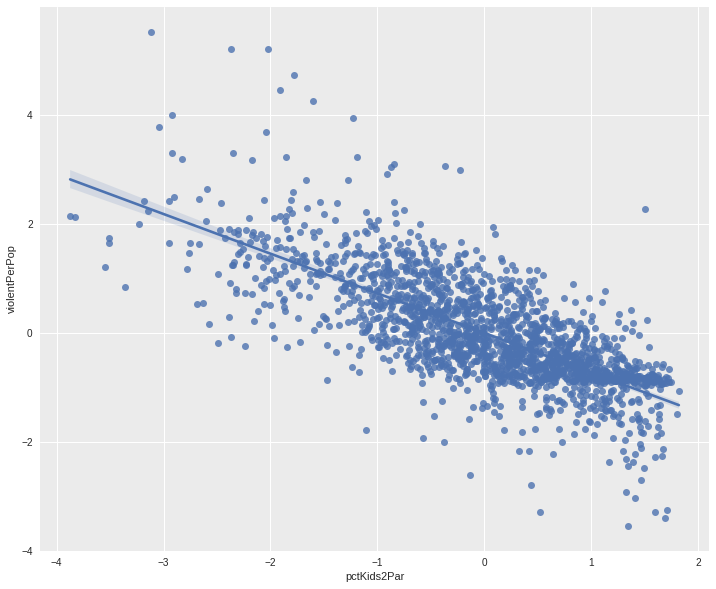

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="pctKids2Par", y="violentPerPop", data=data_update);

# plt.ylim(0,)

The above shows us that `'pctKids2Par'` is negatively correlated with `'violentPerPop'`

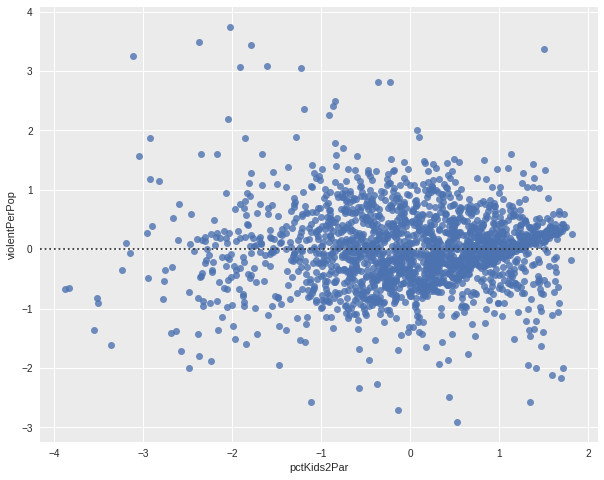

In [ ]:
plt.rcParams['figure.figsize'] = 10, 8
sns.residplot(x="pctKids2Par", y="violentPerPop", data=data_update)

We can see from this residual plot that the residuals are randomly spread around the x-axis, leading us to believe that a linear model is appropriate for this data.

We try to hold this assumption for the remaining $X$ variables.

We visualize our model for Multiple Linear Regression by using the distribution plot. Visualizing with the regression or residual plot gets complicated as several variables are involved.

The distribution plot gives us a nice way to look at the fit of the model.

We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [ ]:
y_hat = lm.predict(x_train)

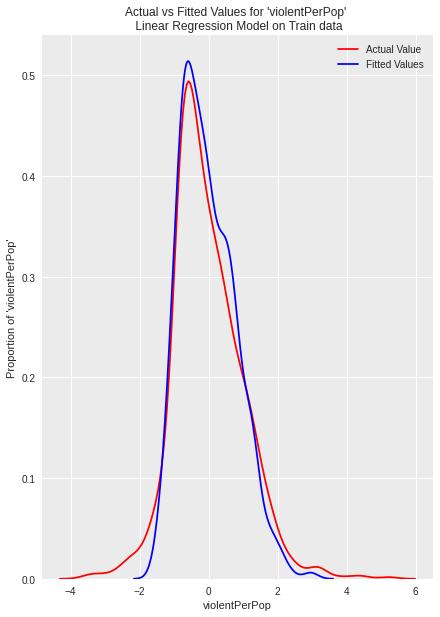

In [ ]:
plt.figure(figsize=(7, 10))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for 'violentPerPop' \n Linear Regression Model on Train data")
plt.xlabel('violentPerPop')
plt.ylabel("Proportion of 'violentPerPop'")
plt.legend()

plt.show()
plt.close()

The distribution plot above gave us some insight on how our model has performed. So far, it looks good but can be improved. 

In [ ]:
lm.score(x_train, y_train)

0.6340110166264732

In [ ]:
mean_squared_error(y_train, y_hat)

0.36490075682838785

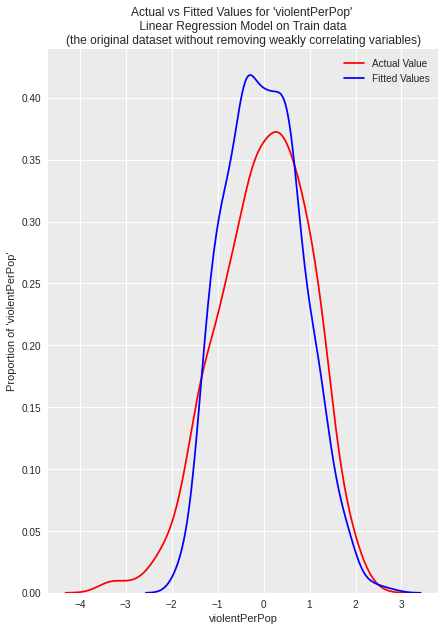

In [ ]:
lm2 = LinearRegression()
lm2.fit(xs_training, ys_training)

y_hat2 = lm2.predict(xs_training)
plt.figure(figsize=(7, 10))


ax1 = sns.distplot(ys_training, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for 'violentPerPop' \n Linear Regression Model on Train data \n(the original dataset without removing weakly correlating variables)")
plt.xlabel('violentPerPop')
plt.ylabel("Proportion of 'violentPerPop'")
plt.legend()

plt.show()
plt.close()

Plotting the original dataset that we were given only gave us at the end of the day a very poor plot. This shows that in the data exists a lot of noise that has been rightly removed as shown earlier.

In [ ]:
lm2.score(xs_training, ys_training)

0.6854968276430253

In [ ]:
mean_squared_error(y_hat2,ys_training)

0.31417246449960673

In [ ]:
lm.score(x_train, y_train) - lm2.score(xs_training, ys_training)

-0.05148581101655214

The calculation above shows us that the model with reduced variable is better since it achieves a closer $R^2$ value with lesser exogenous variables.

 ### Multivariate Polynomial Model

The analytical expression for Multivariate Polynomial function for a second-order (degree=2) polynomial with two variables is given by:



> $ Y \approx \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \beta_4X_1^2 + \beta_5X_2^2 $



As the number of variables and order increases, the model gets very complicated.

We create a PolynomialFeatures object of degree 2:

In [ ]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
x_train_pr=pr.fit_transform(x_train)

In [ ]:
x_train_pr.shape, x_train.shape

((951, 2278), (951, 66))

In the original data, there are 951 samples and 66 features. After the transformation, there are 951 samples and 2278 features.

To make our work easier, we use the Pipeline. This enables us to create a list of tuples including the name of the model or estimator and its corresponding constructor.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
Input=[ ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe_hat = pipe.predict(x_train)

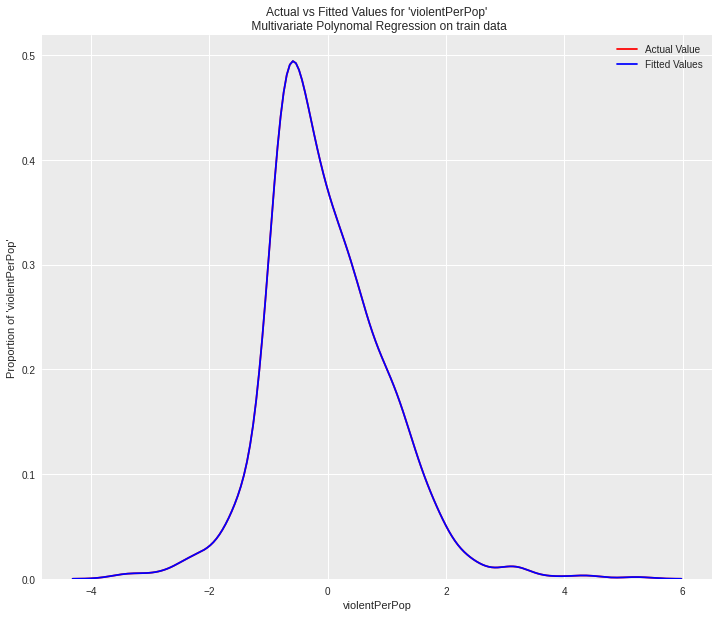

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for 'violentPerPop'\n Multivariate Polynomal Regression on train data")
plt.xlabel('violentPerPop')
plt.ylabel("Proportion of 'violentPerPop'")
plt.legend()

plt.show()
plt.close()

In [ ]:
pipe.score(x_train, y_train)

1.0

In [ ]:
mean_squared_error(y_train, ypipe_hat)

2.6057066298391857e-27

With the above, there are likelihood that our model has been overfitted using the polynomial multivariate linear model. When we use the test data, we shall be able to know better.

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title = None):
    """ Function for Plotting DistributionPlot """
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('violentPerPop')
    plt.ylabel('Proportion of violentPerPop')
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('violentPerPop')
    plt.legend()

In [ ]:
Rcross_lm = cross_val_score(lm, x_train, y_train, cv=5)
Rcross_lm, Rcross_lm.mean(), Rcross_lm.std()

(array([0.58733205, 0.60682104, 0.50712519, 0.53305745, 0.58063915]),
 0.5629949752218875,
 0.036991951467700145)

In [ ]:
yhat_test = lm.predict(x_test)

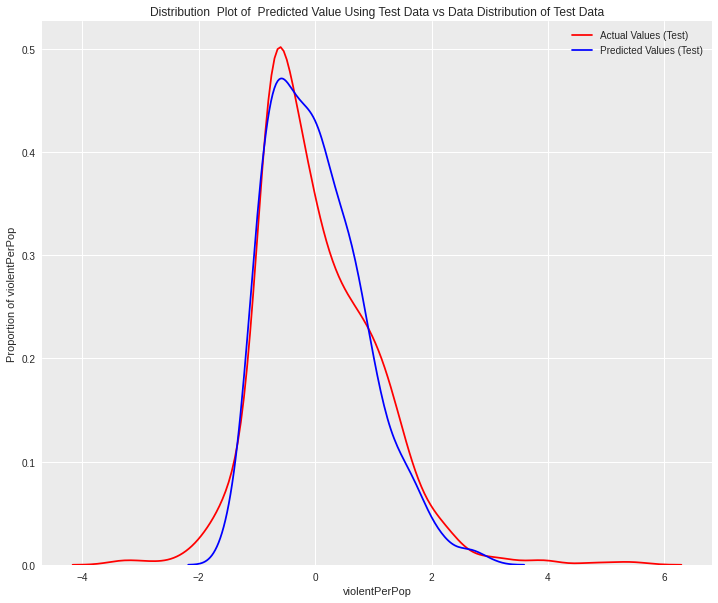

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Our linear model performs fairly once more on the test data.

We try to see if we can improve the accuracy in our test data by using a Polynomial Regression Model.

In [ ]:
pr = PolynomialFeatures(degree=2)

x_test_pr = pr.fit_transform(x_test)

x_train_pr = pr.fit_transform(x_train)

pr

PolynomialFeatures()

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
yhat_poly = poly.predict(x_test_pr)

In [ ]:
print("Predicted values:", yhat_poly[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [[1.83193314]
 [0.3329907 ]
 [0.07901495]
 [1.01891494]]
True values: [[-0.12718281]
 [ 0.09275003]
 [-0.85299525]
 [-0.06020635]]


In [ ]:
poly.score(x_train_pr, y_train), poly.score(x_test_pr, y_test)

(1.0, -5.843126941662309)

The negative values in our $R^2 $ shows that our data has been overfitted by the multivariate polynomial model.

In [ ]:
Metrics(lm, 'Multivariate Linear Regression')

In [ ]:
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression'],
 [0.6340110166264732],
 [0.591363969417114],
 [0.36490075682838785],
 [0.4085089447626821])

In [ ]:
Metrics(poly, 'Polynomial Regression (n = 2) ')
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression', 'Polynomial Regression (n = 2) '],
 [0.6340110166264732, 1.0],
 [0.591363969417114, -5.843126941662309],
 [0.36490075682838785, 1.9165293451099473e-27],
 [0.4085089447626821, 6.840998728937405])

### Ridge Regression

We create a Ridge regression object, setting the regularization parameter ($\alpha$) to 0.1.

In [ ]:
RigeModel=Ridge(alpha =  0.1 )

In [ ]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
yhat_ridge = RigeModel.predict(x_test)

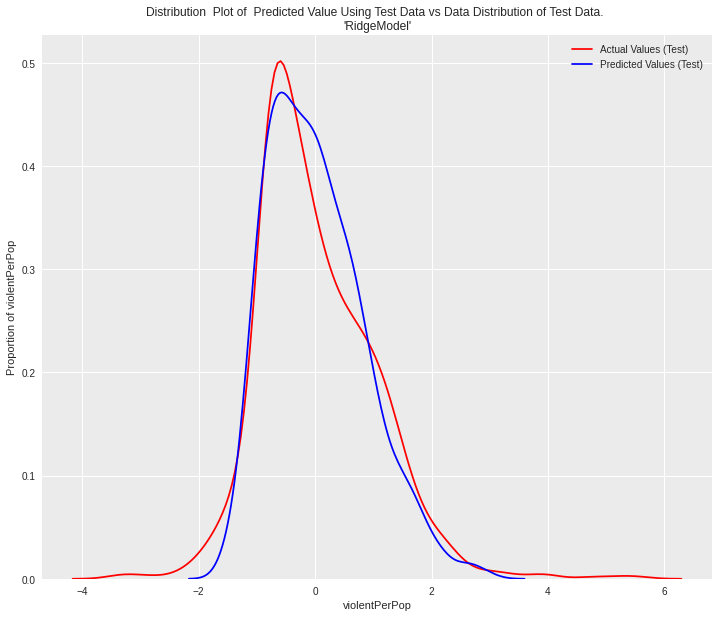

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data. \n'RidgeModel'"
DistributionPlot(y_test,yhat_ridge,"Actual Values (Test)","Predicted Values (Test)",Title)

#### How do we know the perfect $\alpha$? 

In [ ]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train, y_train)
    test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s]

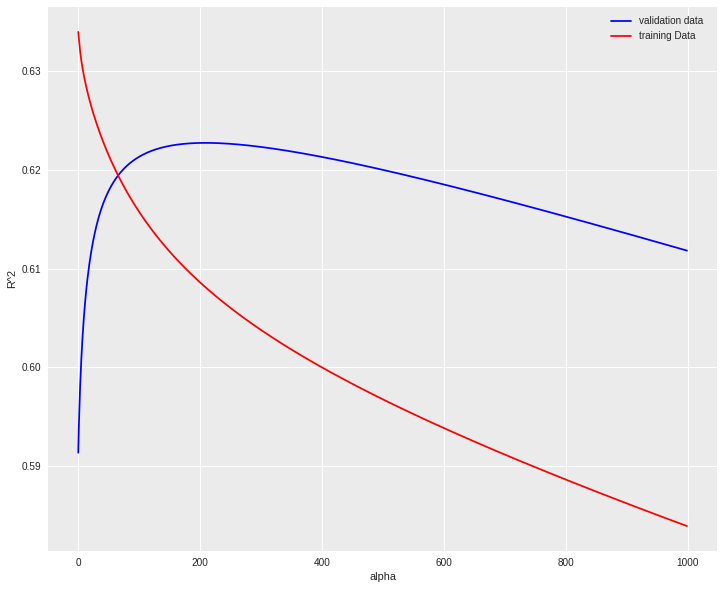

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test,'b', label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha =  np.arange(0,300, 0.1)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train, y_train)
    test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/3000 [00:00<?, ?it/s]

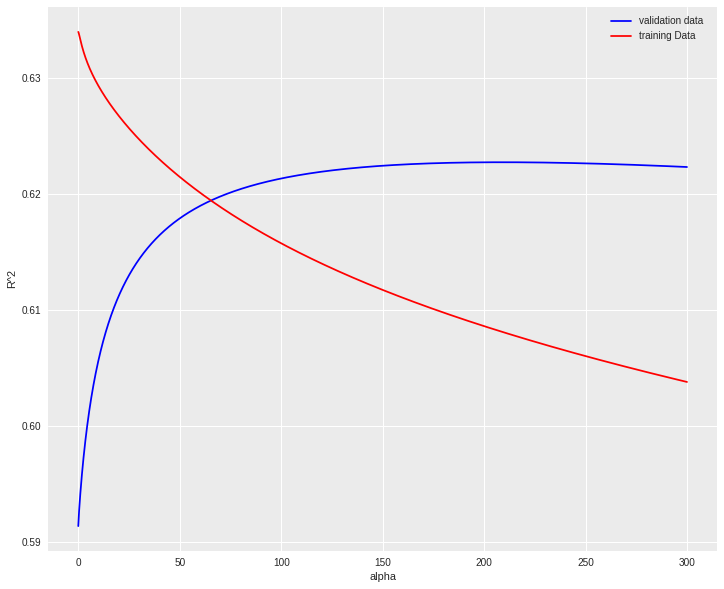

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test,'b', label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:

parameters= [{'alpha': [0.001,0.1,1, 10, 100, 150, 200, 350, 300, 400, 500, 600, 700, 800, 900, 1000]} ]
Grid = GridSearchCV(RR, parameters, cv=4 )
Grid.fit(x_train, y_train)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 150, 200, 350, 300,
                                    400, 500, 600, 700, 800, 900, 1000]}])

In [ ]:
BestRR = Grid.best_estimator_
BestRR

Ridge(alpha=100)

In [ ]:
out = Grid.cv_results_
out = pd.DataFrame(out)
out.iloc[:, 4:].sort_values(by = "rank_test_score")

param_alpha            params  split0_test_score  split1_test_score  \
4          100    {'alpha': 100}           0.579364           0.612885   
5          150    {'alpha': 150}           0.579337           0.610568   
6          200    {'alpha': 200}           0.578999           0.608602   
8          300    {'alpha': 300}           0.577906           0.605254   
3           10     {'alpha': 10}           0.572205           0.616248   
7          350    {'alpha': 350}           0.577232           0.603753   
9          400    {'alpha': 400}           0.576498           0.602327   
10         500    {'alpha': 500}           0.574886           0.599629   
11         600    {'alpha': 600}           0.573126           0.597072   
12         700    {'alpha': 700}           0.571253           0.594610   
13         800    {'alpha': 800}           0.569294           0.592219   
14         900    {'alpha': 900}           0.567268           0.589881   
15        1000   {'alpha': 1000}           0.565191           0.587587   
2            1      {'alpha': 1}           0.563974           0.607448   
1          0.1    {'alpha': 0.1}           0.561233           0.600846   
0        0.001  {'alpha': 0.001}           0.560422           0.599480   

    split2_test_score  split3_test_score  mean_test_score  std_test_score  \
4            0.485776           0.601970         0.569999        0.050106   
5            0.480665           0.604058         0.568657        0.052121   
6            0.478470           0.604809         0.567720        0.052772   
8            0.477882           0.604506         0.566387        0.052272   
3            0.492909           0.583008         0.566092        0.045263   
7            0.478397           0.603883         0.565816        0.051626   
9            0.479119           0.603079         0.565256        0.050869   
10           0.480760           0.601121         0.564099        0.049231   
11           0.482330           0.598879         0.562852        0.047587   
12           0.483670           0.596476         0.561502        0.046023   
13           0.484734           0.593979         0.560056        0.044565   
14           0.485524           0.591431         0.558526        0.043219   
15           0.486061           0.588857         0.556924        0.041982   
2            0.465988           0.572320         0.552432        0.052507   
1            0.454395           0.562845         0.544830        0.054566   
0            0.451299           0.557949         0.542287        0.055054   

    rank_test_score  
4                 1  
5                 2  
6                 3  
8                 4  
3                 5  
7                 6  
9                 7  
10                8  
11                9  
12               10  
13               11  
14               12  
15               13  
2                14  
1                15  
0                16

We now have that $\alpha = 200$ is the best hyper parameter for our ridge regression.

In [ ]:
BestRR2 = Ridge(alpha = 200 )
BestRR2.fit(x_train, y_train)
BestRR2.score(x_train, y_train), BestRR2.score(x_test, y_test)

(0.6086161970147277, 0.6227587018530487)

In [ ]:
Metrics( BestRR2, ' Ridge Regression (alpha = 200) ')
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression',
  'Polynomial Regression (n = 2) ',
  ' Ridge Regression (alpha = 200) '],
 [0.6340110166264732, 1.0, 0.6086161970147277],
 [0.591363969417114, -5.843126941662309, 0.6227587018530487],
 [0.36490075682838785, 1.9165293451099473e-27, 0.3902200678372355],
 [0.4085089447626821, 6.840998728937405, 0.37712397608966375])

In [ ]:
y_hat_RR_train = BestRR2.predict(x_train)

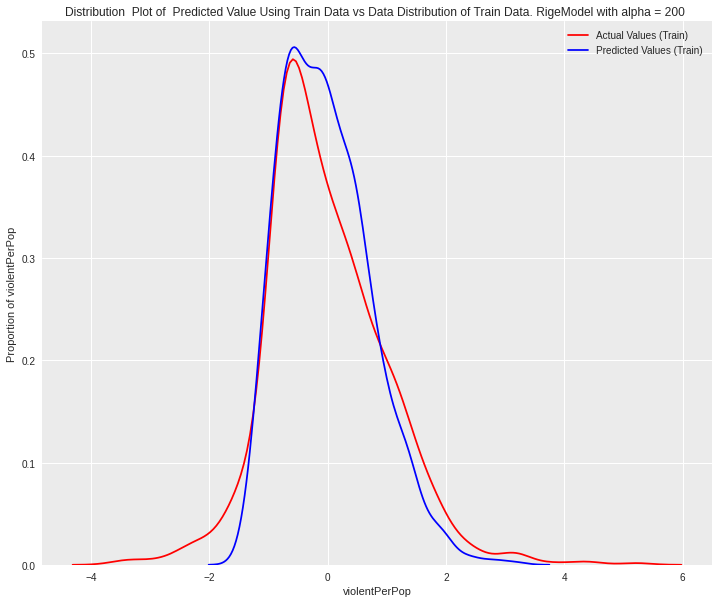

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Train Data vs Data Distribution of Train Data. RigeModel with alpha = 200 "
DistributionPlot(y_train,y_hat_RR_train,"Actual Values (Train)","Predicted Values (Train)",Title)

In [ ]:
y_hat_RR = BestRR2.predict(x_test)

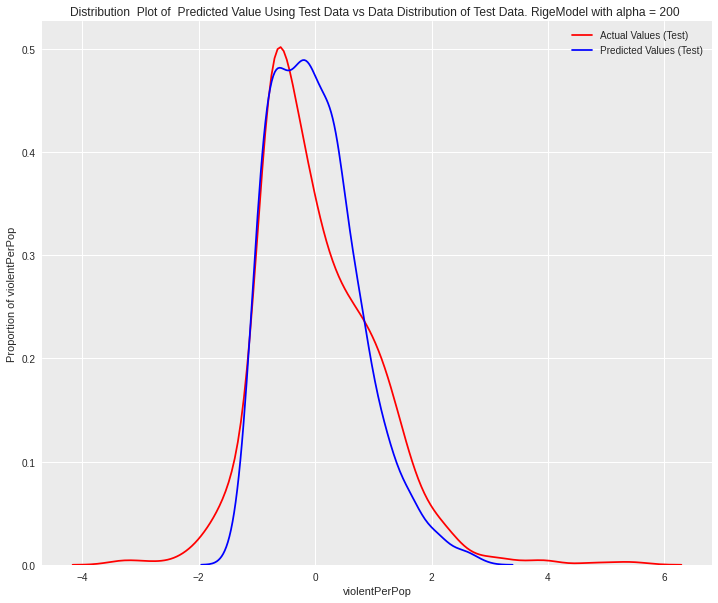

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data. RigeModel with alpha = 200 "
DistributionPlot(y_test,y_hat_RR,"Actual Values (Test)","Predicted Values (Test)",Title)

### LASSO

In [ ]:
lass0 = Lasso(alpha=0.1)

In [ ]:
lass0.fit(x_train,y_train)
#Predicting for x_test
y_hat_lass =lass0.predict(x_test)


In [ ]:
lass0.score(x_train, y_train), lass0.score(x_test, y_test)

(0.5555374111029328, 0.5828714865381182)

In [ ]:
alphaLasso = np.linspace(0, 1, 100)
# alphaLasso = np.logspace(-4, -0.5, 30)
n_folds  = 4
lasso = Lasso()

tuned_parameters = [{"alpha": alphaLasso}]

In [ ]:
lass_model = GridSearchCV(lasso, tuned_parameters, cv = n_folds , refit=False)

In [ ]:
lass_model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])}],
             refit=False)

In [ ]:
out_lasso = lass_model.cv_results_
out_lasso = pd.DataFrame(out_lasso)
out_lasso.iloc[:, 4:].sort_values(by = "rank_test_score")

param_alpha                           params  split0_test_score  \
4     0.040404   {'alpha': 0.04040404040404041}           0.573346   
3     0.030303  {'alpha': 0.030303030303030304}           0.575128   
5     0.050505   {'alpha': 0.05050505050505051}           0.570729   
2     0.020202  {'alpha': 0.020202020202020204}           0.578461   
6     0.060606   {'alpha': 0.06060606060606061}           0.567539   
..         ...                              ...                ...   
75    0.757576    {'alpha': 0.7575757575757577}          -0.000010   
98    0.989899      {'alpha': 0.98989898989899}          -0.000010   
73    0.737374    {'alpha': 0.7373737373737375}          -0.000010   
85    0.858586    {'alpha': 0.8585858585858587}          -0.000010   
99         1.0                   {'alpha': 1.0}          -0.000010   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
4            0.600729           0.502828           0.588030         0.566233   
3            0.601550           0.495564           0.590763         0.565751   
5            0.598791           0.502134           0.584187         0.563960   
2            0.603755           0.480074           0.592900         0.563798   
6            0.595866           0.498128           0.580245         0.560444   
..                ...                ...                ...              ...   
75          -0.005561          -0.000485          -0.002367        -0.002106   
98          -0.005561          -0.000485          -0.002367        -0.002106   
73          -0.005561          -0.000485          -0.002367        -0.002106   
85          -0.005561          -0.000485          -0.002367        -0.002106   
99          -0.005561          -0.000485          -0.002367        -0.002106   

    std_test_score  rank_test_score  
4         0.037868                1  
3         0.041597                2  
5         0.037049                3  
2         0.049164                4  
6         0.037351                5  
..             ...              ...  
75        0.002181               74  
98        0.002181               74  
73        0.002181               74  
85        0.002181               74  
99        0.002181               74  

[100 rows x 9 columns]

In [ ]:
best_lass_model = Lasso(alpha = 0.040404 )

best_lass_model.fit(x_train, y_train)

Lasso(alpha=0.040404)

In [ ]:
best_lass_model.score(x_train, y_train), best_lass_model.score(x_test, y_test)

(0.5824285447489119, 0.6142142470946172)

In [ ]:
Metrics(best_lass_model , ' Lasso Regression (alpha = 0.040404)')
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression',
  'Polynomial Regression (n = 2) ',
  ' Ridge Regression (alpha = 200) ',
  ' Lasso Regression (alpha = 0.040404)'],
 [0.6340110166264732, 1.0, 0.6086161970147277, 0.5824285447489119],
 [0.591363969417114,
  -5.843126941662309,
  0.6227587018530487,
  0.6142142470946172],
 [0.36490075682838785,
  1.9165293451099473e-27,
  0.3902200678372355,
  0.41632985410258366],
 [0.4085089447626821,
  6.840998728937405,
  0.37712397608966375,
  0.3856657735223581])

In [ ]:
y_hat_lass_tr = best_lass_model.predict(x_train)

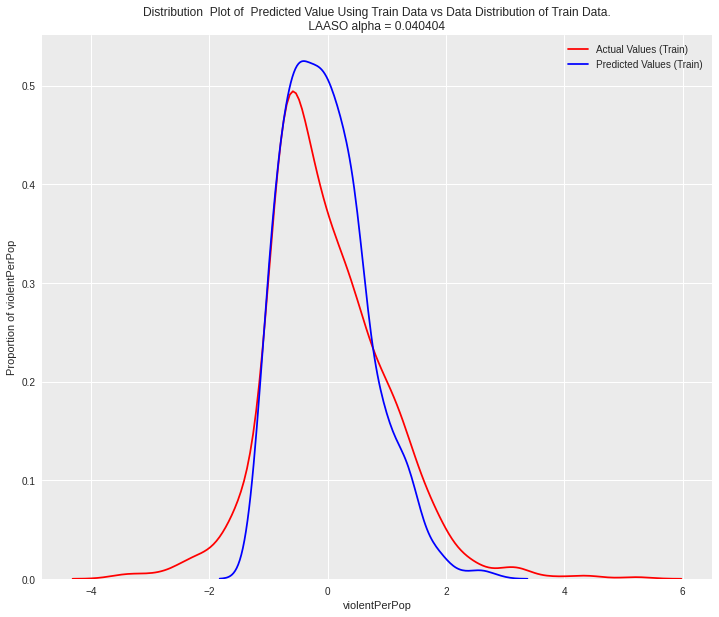

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Train Data vs Data Distribution of Train Data.\n LAASO alpha = 0.040404 "
DistributionPlot(y_train,y_hat_lass_tr,"Actual Values (Train)","Predicted Values (Train)",Title)

In [ ]:
y_hat_lass = best_lass_model.predict(x_test)

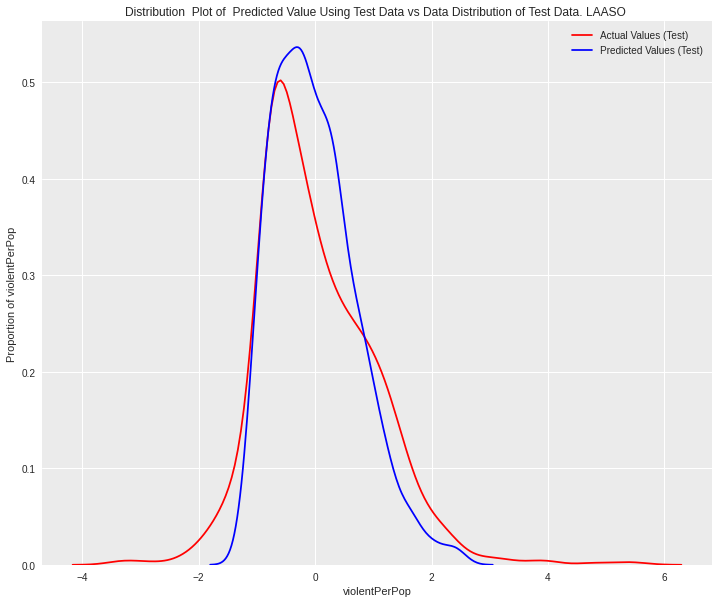

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data. LAASO "
DistributionPlot(y_test,y_hat_lass,"Actual Values (Test)","Predicted Values (Test)",Title)

### Elastic Net

In [ ]:
# model = ElasticNet()
# # define model evaluation method

# cv = 4

# # define grid
# grid = dict()

# grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# grid['l1_ratio'] = np.arange(0, 1, 0.01)

# # define search
# search = GridSearchCV(model, grid, cv=cv)

# # perform the search
# results = search.fit(x_test, y_test)

# # summarize
# print('MAE: %.3f' % results.best_score_)
# print('Config: %s' % results.best_params_)

### Principal Component Regression

This time around, we use the entire dataset i.e. without the reduction made earlier.

For the reduced dataset + transformation we used:

In [ ]:
pca2 = PCA()
regr = LinearRegression()

pca.fit_transform(scale(X)): This tells Python that each of the predictor variables should be scaled to have a mean of 0 and a standard deviation of 1. This ensures that no predictor variable is overly influential in the model if it happens to be measured in different units.

In [ ]:
X_reduced_train = pca2.fit_transform(x_train)
X_reduced_test = pca2.fit_transform(x_test)

In [ ]:
regr.fit(X_reduced_train, y_train)

LinearRegression()

In [ ]:
y_hat_pca2 = regr.predict(X_reduced_test)

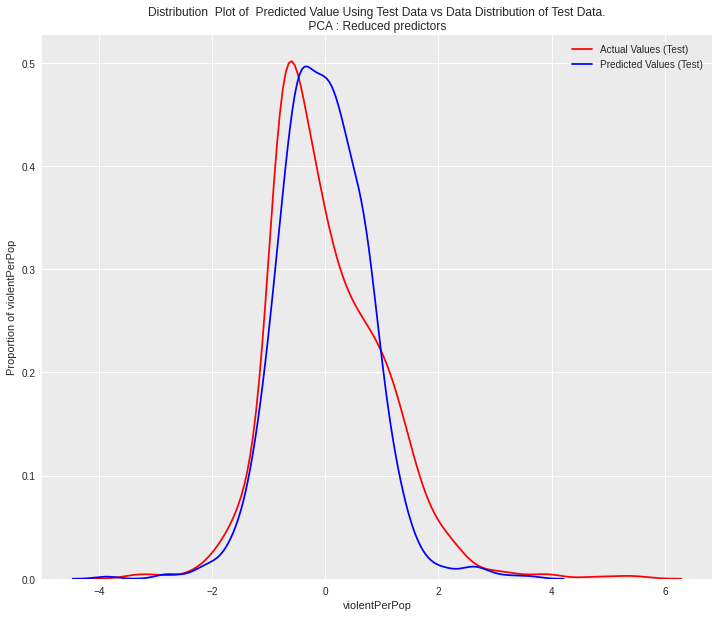

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data.\n PCA : Reduced predictors "
DistributionPlot(y_test,y_hat_pca2,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
mean_squared_error(y_test, y_hat_pca2)

2.259960223661431

In [ ]:
regr.score(X_reduced_train, y_train), regr.score(X_reduced_test, y_test)

(0.6340110166264733, -1.2606632900259123)

Transforming the data makes it perform badly.

We try the same approach this time, without transforming it.

In [ ]:
pca = make_pipeline( PCA(), LinearRegression())
# pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())

In [ ]:
pca.fit(x_train, y_train)

Pipeline(steps=[('pca', PCA()), ('linearregression', LinearRegression())])

In [ ]:
pca_steps = pca.named_steps["pca"]
pca_steps

PCA()

In [ ]:
pca.score(x_train, y_train), pca.score(x_test, y_test)

(0.6340110166264732, 0.5913639694171139)

In [ ]:
explained = pca[0].explained_variance_ratio_
cumulative_explained = explained.cumsum()
# np.cumsum(np.round(explained, decimals=4)*100)
cumulative_explained

array([0.33457265, 0.51304139, 0.62281851, 0.69544363, 0.7409803 ,
       0.77732732, 0.80839645, 0.83008293, 0.84907978, 0.8643944 ,
       0.87821937, 0.89026114, 0.90042716, 0.91028983, 0.91911607,
       0.92704321, 0.93439126, 0.94081389, 0.94628103, 0.95156394,
       0.95599898, 0.96023443, 0.96418735, 0.96742726, 0.97051599,
       0.97302311, 0.97541772, 0.97757896, 0.97969047, 0.98154959,
       0.9833478 , 0.98494425, 0.9864225 , 0.98765303, 0.98882674,
       0.98994729, 0.99100009, 0.99187103, 0.99272821, 0.99350677,
       0.99422836, 0.99482945, 0.99540351, 0.99595409, 0.99647161,
       0.9969438 , 0.99740251, 0.99783606, 0.9981631 , 0.99844662,
       0.99869348, 0.99891515, 0.9991037 , 0.99927605, 0.99944479,
       0.99953704, 0.99962378, 0.99969998, 0.99977078, 0.99983421,
       0.99989101, 0.99993397, 0.99996256, 0.99998177, 0.99999441,
       1.        ])

In [ ]:
# pca = PCA(n_components = 10 )
# pca.fit(X)
# explained = pca.explained_variance_ratio_
# cumulative_explained = explained.cumsum()

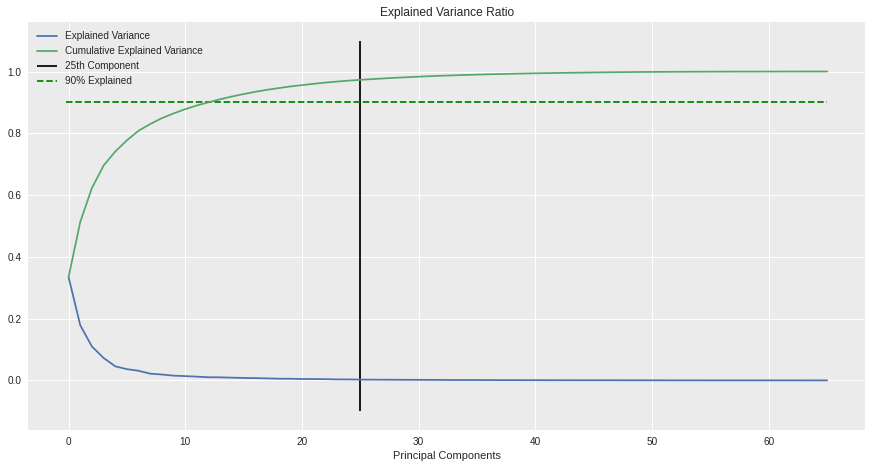

In [ ]:
plt.figure(figsize=(15,7.5))
plt.plot(range(0, 66), explained, label='Explained Variance')
plt.plot(range(0, 66), cumulative_explained, label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.vlines(x=25, ymin= -0.1, ymax=1.1, colors= 'k', label = "25th Component")
plt.hlines(y=0.90, xmin=-0.2, xmax=65, colors= 'g', linestyles='--', label = "90% Explained")
plt.title('Explained Variance Ratio')
plt.legend()
plt.show()

In [ ]:
cumulative_explained[12], cumulative_explained[20]

(0.9004271639125981, 0.9559989759408647)

*About 90% of the variance is explained by the first 12 components, and 95% of the variance is explained by the first 20 components*

In [ ]:
pca[0].get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
weights = pca[0].components_
weights.shape

(66, 66)

In [ ]:
first_component = weights[0]
vals = np.abs(first_component)

In [ ]:
first_component

array([-1.30564031e-04,  4.48764247e-02,  1.08449143e-01, -1.27579645e-01,
        8.18297015e-02,  4.15967342e-02, -1.86952994e-01, -1.04913256e-01,
       -1.89877266e-01,  1.72844884e-01, -1.88054070e-01, -1.65843344e-01,
       -1.45608568e-01, -8.99403824e-02, -1.26184049e-01,  6.29626189e-02,
        1.81705711e-01,  1.49788912e-01,  1.70884096e-01, -1.40719327e-01,
        1.60135592e-01, -1.22277948e-01,  1.40827387e-01, -1.53214360e-01,
        1.38552021e-01,  6.51406030e-02,  1.44749057e-01,  1.45225411e-01,
       -1.83802076e-01, -1.86525917e-01, -1.81634799e-01, -1.62816688e-01,
        5.74826774e-02,  1.56392969e-01,  7.03857405e-02,  7.26842183e-02,
        7.95347447e-02,  3.31116848e-02,  3.79388251e-02,  3.56557305e-02,
        3.83761146e-02, -5.28693920e-02,  7.44267411e-02,  8.73882317e-02,
        6.91045800e-02,  6.92602989e-02, -1.59704534e-01,  1.07173258e-01,
        1.44550216e-01, -1.09757871e-01,  5.20231243e-02, -6.56775809e-02,
       -1.47071634e-01,  

In [ ]:
np.where(vals>0.1)

(array([ 2,  3,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 26, 27, 28, 29, 30, 31, 33, 46, 47, 48, 49, 52, 54, 55, 56,
        57, 58, 59, 60, 61]),)

In [ ]:
x_train.columns[[2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 42, 43, 44, 46, 47, 48, 49,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61]]

Index(['pctBlack', 'pctWhite', 'pctHisp', 'medIncome', 'pctWwage', 'pctWdiv',
       'pctPubAsst', 'medFamIncome', 'perCapInc', 'whitePerCap', 'hispPerCap',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy',
       'pctEmploy', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc',
       'pctFemDivorc', 'pctAllDivorc', 'pct2Par', 'pctKids2Par',
       'pctKids4w2Par', 'pct1217w2Par', 'pctKidsBornNevrMarr',
       'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'pctPersOwnOccup',
       'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm',
       'pctHousOwnerOccup', 'pctVacantBoarded', 'pctHousWOphone',
       'pctHousWOplumb', 'ownHousLowQ', 'ownHousMed', 'rentLowQ', 'rentMed',
       'rentUpperQ', 'medGrossRent'],
      dtype='object')

In [ ]:
len(np.where(vals>0.1)[0])

39

In [ ]:
twelveth_component = weights[11]
vals12 = np.abs(twelveth_component)

In [ ]:
twelveth_component

array([ 0.36445865, -0.03651584,  0.13249485, -0.02776417, -0.14246832,
       -0.031325  ,  0.01414473, -0.05012114, -0.00324811, -0.20405333,
       -0.00865805, -0.0143418 , -0.01782806, -0.13683365,  0.11930423,
       -0.04461803, -0.18489825,  0.0402819 ,  0.15305732, -0.20558665,
       -0.10098855,  0.02799117,  0.16935132, -0.23935745, -0.0592592 ,
       -0.05358691, -0.18026833, -0.12798754,  0.00245784, -0.02132101,
        0.00845661,  0.01291149,  0.01177906,  0.1119166 ,  0.10529056,
        0.12163529,  0.11064981,  0.00726183,  0.01995169,  0.02810822,
        0.03076772,  0.06302906, -0.01005617, -0.03663214, -0.04366198,
       -0.00420878,  0.05879901, -0.05281604,  0.06245832, -0.06013451,
        0.07392457, -0.51902663,  0.06975925,  0.13394587, -0.02578674,
        0.06868219, -0.048212  , -0.05464056,  0.14728279,  0.13666212,
        0.11988372,  0.17358872,  0.00942292, -0.02009913,  0.01267488,
        0.15475348])

In [ ]:
np.where(vals12 > 0.1)

(array([ 0,  2,  4,  9, 13, 14, 16, 18, 19, 20, 22, 23, 26, 27, 33, 34, 35,
        36, 51, 53, 58, 59, 60, 61, 65]),)

In [ ]:
len(np.where(vals12>0.1)[0])

25

In [ ]:
x_train.columns[[0,  2,  3,  4,  9, 11, 13, 16, 19, 23, 25, 26, 27, 33, 44, 46, 51,
        52, 54, 56, 57, 58, 61, 65]]

Index(['State', 'pctBlack', 'pctWhite', 'pctHisp', 'pctPubAsst', 'perCapInc',
       'blackPerCap', 'pctPoverty', 'pctCollGrad', 'pctOccupMgmt',
       'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'pctKidsBornNevrMarr',
       'pctLargHous', 'pctPersOwnOccup', 'pctHousOccup', 'pctHousOwnerOccup',
       'pctHousWOphone', 'ownHousLowQ', 'ownHousMed', 'rentLowQ',
       'medGrossRent', 'popDensity'],
      dtype='object')

In [ ]:
y_hat_pca3 = pca.predict(x_test)

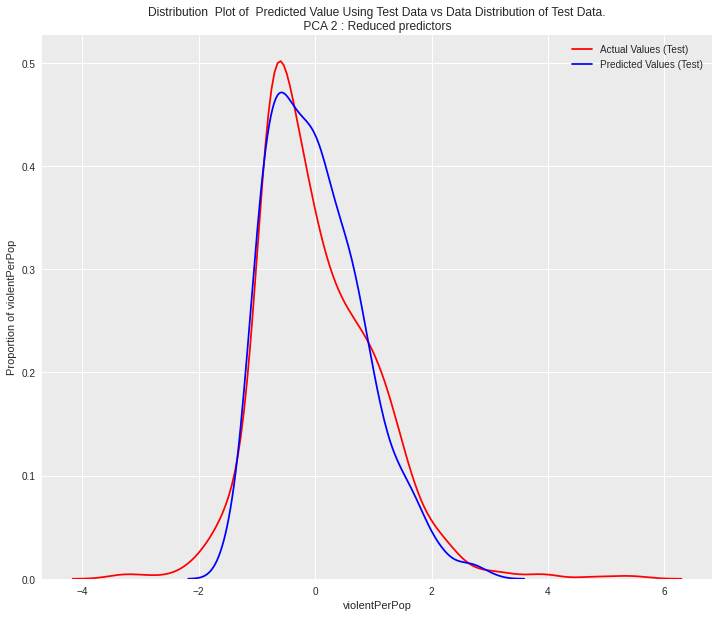

In [ ]:
Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data.\n PCA 2 : Reduced predictors "
DistributionPlot(y_test,y_hat_pca3,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
mean_squared_error(y_test,y_hat_pca3), mean_squared_error(y_train,pca.predict(x_train))

(0.4085089447626822, 0.3649007568283878)

In [ ]:
pca_selected = make_pipeline( PCA(20), LinearRegression())
pca_selected.fit(x_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=20)),
                ('linearregression', LinearRegression())])

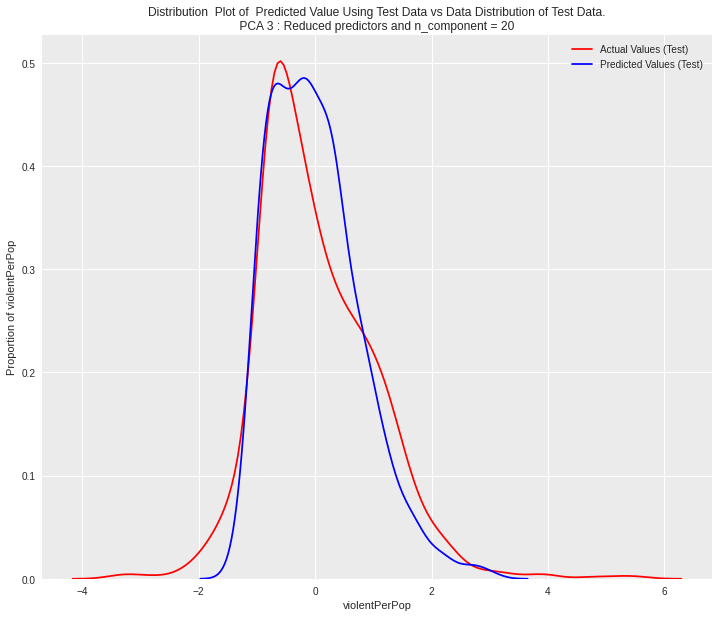

In [ ]:
y_hat_pca_selected = pca_selected.predict(x_test)

Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data.\n PCA 3 : \
Reduced predictors and n_component = 20 "
DistributionPlot(y_test,y_hat_pca_selected,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
Metrics( pca, 'Pricipal Component Regression (n_components= max [i.e 66 ]) on Reduced Data')
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression',
  'Polynomial Regression (n = 2) ',
  ' Ridge Regression (alpha = 200) ',
  ' Lasso Regression (alpha = 0.040404)',
  'Pricipal Component Regression (n_components= max [i.e 66 ]) on Reduced Data'],
 [0.6340110166264732,
  1.0,
  0.6086161970147277,
  0.5824285447489119,
  0.6340110166264732],
 [0.591363969417114,
  -5.843126941662309,
  0.6227587018530487,
  0.6142142470946172,
  0.5913639694171139],
 [0.36490075682838785,
  1.9165293451099473e-27,
  0.3902200678372355,
  0.41632985410258366,
  0.3649007568283878],
 [0.4085089447626821,
  6.840998728937405,
  0.37712397608966375,
  0.3856657735223581,
  0.4085089447626822])

In [ ]:
Metrics( pca_selected, 'Pricipal Component Regression (n_components=20) on Reduced Data')
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression',
  'Polynomial Regression (n = 2) ',
  ' Ridge Regression (alpha = 200) ',
  ' Lasso Regression (alpha = 0.040404)',
  'Pricipal Component Regression (n_components= max [i.e 66 ]) on Reduced Data',
  'Pricipal Component Regression (n_components=20) on Reduced Data'],
 [0.6340110166264732,
  1.0,
  0.6086161970147277,
  0.5824285447489119,
  0.6340110166264732,
  0.5934869194038737],
 [0.591363969417114,
  -5.843126941662309,
  0.6227587018530487,
  0.6142142470946172,
  0.5913639694171139,
  0.621907550504091],
 [0.36490075682838785,
  1.9165293451099473e-27,
  0.3902200678372355,
  0.41632985410258366,
  0.3649007568283878,
  0.40530436026478384],
 [0.4085089447626821,
  6.840998728937405,
  0.37712397608966375,
  0.3856657735223581,
  0.4085089447626822,
  0.3779748627305213])

In [ ]:
# pca_fulldata = make_pipeline( PCA(), LinearRegression())
pca_fulldata = make_pipeline(StandardScaler(), PCA(n_components=80), LinearRegression())

In [ ]:
pca_fulldata.fit(xs_training, ys_training)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=80)),
                ('linearregression', LinearRegression())])

In [ ]:
pca_fulldata.score(xs_training, ys_training), pca_fulldata.score(xs_test, ys_test)

(0.6695197719137588, 0.5565717189923733)

In [ ]:
n_comp = np.arange(1,103)
n_comp

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102])

In [ ]:
training_score = []
testing_score = []

In [ ]:
for i in tqdm(n_comp):
  pca_fulldata = make_pipeline(StandardScaler(), PCA(n_components=i), LinearRegression())
  pca_fulldata.fit(xs_training, ys_training)
  trs = pca_fulldata.score(xs_training, ys_training)
  tss = pca_fulldata.score(xs_test, ys_test)
  training_score.append(trs)
  testing_score.append(tss)

  0%|          | 0/102 [00:00<?, ?it/s]

In [ ]:
PCA_entireData = pd.DataFrame(zip(n_comp, training_score, testing_score),
               columns =['Number of Components', 'training_score', 'testing_score'])
PCA_entireData

Number of Components  training_score  testing_score
0                       1        0.372700   3.324825e-01
1                       2        0.455851   4.031233e-01
2                       3        0.483312   4.434354e-01
3                       4        0.522658   4.923890e-01
4                       5        0.523033   4.936643e-01
..                    ...             ...            ...
97                     98        0.685232   5.376902e-01
98                     99        0.685240   5.380330e-01
99                    100        0.685645   5.388319e-01
100                   101        0.685617  -2.009016e+21
101                   102        0.685543  -1.133157e+21

[102 rows x 3 columns]

In [ ]:
PCA_entireData.sort_values(by = 'testing_score', ascending = False ).head(20)

Number of Components  training_score  testing_score
33                    34        0.634017       0.587572
32                    33        0.634113       0.587500
27                    28        0.630188       0.587149
29                    30        0.631725       0.587143
28                    29        0.630698       0.587025
25                    26        0.629689       0.586664
31                    32        0.632661       0.586330
36                    37        0.638793       0.586259
30                    31        0.632199       0.585996
37                    38        0.638841       0.585794
34                    35        0.634186       0.585666
39                    40        0.639055       0.585386
38                    39        0.638909       0.585170
26                    27        0.629977       0.584475
35                    36        0.634410       0.584391
23                    24        0.628634       0.583923
24                    25        0.628775       0.583753
41                    42        0.641412       0.580747
40                    41        0.641084       0.580465
22                    23        0.624061       0.579209

In [ ]:
pca_fulldata = make_pipeline(StandardScaler(), PCA(n_components=30), LinearRegression())
pca_fulldata.fit(xs_training, ys_training)



Metrics( pca_fulldata, 'Pricipal Component Regression (n_components= 30) on Full Training Data',\
        x_test = xs_test, x_train = xs_training, y_test = ys_test, y_train = ys_training)
model, R_2_training, R_2_testing, MSE_training, MSE_testing

(['Multivariate Linear Regression',
  'Polynomial Regression (n = 2) ',
  ' Ridge Regression (alpha = 200) ',
  ' Lasso Regression (alpha = 0.040404)',
  'Pricipal Component Regression (n_components= max [i.e 66 ]) on Reduced Data',
  'Pricipal Component Regression (n_components=20) on Reduced Data',
  'Pricipal Component Regression (n_components= 30) on Full Training Data'],
 [0.6340110166264732,
  1.0,
  0.6086161970147277,
  0.5824285447489119,
  0.6340110166264732,
  0.5934869194038737,
  0.6315115315158173],
 [0.591363969417114,
  -5.843126941662309,
  0.6227587018530487,
  0.6142142470946172,
  0.5913639694171139,
  0.621907550504091,
  0.5874497253402804],
 [0.36490075682838785,
  1.9165293451099473e-27,
  0.3902200678372355,
  0.41632985410258366,
  0.3649007568283878,
  0.40530436026478384,
  0.3681009937539155],
 [0.4085089447626821,
  6.840998728937405,
  0.37712397608966375,
  0.3856657735223581,
  0.4085089447626822,
  0.3779748627305213,
  0.41211646785145484])

In [ ]:
model

['Multivariate Linear Regression',
 'Polynomial Regression (n = 2) ',
 ' Ridge Regression (alpha = 200) ',
 ' Lasso Regression (alpha = 0.040404)',
 'Pricipal Component Regression (n_components= max [i.e 66 ]) on Reduced Data',
 'Pricipal Component Regression (n_components=20) on Reduced Data',
 'Pricipal Component Regression (n_components= 30) on Full Training Data']

In [ ]:
# dicta_ = { 'Xvariable' : data_update.columns[:-1] , 'pearson_coefs' : pearson_coefs, 'p_values' : p_values }

# = pd.DataFrame(dict_a)
model, R_2_training, R_2_testing, MSE_training, MSE_testing

In [ ]:
Metrics = pd.DataFrame(list(zip(model, R_2_training, R_2_testing, MSE_training, MSE_testing)), columns =['model', 'R_2_training', 'R_2_testing', 'MSE_training', 'MSE_testing'])
# pd.DataFrame(model,R_2_training, columns = ['model', 'R_2_training'] )
Metrics

model  R_2_training  \
0                     Multivariate Linear Regression      0.634011   
1                     Polynomial Regression (n = 2)       1.000000   
2                    Ridge Regression (alpha = 200)       0.608616   
3                Lasso Regression (alpha = 0.040404)      0.582429   
4  Pricipal Component Regression (n_components= m...      0.634011   
5  Pricipal Component Regression (n_components=20...      0.593487   
6  Pricipal Component Regression (n_components= 3...      0.631512   

   R_2_testing  MSE_training  MSE_testing  
0     0.591364  3.649008e-01     0.408509  
1    -5.843127  1.916529e-27     6.840999  
2     0.622759  3.902201e-01     0.377124  
3     0.614214  4.163299e-01     0.385666  
4     0.591364  3.649008e-01     0.408509  
5     0.621908  4.053044e-01     0.377975  
6     0.587450  3.681010e-01     0.412116

In [ ]:
Metrics.sort_values(by = 'R_2_testing', ascending =False, inplace = True)


In [ ]:
Metrics.reset_index(drop = True, inplace = True)

In [ ]:
Metrics = Metrics.round(decimals = 4)
Metrics

model  R_2_training  \
0                    Ridge Regression (alpha = 200)         0.6086   
1  Pricipal Component Regression (n_components=20...        0.5935   
2                Lasso Regression (alpha = 0.040404)        0.5824   
3                     Multivariate Linear Regression        0.6340   
4  Pricipal Component Regression (n_components= m...        0.6340   
5  Pricipal Component Regression (n_components= 3...        0.6315   
6                     Polynomial Regression (n = 2)         1.0000   

   R_2_testing  MSE_training  MSE_testing  
0       0.6228        0.3902       0.3771  
1       0.6219        0.4053       0.3780  
2       0.6142        0.4163       0.3857  
3       0.5914        0.3649       0.4085  
4       0.5914        0.3649       0.4085  
5       0.5874        0.3681       0.4121  
6      -5.8431        0.0000       6.8410

In [ ]:
Metrics.to_csv("Metrics.csv")

NameError: ignored

In [ ]:
# explained = pca_fulldata[0].explained_variance_ratio_
# cumulative_explained = explained.cumsum()
# # np.cumsum(np.round(explained, decimals=4)*100)
# cumulative_explained

In [ ]:
# plt.figure(figsize=(15,7.5))
# plt.plot(range(0, 66), explained, label='Explained Variance')
# plt.plot(range(0, 66), cumulative_explained, label='Cumulative Explained Variance')
# plt.xlabel('Principal Components')
# plt.vlines(x=25, ymin= -0.1, ymax=1.1, colors= 'k', label = "25th Component")
# plt.hlines(y=0.90, xmin=-0.2, xmax=65, colors= 'g', linestyles='--', label = "90% Explained")
# plt.title('Explained Variance Ratio')
# plt.legend()
# plt.show()

In [ ]:
# cumulative_explained[12]

In [ ]:
# *About 90% of the variance is explained by the first 12 components*

In [ ]:
# pca[0].get_params()

In [ ]:
# weights = pca[0].components_
# weights.shape

In [ ]:
# first_component = weights[0]
# vals = np.abs(first_component)

In [ ]:
# first_component

In [ ]:
# np.where(vals>0.1)

In [ ]:
# x_train.columns[[2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21,
#         22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 42, 43, 44, 46, 47, 48, 49,
#         52, 53, 54, 55, 56, 57, 58, 59, 60, 61]]

In [ ]:
# len(np.where(vals>0.1)[0])

In [ ]:
# twelveth_component = weights[11]
# vals12 = np.abs(twelveth_component)

In [ ]:
# twelveth_component

In [ ]:
# np.where(vals12 > 0.1)

In [ ]:
# len(np.where(vals12>0.1)[0])

In [ ]:
# x_train.columns[[0,  2,  3,  4,  9, 11, 13, 16, 19, 23, 25, 26, 27, 33, 44, 46, 51,
#         52, 54, 56, 57, 58, 61, 65]]

In [ ]:
# y_hat_pca3 = pca.predict(x_test)

In [ ]:
# Title="Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data.\n PCA 2 : Reduced predictors "
# DistributionPlot(y_test,y_hat_pca3,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
# mean_squared_error(y_test,y_hat_pca3), mean_squared_error(y_train,pca.predict(x_train))

# Exercise 2

## Part (a): $\rho = 0.95$  

In [ ]:
import random

In [ ]:
corr1 = pd.read_excel("./matrix_correlation.xlsx", header=None)
corr2 = pd.read_excel("./matrix_correlation.xlsx", header=None, sheet_name = 'Sheet2')
corr1

0         1         2         3         4         5         6   \
0   1.000000  0.950000  0.902500  0.857375  0.814506  0.773781  0.735092   
1   0.950000  1.000000  0.950000  0.902500  0.857375  0.814506  0.773781   
2   0.902500  0.950000  1.000000  0.950000  0.902500  0.857375  0.814506   
3   0.857375  0.902500  0.950000  1.000000  0.950000  0.902500  0.857375   
4   0.814506  0.857375  0.902500  0.950000  1.000000  0.950000  0.902500   
5   0.773781  0.814506  0.857375  0.902500  0.950000  1.000000  0.950000   
6   0.735092  0.773781  0.814506  0.857375  0.902500  0.950000  1.000000   
7   0.698337  0.735092  0.773781  0.814506  0.857375  0.902500  0.950000   
8   0.663420  0.698337  0.735092  0.773781  0.814506  0.857375  0.902500   
9   0.630249  0.663420  0.698337  0.735092  0.773781  0.814506  0.857375   
10  0.598737  0.630249  0.663420  0.698337  0.735092  0.773781  0.814506   
11  0.568800  0.598737  0.630249  0.663420  0.698337  0.735092  0.773781   
12  0.540360  0.568800  0.598737  0.630249  0.663420  0.698337  0.735092   
13  0.513342  0.540360  0.568800  0.598737  0.630249  0.663420  0.698337   
14  0.487675  0.513342  0.540360  0.568800  0.598737  0.630249  0.663420   
15  0.463291  0.487675  0.513342  0.540360  0.568800  0.598737  0.630249   
16  0.440127  0.463291  0.487675  0.513342  0.540360  0.568800  0.598737   
17  0.418120  0.440127  0.463291  0.487675  0.513342  0.540360  0.568800   
18  0.397214  0.418120  0.440127  0.463291  0.487675  0.513342  0.540360   
19  0.377354  0.397214  0.418120  0.440127  0.463291  0.487675  0.513342   

          7         8         9         10        11        12        13  \
0   0.698337  0.663420  0.630249  0.598737  0.568800  0.540360  0.513342   
1   0.735092  0.698337  0.663420  0.630249  0.598737  0.568800  0.540360   
2   0.773781  0.735092  0.698337  0.663420  0.630249  0.598737  0.568800   
3   0.814506  0.773781  0.735092  0.698337  0.663420  0.630249  0.598737   
4   0.857375  0.814506  0.773781  0.735092  0.698337  0.663420  0.630249   
5   0.902500  0.857375  0.814506  0.773781  0.735092  0.698337  0.663420   
6   0.950000  0.902500  0.857375  0.814506  0.773781  0.735092  0.698337   
7   1.000000  0.950000  0.902500  0.857375  0.814506  0.773781  0.735092   
8   0.950000  1.000000  0.950000  0.902500  0.857375  0.814506  0.773781   
9   0.902500  0.950000  1.000000  0.950000  0.902500  0.857375  0.814506   
10  0.857375  0.902500  0.950000  1.000000  0.950000  0.902500  0.857375   
11  0.814506  0.857375  0.902500  0.950000  1.000000  0.950000  0.902500   
12  0.773781  0.814506  0.857375  0.902500  0.950000  1.000000  0.950000   
13  0.735092  0.773781  0.814506  0.857375  0.902500  0.950000  1.000000   
14  0.698337  0.735092  0.773781  0.814506  0.857375  0.902500  0.950000   
15  0.663420  0.698337  0.735092  0.773781  0.814506  0.857375  0.902500   
16  0.630249  0.663420  0.698337  0.735092  0.773781  0.814506  0.857375   
17  0.598737  0.630249  0.663420  0.698337  0.735092  0.773781  0.814506   
18  0.568800  0.598737  0.630249  0.663420  0.698337  0.735092  0.773781   
19  0.540360  0.568800  0.598737  0.630249  0.663420  0.698337  0.735092   

          14        15        16        17        18        19  
0   0.487675  0.463291  0.440127  0.418120  0.397214  0.377354  
1   0.513342  0.487675  0.463291  0.440127  0.418120  0.397214  
2   0.540360  0.513342  0.487675  0.463291  0.440127  0.418120  
3   0.568800  0.540360  0.513342  0.487675  0.463291  0.440127  
4   0.598737  0.568800  0.540360  0.513342  0.487675  0.463291  
5   0.630249  0.598737  0.568800  0.540360  0.513342  0.487675  
6   0.663420  0.630249  0.598737  0.568800  0.540360  0.513342  
7   0.698337  0.663420  0.630249  0.598737  0.568800  0.540360  
8   0.735092  0.698337  0.663420  0.630249  0.598737  0.568800  
9   0.773781  0.735092  0.698337  0.663420  0.630249  0.598737  
10  0.814506  0.773781  0.735092  0.698337  0.663420  0.630249  
11  0.857375  0.814506  0.773781  0.

In [ ]:
corr2

0         1         2         3         4         5         6   \
0   1.000000  0.500000  0.250000  0.125000  0.062500  0.031250  0.015625   
1   0.500000  1.000000  0.500000  0.250000  0.125000  0.062500  0.031250   
2   0.250000  0.500000  1.000000  0.500000  0.250000  0.125000  0.062500   
3   0.125000  0.250000  0.500000  1.000000  0.500000  0.250000  0.125000   
4   0.062500  0.125000  0.250000  0.500000  1.000000  0.500000  0.250000   
5   0.031250  0.062500  0.125000  0.250000  0.500000  1.000000  0.500000   
6   0.015625  0.031250  0.062500  0.125000  0.250000  0.500000  1.000000   
7   0.007812  0.015625  0.031250  0.062500  0.125000  0.250000  0.500000   
8   0.003906  0.007812  0.015625  0.031250  0.062500  0.125000  0.250000   
9   0.001953  0.003906  0.007812  0.015625  0.031250  0.062500  0.125000   
10  0.000977  0.001953  0.003906  0.007812  0.015625  0.031250  0.062500   
11  0.000488  0.000977  0.001953  0.003906  0.007812  0.015625  0.031250   
12  0.000244  0.000488  0.000977  0.001953  0.003906  0.007812  0.015625   
13  0.000122  0.000244  0.000488  0.000977  0.001953  0.003906  0.007812   
14  0.000061  0.000122  0.000244  0.000488  0.000977  0.001953  0.003906   
15  0.000031  0.000061  0.000122  0.000244  0.000488  0.000977  0.001953   
16  0.000015  0.000031  0.000061  0.000122  0.000244  0.000488  0.000977   
17  0.000008  0.000015  0.000031  0.000061  0.000122  0.000244  0.000488   
18  0.000004  0.000008  0.000015  0.000031  0.000061  0.000122  0.000244   
19  0.000002  0.000004  0.000008  0.000015  0.000031  0.000061  0.000122   

          7         8         9         10        11        12        13  \
0   0.007812  0.003906  0.001953  0.000977  0.000488  0.000244  0.000122   
1   0.015625  0.007812  0.003906  0.001953  0.000977  0.000488  0.000244   
2   0.031250  0.015625  0.007812  0.003906  0.001953  0.000977  0.000488   
3   0.062500  0.031250  0.015625  0.007812  0.003906  0.001953  0.000977   
4   0.125000  0.062500  0.031250  0.015625  0.007812  0.003906  0.001953   
5   0.250000  0.125000  0.062500  0.031250  0.015625  0.007812  0.003906   
6   0.500000  0.250000  0.125000  0.062500  0.031250  0.015625  0.007812   
7   1.000000  0.500000  0.250000  0.125000  0.062500  0.031250  0.015625   
8   0.500000  1.000000  0.500000  0.250000  0.125000  0.062500  0.031250   
9   0.250000  0.500000  1.000000  0.500000  0.250000  0.125000  0.062500   
10  0.125000  0.250000  0.500000  1.000000  0.500000  0.250000  0.125000   
11  0.062500  0.125000  0.250000  0.500000  1.000000  0.500000  0.250000   
12  0.031250  0.062500  0.125000  0.250000  0.500000  1.000000  0.500000   
13  0.015625  0.031250  0.062500  0.125000  0.250000  0.500000  1.000000   
14  0.007812  0.015625  0.031250  0.062500  0.125000  0.250000  0.500000   
15  0.003906  0.007812  0.015625  0.031250  0.062500  0.125000  0.250000   
16  0.001953  0.003906  0.007812  0.015625  0.031250  0.062500  0.125000   
17  0.000977  0.001953  0.003906  0.007812  0.015625  0.031250  0.062500   
18  0.000488  0.000977  0.001953  0.003906  0.007812  0.015625  0.031250   
19  0.000244  0.000488  0.000977  0.001953  0.003906  0.007812  0.015625   

          14        15        16        17        18        19  
0   0.000061  0.000031  0.000015  0.000008  0.000004  0.000002  
1   0.000122  0.000061  0.000031  0.000015  0.000008  0.000004  
2   0.000244  0.000122  0.000061  0.000031  0.000015  0.000008  
3   0.000488  0.000244  0.000122  0.000061  0.000031  0.000015  
4   0.000977  0.000488  0.000244  0.000122  0.000061  0.000031  
5   0.001953  0.000977  0.000488  0.000244  0.000122  0.000061  
6   0.003906  0.001953  0.000977  0.000488  0.000244  0.000122  
7   0.007812  0.003906  0.001953  0.000977  0.000488  0.000244  
8   0.015625  0.007812  0.003906  0.001953  0.000977  0.000488  
9   0.031250  0.015625  0.007812  0.003906  0.001953  0.000977  
10  0.062500  0.031250  0.015625  0.007812  0.003906  0.001953  
11  0.125000  0.062500  0.031250  0.

In [ ]:
corr1 = np.array(corr1)
corr2 = np.array(corr2)

In [ ]:
np.random.seed(0)
random.seed(0)


p, n = 20, 50

beta1 = [3, 1.5, 0.0001, 0.001, 2, 0.01, 0.0001, 0.0001]

beta2 = [3, 1.5, 0., 0., 2, 0., 0., 0.]

b1 = stats.norm.rvs(size = p)

b2 = b1.copy()

sigma_ = 3

rho1 = 0.95

nsim = 200

eps_array  = stats.norm.rvs(size = n)


#Generate 8 random numbers between 1 and 21
randomlist = random.sample(range(1, p), 8)
randomlist

[13, 14, 2, 9, 16, 8, 7, 5]

In [ ]:
b1, b2

(array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574]),
 array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574]))

In [ ]:
index = [j for j in range(8)]
for k,l in zip(randomlist, index):
  b1[k] = beta1[l]
  b2[k] = beta2[l]

In [ ]:
b1, b2

(array([ 1.76405235e+00,  4.00157208e-01,  1.00000000e-04,  2.24089320e+00,
         1.86755799e+00,  1.00000000e-04,  9.50088418e-01,  1.00000000e-04,
         1.00000000e-02,  1.00000000e-03,  1.44043571e-01,  1.45427351e+00,
         7.61037725e-01,  3.00000000e+00,  1.50000000e+00,  3.33674327e-01,
         2.00000000e+00, -2.05158264e-01,  3.13067702e-01, -8.54095739e-01]),
 array([ 1.76405235,  0.40015721,  0.        ,  2.2408932 ,  1.86755799,
         0.        ,  0.95008842,  0.        ,  0.        ,  0.        ,
         0.14404357,  1.45427351,  0.76103773,  3.        ,  1.5       ,
         0.33367433,  2.        , -0.20515826,  0.3130677 , -0.85409574]))

Let $\alpha\_ = \sigma\_ * \epsilon $

In [ ]:
alpha_ = sigma_ * eps_array
alpha_

array([-7.65896945,  1.96085579,  2.5933086 , -2.22649506,  6.80926387,
       -4.36309702,  0.13727555, -0.56155155,  4.59833764,  4.40807631,
        0.46484228,  1.13448756, -2.66335724, -5.9423894 , -1.04373645,
        0.46904691,  3.69087204,  3.60713955, -1.16198045, -0.90690825,
       -3.1456589 , -4.26005381, -5.11881057,  5.85232619, -1.52895655,
       -1.3142229 , -3.75838608,  2.33247107, -4.84169354, -0.63822084,
       -2.68639968,  1.16070749, -1.53241541, -3.54189655, -0.08454669,
        1.28499561,  0.19955167,  0.90741569, -1.90296628, -1.0882235 ,
       -2.01738134, -1.07865948, -2.43943885, -5.17884781,  0.53227843,
       -1.20534281, -4.89059504,  1.38834677, -2.72189509,  0.15583619])

In [ ]:
import scipy.stats as stats
linalg = np.linalg
np.random.seed(0)

num_samples = 20
num_variables = 50

cov1 = corr1
cov2 = corr2

L1 = linalg.cholesky(cov1)
L2 = linalg.cholesky(cov2)


for i in range(1, 201):
    uncorrelated1 = np.random.standard_normal((num_samples,num_variables))
    correlated1 = np.dot(L1, uncorrelated1)

    uncorrelated2 = np.random.standard_normal((num_samples,num_variables))
    correlated2 = np.dot(L2, uncorrelated2)

correlated1 = correlated1.T
correlated2 = correlated2.T

xs = list(range(1,21))

x_label = []
for i in xs:

  x_label.append(str('x') + str(i))

In [ ]:
exercise_2_X1 = pd.DataFrame(correlated1, columns = x_label)
exercise_2_X2 = pd.DataFrame(correlated2, columns = x_label)

exercise_2_X1

x1        x2        x3        x4        x5        x6        x7  \
0   1.680030  1.304956  1.687778  1.095747  1.249889  1.777077  1.509640   
1   0.394216  0.632197  0.985768  0.759790  0.380688 -0.116538  0.263767   
2  -1.802137 -1.572715 -1.833418 -1.359204 -0.965035 -0.738306 -0.881058   
3  -1.704374 -1.948956 -1.507632 -1.209344 -1.622918 -1.187094 -1.066326   
4   2.161943  1.946486  1.677334  1.678173  1.680505  1.957957  1.670001   
5  -0.510113 -0.058493  0.009746  0.221086  0.456716  0.224192  0.373558   
6  -0.232017 -0.006480 -0.085957 -0.138761 -0.419491 -0.490013 -0.882104   
7  -0.968406 -0.847732 -0.766999 -0.854510 -0.572585 -1.125528 -1.328292   
8  -0.098314 -0.018054  0.357528  0.148876  0.906480  0.998369  0.956935   
9  -0.487543 -0.716121 -0.126645 -0.589840 -1.040990 -1.065597 -1.333695   
10 -0.494951 -0.386616 -0.273081 -0.853737 -0.809622 -1.123541 -0.732366   
11 -0.355352 -0.273542 -0.478504 -0.098854  0.431987  1.009151  0.343271   
12 -1.841584 -2.128654 -1.731595 -2.200518 -1.629391 -1.358665 -1.796719   
13 -1.535351 -1.081499 -1.304065 -1.536013 -1.408498 -1.563381 -1.753307   
14 -1.394422 -0.975873 -0.580502 -0.642756 -0.559075 -1.328603 -1.761514   
15  0.961704  1.103458  1.381552  0.618560 -0.165555 -0.314787 -0.404045   
16 -0.043392 -0.357311  0.107861  0.154837 -0.069506 -0.059853  0.172036   
17  0.468728 -0.054866 -0.380977 -0.693788 -0.551531 -0.300484 -0.010816   
18 -0.905183 -1.073618 -0.644717 -0.489443 -0.206320  0.202826 -0.230353   
19 -0.392902 -0.340531 -0.462823  0.022355 -0.029242 -0.439630 -0.566568   
20  1.330019  0.797383  0.752166  0.882438  0.783828  0.563142  0.181952   
21  0.360013  0.080801  0.592101  1.174995  1.007860  1.157254  0.923583   
22 -1.305097 -0.836645 -0.701954 -0.716431 -0.632577 -0.223482 -0.485277   
23  0.138187 -0.006836 -0.209861 -0.506471 -0.087027 -0.212485 -0.792666   
24 -1.672288 -1.952286 -1.841385 -1.924000 -1.762843 -0.857248 -0.670269   
25 -0.540620 -0.525042  0.062892 -0.155232 -0.494305 -0.206798 -0.816217   
26 -1.644673 -1.431531 -1.307905 -1.140101 -1.139776 -1.478116 -1.208645   
27 -0.888563 -0.724643 -0.983900 -0.861820 -1.065742 -1.204625 -1.684707   
28  1.821066  1.809913  2.319942  2.188761  2.104320  1.489115  1.246796   
29 -0.089699  0.451457  0.820165  0.881378  1.166163  0.679404  0.278423   
30  1.010824  1.072697  1.447286  1.613597  1.367032  1.396009  1.367137   
31 -0.178196  0.114756  0.030287 -0.159460 -0.324274  0.424041  0.407624   
32 -1.801021 -1.681505 -1.428070 -2.135412 -2.200546 -1.793451 -1.358842   
33 -0.214738  0.233450  0.087373 -0.200989  0.204412  0.138393 -0.241480   
34  0.473739  1.101964  0.292866  0.012401 -0.079618 -0.165994 -0.550253   
35 -0.328949  0.393741  0.009825 -0.314890 -0.344195 -0.089925 -0.267754   
36  0.509315  0.995142  0.922932  1.735584  1.177216  0.971049  0.531816   
37 -1.181196 -0.849909  0.047834 -0.157606 -0.085709 -0.157088  0.487136   
38 -0.635878 -0.189950 -0.104539  0.121325 -0.277882  0.061750  0.388387   
39  0.976795  0.992131  0.890905  0.666559  0.288371  0.248463 -0.213733   
40 -0.466192 -0.399129 -0.484363  0.076406  0.153448 -0.245336 -0.693840   
41  0.401536  0.193002 -0.148752  0.317562  0.390977  0.153705  0.235058   
42  0.708230  0.128397  0.446232  0.214251  0.124841  0.687188  1.156943   
43  2.364608  2.549885  2.509572  3.014161  3.057987  3.116223  2.866401   
44  1.104104  1.165718  1.594367  1.405776  1.846744  1.558485  1.724934   
45 -0.098017 -0.299998 -0.223974  0.061127 -0.252029 -0.231394 -0.337066   
46 -1.082277 -0.804856 -1.414990 -1.533628 -1.398387 -1.340472 -1.500437   
47 -0.795905 -0.506964  0.208063  0.017989  0.059775 -0.144848  0.060706   
48 -0.666216 -1.502751 -0.768400 -0.193205  0.118117  0.834183  0.721383   
49 -0.799557 -0.968348 -1.275984 -1.276521 -1.452558 -1.984908 -2.481603   

          x8        x9       x10       x11       x12       x13       x14  \
0   1.534429  1.603401  1.333471  1.205341  0.839004  0.8

In [ ]:
correlated1.shape, correlated2.shape, b1.shape, b2.shape, alpha_.shape

((50, 20), (50, 20), (20,), (20,), (50,))

In [ ]:
k = np.matmul(correlated1, b1.T) + alpha_.T
k, k.shape

(array([  8.21369801,  -1.59620139, -16.24588452, -15.82495723,
         41.54084802, -12.39331937,  -2.58358431, -24.37669134,
          9.75447991, -24.07917526, -11.60001688,   6.71623215,
        -39.72001365, -27.66417406, -14.31248357,   0.71037182,
          9.04187604,   8.0454918 , -10.36610812, -11.40732224,
          2.55745364,  21.74973914,  -9.99989231,   9.32222214,
        -17.30232636,  -9.32871844, -32.06960618, -14.82550438,
         20.99392454,   2.68816663,  12.64863862,   5.68516894,
        -20.9852569 ,  -8.98915847,  -8.20403361,  -0.57228199,
          9.52525683,  -2.52163495,  -2.05945438,  -8.78981526,
         -1.20185262,  10.41332759,   6.75340785,  25.31727073,
         27.12716527,   3.28809073, -14.96053252,   0.41211958,
          0.22451356, -24.91542837]), (50,))

In [ ]:
k2 = np.matmul(correlated1, b1) + alpha_
k2, k2.shape

(array([  8.21369801,  -1.59620139, -16.24588452, -15.82495723,
         41.54084802, -12.39331937,  -2.58358431, -24.37669134,
          9.75447991, -24.07917526, -11.60001688,   6.71623215,
        -39.72001365, -27.66417406, -14.31248357,   0.71037182,
          9.04187604,   8.0454918 , -10.36610812, -11.40732224,
          2.55745364,  21.74973914,  -9.99989231,   9.32222214,
        -17.30232636,  -9.32871844, -32.06960618, -14.82550438,
         20.99392454,   2.68816663,  12.64863862,   5.68516894,
        -20.9852569 ,  -8.98915847,  -8.20403361,  -0.57228199,
          9.52525683,  -2.52163495,  -2.05945438,  -8.78981526,
         -1.20185262,  10.41332759,   6.75340785,  25.31727073,
         27.12716527,   3.28809073, -14.96053252,   0.41211958,
          0.22451356, -24.91542837]), (50,))

In [ ]:
k == k2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
# xx = np.array([[1,3,2],[4,5,6],[7,8,9]])
# # bb = np.array([[0.4,0.5,0.6]])
# bb = np.array([0.4,0.5,0.6])
# alph = np.array([10,11,12])

# xx.shape, bb.shape, alph.shape
# np.matmul(xx, bb) + alph

In [ ]:
exercise_2_X1['y'] = np.matmul(correlated1, b1) + alpha_
exercise_2_X1

x1        x2        x3        x4        x5        x6        x7  \
0   1.680030  1.304956  1.687778  1.095747  1.249889  1.777077  1.509640   
1   0.394216  0.632197  0.985768  0.759790  0.380688 -0.116538  0.263767   
2  -1.802137 -1.572715 -1.833418 -1.359204 -0.965035 -0.738306 -0.881058   
3  -1.704374 -1.948956 -1.507632 -1.209344 -1.622918 -1.187094 -1.066326   
4   2.161943  1.946486  1.677334  1.678173  1.680505  1.957957  1.670001   
5  -0.510113 -0.058493  0.009746  0.221086  0.456716  0.224192  0.373558   
6  -0.232017 -0.006480 -0.085957 -0.138761 -0.419491 -0.490013 -0.882104   
7  -0.968406 -0.847732 -0.766999 -0.854510 -0.572585 -1.125528 -1.328292   
8  -0.098314 -0.018054  0.357528  0.148876  0.906480  0.998369  0.956935   
9  -0.487543 -0.716121 -0.126645 -0.589840 -1.040990 -1.065597 -1.333695   
10 -0.494951 -0.386616 -0.273081 -0.853737 -0.809622 -1.123541 -0.732366   
11 -0.355352 -0.273542 -0.478504 -0.098854  0.431987  1.009151  0.343271   
12 -1.841584 -2.128654 -1.731595 -2.200518 -1.629391 -1.358665 -1.796719   
13 -1.535351 -1.081499 -1.304065 -1.536013 -1.408498 -1.563381 -1.753307   
14 -1.394422 -0.975873 -0.580502 -0.642756 -0.559075 -1.328603 -1.761514   
15  0.961704  1.103458  1.381552  0.618560 -0.165555 -0.314787 -0.404045   
16 -0.043392 -0.357311  0.107861  0.154837 -0.069506 -0.059853  0.172036   
17  0.468728 -0.054866 -0.380977 -0.693788 -0.551531 -0.300484 -0.010816   
18 -0.905183 -1.073618 -0.644717 -0.489443 -0.206320  0.202826 -0.230353   
19 -0.392902 -0.340531 -0.462823  0.022355 -0.029242 -0.439630 -0.566568   
20  1.330019  0.797383  0.752166  0.882438  0.783828  0.563142  0.181952   
21  0.360013  0.080801  0.592101  1.174995  1.007860  1.157254  0.923583   
22 -1.305097 -0.836645 -0.701954 -0.716431 -0.632577 -0.223482 -0.485277   
23  0.138187 -0.006836 -0.209861 -0.506471 -0.087027 -0.212485 -0.792666   
24 -1.672288 -1.952286 -1.841385 -1.924000 -1.762843 -0.857248 -0.670269   
25 -0.540620 -0.525042  0.062892 -0.155232 -0.494305 -0.206798 -0.816217   
26 -1.644673 -1.431531 -1.307905 -1.140101 -1.139776 -1.478116 -1.208645   
27 -0.888563 -0.724643 -0.983900 -0.861820 -1.065742 -1.204625 -1.684707   
28  1.821066  1.809913  2.319942  2.188761  2.104320  1.489115  1.246796   
29 -0.089699  0.451457  0.820165  0.881378  1.166163  0.679404  0.278423   
30  1.010824  1.072697  1.447286  1.613597  1.367032  1.396009  1.367137   
31 -0.178196  0.114756  0.030287 -0.159460 -0.324274  0.424041  0.407624   
32 -1.801021 -1.681505 -1.428070 -2.135412 -2.200546 -1.793451 -1.358842   
33 -0.214738  0.233450  0.087373 -0.200989  0.204412  0.138393 -0.241480   
34  0.473739  1.101964  0.292866  0.012401 -0.079618 -0.165994 -0.550253   
35 -0.328949  0.393741  0.009825 -0.314890 -0.344195 -0.089925 -0.267754   
36  0.509315  0.995142  0.922932  1.735584  1.177216  0.971049  0.531816   
37 -1.181196 -0.849909  0.047834 -0.157606 -0.085709 -0.157088  0.487136   
38 -0.635878 -0.189950 -0.104539  0.121325 -0.277882  0.061750  0.388387   
39  0.976795  0.992131  0.890905  0.666559  0.288371  0.248463 -0.213733   
40 -0.466192 -0.399129 -0.484363  0.076406  0.153448 -0.245336 -0.693840   
41  0.401536  0.193002 -0.148752  0.317562  0.390977  0.153705  0.235058   
42  0.708230  0.128397  0.446232  0.214251  0.124841  0.687188  1.156943   
43  2.364608  2.549885  2.509572  3.014161  3.057987  3.116223  2.866401   
44  1.104104  1.165718  1.594367  1.405776  1.846744  1.558485  1.724934   
45 -0.098017 -0.299998 -0.223974  0.061127 -0.252029 -0.231394 -0.337066   
46 -1.082277 -0.804856 -1.414990 -1.533628 -1.398387 -1.340472 -1.500437   
47 -0.795905 -0.506964  0.208063  0.017989  0.059775 -0.144848  0.060706   
48 -0.666216 -1.502751 -0.768400 -0.193205  0.118117  0.834183  0.721383   
49 -0.799557 -0.968348 -1.275984 -1.276521 -1.452558 -1.984908 -2.481603   

          x8        x9       x10  ...       x12       x13       x14       x15  \
0   1.534429  1.603401  1.333471  ...  0.839004  0.8

In [ ]:
exercise_2_X2['y'] = np.matmul(correlated2, b2) + alpha_
exercise_2_X2

x1        x2        x3        x4        x5        x6        x7  \
0  -0.496702 -0.335127 -1.030984  0.015109 -1.223183 -0.379542 -1.051827   
1   1.448677 -0.080505  1.291691  0.731880  0.421096  0.655710  1.208528   
2   0.562778 -1.225673 -1.185049 -0.539076  0.104943  0.245850 -0.368339   
3   0.057605  0.663871  1.105247  1.242309  1.445155  0.081488  1.032105   
4   1.265845  0.682917 -0.162811  0.363948 -0.215739  0.335234  0.140350   
5   0.927966  0.141233  1.478360 -1.221455 -1.610377  0.318056  0.055428   
6  -0.765840 -0.318874  1.386086  1.269709  0.456377  1.331915  0.314597   
7  -2.165515 -0.903052 -0.804211 -0.453370 -0.270689  0.047788 -0.585328   
8   0.489134  0.478979 -1.676072 -1.722940 -1.855702 -0.768728  0.307257   
9  -0.580987 -0.474648  0.832776  0.057820  1.296202  0.688720 -0.099178   
10  1.604279  1.997906  1.460497  0.427975  0.096446 -0.655674 -1.562268   
11  0.670152 -0.576522 -0.367519  1.632724  0.723584 -0.374310 -0.146785   
12  0.988174 -1.133040 -1.756119 -0.834779 -1.171803 -0.137245  0.975398   
13 -0.559687 -0.100046 -1.524794 -0.848188 -0.196424 -0.332213 -1.961256   
14 -0.001773 -0.677656  0.191207  0.032589  0.647502  0.254073  1.155292   
15 -0.017743 -0.470252  0.974693  0.346401  0.540447  1.801435  0.977434   
16  0.084034  0.249502  0.555290 -0.717957 -1.079070 -0.065332  1.185047   
17  0.239855 -0.597205 -0.077483  1.147040  1.654486  0.968762  2.107773   
18 -0.706416 -0.321252 -0.077067 -1.043079 -1.922405 -0.835398  0.491032   
19  1.106046 -0.761551 -0.072834 -0.374983  0.259231  1.812448  2.101137   
20  0.223521 -0.674805  0.529191 -0.099174 -0.550997 -1.241688 -1.454421   
21 -0.787507 -0.306653  0.157645 -0.064135 -0.007021 -0.017838  0.602426   
22  0.353253 -0.180535  0.136959  0.239217 -0.735852  0.772327  0.395060   
23 -1.166419  0.371536  0.259462  0.902255 -0.075896 -0.271332  0.351972   
24 -1.520701 -0.973204 -0.943834 -1.700037  0.030301 -0.956619 -1.225131   
25  0.752000  0.914113  0.109991 -1.472444 -0.735419  0.061389 -0.131666   
26 -1.542471 -0.191710 -0.116749  0.828194  1.299469  1.299848  1.307395   
27  1.681023  1.720719  1.784910  1.458134  2.361210  1.627980  0.021188   
28  0.277870 -0.453598  0.543118  0.439849  0.457950 -0.077219 -0.400574   
29  0.240285  1.681845  0.297379 -2.352116 -0.961418 -0.606572 -0.465303   
30  0.468962 -1.858221 -2.257660 -1.472767 -0.678538  1.678413  1.768780   
31  1.130733 -0.119319  0.295312 -0.959568 -0.695704  0.277478  0.023456   
32 -1.969884 -2.380723 -2.672012 -1.834537 -2.447791 -1.058155 -0.435463   
33 -0.613920 -0.368781 -0.426199  1.036311  1.057485  1.976053 -0.694445   
34  1.236758  0.066151  1.011315 -0.691785 -0.933564 -0.612479  0.627726   
35 -1.079667 -1.059099  0.737753 -0.669069  0.765634 -0.124597 -0.498974   
36 -0.053193 -0.365736 -0.631677  0.729340  0.629496  0.225650 -1.018170   
37 -0.928823  0.458835 -0.299155 -0.570934  1.070681  0.611494 -0.552143   
38 -1.350557 -2.672031 -1.794066 -1.806690  0.420414  0.662611  0.145865   
39 -1.340533 -0.792872  0.675918 -0.742240  0.719555  1.989170  2.788814   
40 -0.031417  1.439994  0.925008  1.453041 -0.108697  1.640269  0.187630   
41  1.425303  0.792452 -0.008978  0.025887  0.551555  0.173659  0.676103   
42 -0.162891  0.264058 -0.978823 -1.430220 -0.810677  0.027505  1.177852   
43  1.361244 -0.117494 -0.074896 -0.033375  1.003566  1.182437  0.583272   
44  0.271227 -1.421489  0.101018 -1.723775 -1.721978 -0.150734 -0.670861   
45  0.336929  1.256880  0.641139  1.035592 -0.541048 -0.254575  0.132057   
46  1.246400 -0.073096  1.158914 -0.717066 -0.206579 -1.653343 -1.365862   
47  2.318571  1.623557 -0.084024 -0.306322 -0.279015 -0.205482  0.130965   
48  1.061186  1.099467 -0.230342  0.913525 -0.331003 -0.372645  1.525026   
49 -0.181955 -0.829391 -0.098173 -1.036667 -0.891585 -0.922001  0.876041   

          x8        x9       x10  ...       x12       x13       x14       x15  \
0  -1.810764 -2.631683  0.152151  ...  0.321212  0.6

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
mod = smf.ols(formula = 'y~x2 ', data=exercise_2_X1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     68.74
Date:                Tue, 10 May 2022   Prob (F-statistic):           8.02e-11
Time:                        15:18:22   Log-Likelihood:                -186.81
No. Observations:                  50   AIC:                             377.6
Df Residuals:                      48   BIC:                             381.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1761      1.480     -0.795      0.4

In [ ]:
x_train_ex_2X1, x_test_ex_2X1, y_train_ex_2X1, y_test_ex_2X1 = train_test_split(exercise_2_X1.iloc[:,:-1], exercise_2_X1.iloc[:,-1:], test_size=0.60, random_state=0)
x_train_ex_2X2, x_test_ex_2X2, y_train_ex_2X2, y_test_ex_2X2 = train_test_split(exercise_2_X2.iloc[:,:-1], exercise_2_X2.iloc[:,-1:], test_size=0.60, random_state=0)

In [ ]:
X = x_train_ex_2X1
y =  y_train_ex_2X1.y
X.shape, y.shape

((20, 20), (20,))

We can perform best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS. We'll define a helper function to outputs the best set of variables for each model size:

In [ ]:
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):
    """This returns a DataFrame containing the best model that we generated, along with some extra information about the model:"""
    tic = time.time()
    
    results = []
    
    for combo in tqdm(itertools.combinations(X.columns, k)):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

Now we want to call that function for each number of predictors  k

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

0it [00:00, ?it/s]

Processed 20 models on 1 predictors in 0.139984130859375 seconds.


0it [00:00, ?it/s]

Processed 190 models on 2 predictors in 0.4591789245605469 seconds.


0it [00:00, ?it/s]

Processed 1140 models on 3 predictors in 2.4678802490234375 seconds.


0it [00:00, ?it/s]

Processed 4845 models on 4 predictors in 10.583253860473633 seconds.


0it [00:00, ?it/s]

Processed 15504 models on 5 predictors in 33.315040588378906 seconds.


0it [00:00, ?it/s]

Processed 38760 models on 6 predictors in 83.53709268569946 seconds.


0it [00:00, ?it/s]

Processed 77520 models on 7 predictors in 167.7167727947235 seconds.
Total elapsed time: 298.97701239585876 seconds.


Now we have one big DataFrame that contains the best models we've generated along with their RSS:

In [ ]:
models_best

RSS                                              model
1  529.999777  <statsmodels.regression.linear_model.Regressio...
2  267.690929  <statsmodels.regression.linear_model.Regressio...
3  173.373505  <statsmodels.regression.linear_model.Regressio...
4  114.684643  <statsmodels.regression.linear_model.Regressio...
5   82.668862  <statsmodels.regression.linear_model.Regressio...
6   48.409850  <statsmodels.regression.linear_model.Regressio...
7   35.546355  <statsmodels.regression.linear_model.Regressio...

In [ ]:
print(models_best.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              260.3
Date:                Tue, 10 May 2022   Prob (F-statistic):                    1.55e-13
Time:                        15:23:21   Log-Likelihood:                         -37.218
No. Observations:                  20   AIC:                                      86.44
Df Residuals:                      14   BIC:                                      92.41
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The best models happen to be the ones that uses a combination of 7 variables or less. If we check the best models that combines 8 variables or more, we have a high likelihood of overfitting. An example is given below for best 12 variable combinations.

In [ ]:
print(getBest(12)["model"].summary())

0it [00:00, ?it/s]

Processed 125970 models on 12 predictors in 279.33799481391907 seconds.
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              527.2
Date:                Tue, 10 May 2022   Prob (F-statistic):                    3.19e-10
Time:                        15:28:01   Log-Likelihood:                         -17.710
No. Observations:                  20   AIC:                                      59.42
Df Residuals:                       8   BIC:                                      71.37
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t     

In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

1    0.897612
2    0.945413
3    0.962566
4    0.973691
5    0.979771
6    0.987308
7    0.989964
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

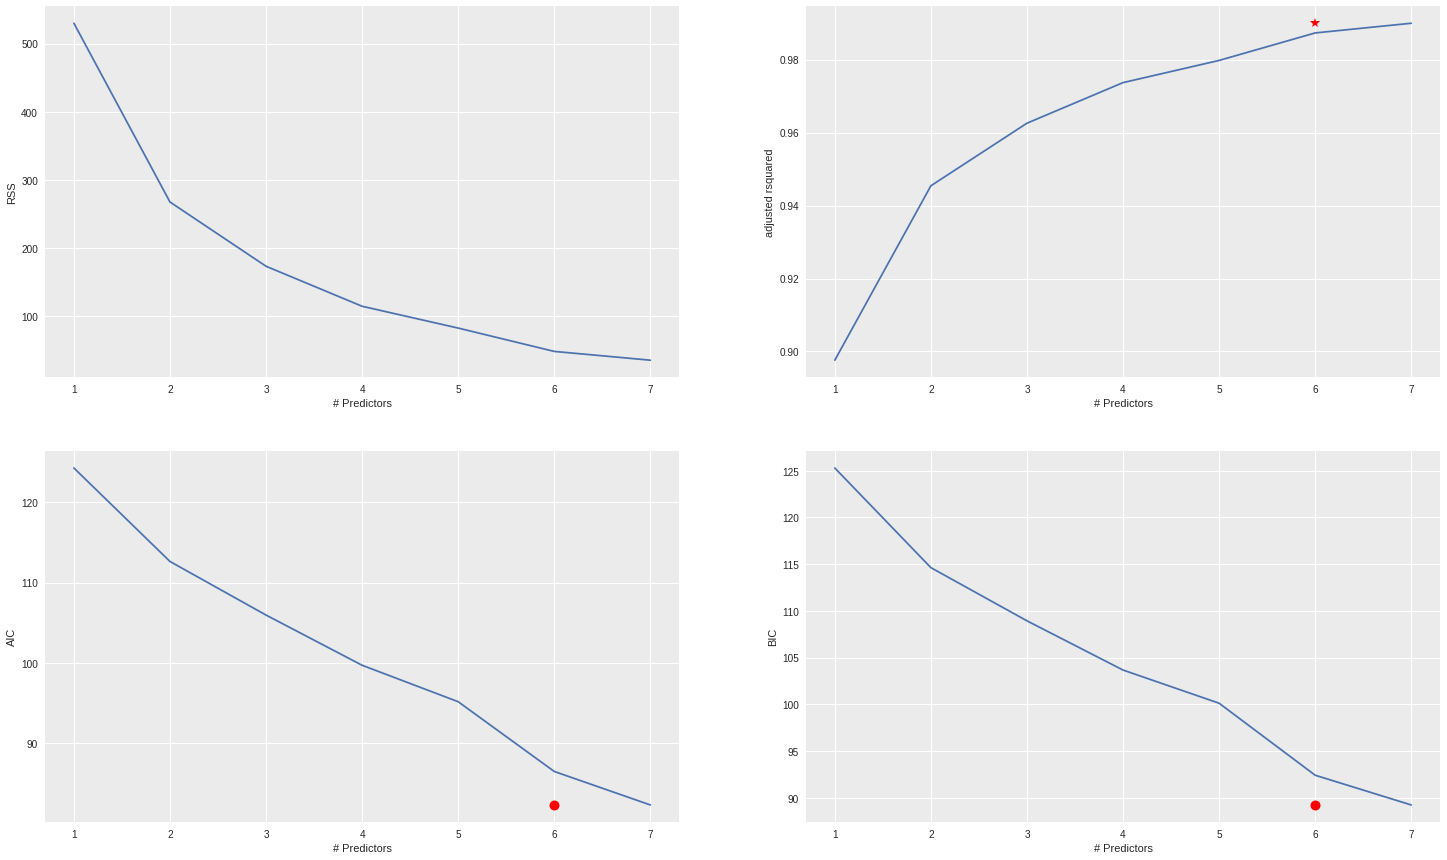

In [ ]:
plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "*r")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
plt.show()

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to BIC, the best performer is the model with 6 variables. According to AIC and adjusted $R^2$ something a bit more complex might be better. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

### Forward Selection

We use a similar approach to perform forward stepwise selection, using a slight modification of the functions we defined above:

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in tqdm(range(1,len(X.columns)//2)):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

  0%|          | 0/9 [00:00<?, ?it/s]

Processed  20 models on 1 predictors in 0.13862133026123047 seconds.
Processed  19 models on 2 predictors in 0.04129457473754883 seconds.
Processed  18 models on 3 predictors in 0.03475356101989746 seconds.
Processed  17 models on 4 predictors in 0.03326249122619629 seconds.
Processed  16 models on 5 predictors in 0.035776376724243164 seconds.
Processed  15 models on 6 predictors in 0.031909942626953125 seconds.
Processed  14 models on 7 predictors in 0.031061887741088867 seconds.
Processed  13 models on 8 predictors in 0.04735732078552246 seconds.
Processed  12 models on 9 predictors in 0.027779579162597656 seconds.
Total elapsed time: 0.5290658473968506 seconds.


In [ ]:
# print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              134.8
Date:                Tue, 10 May 2022   Prob (F-statistic):                    4.74e-12
Time:                        23:53:25   Log-Likelihood:                         -52.346
No. Observations:                  20   AIC:                                      110.7
Df Residuals:                      17   BIC:                                      113.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              260.3
Date:                Tue, 10 May 2022   Prob (F-statistic):                    1.55e-13
Time:                        15:28:02   Log-Likelihood:                         -37.218
No. Observations:                  20   AIC:                                      86.44
Df Residuals:                      14   BIC:                                      92.41
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

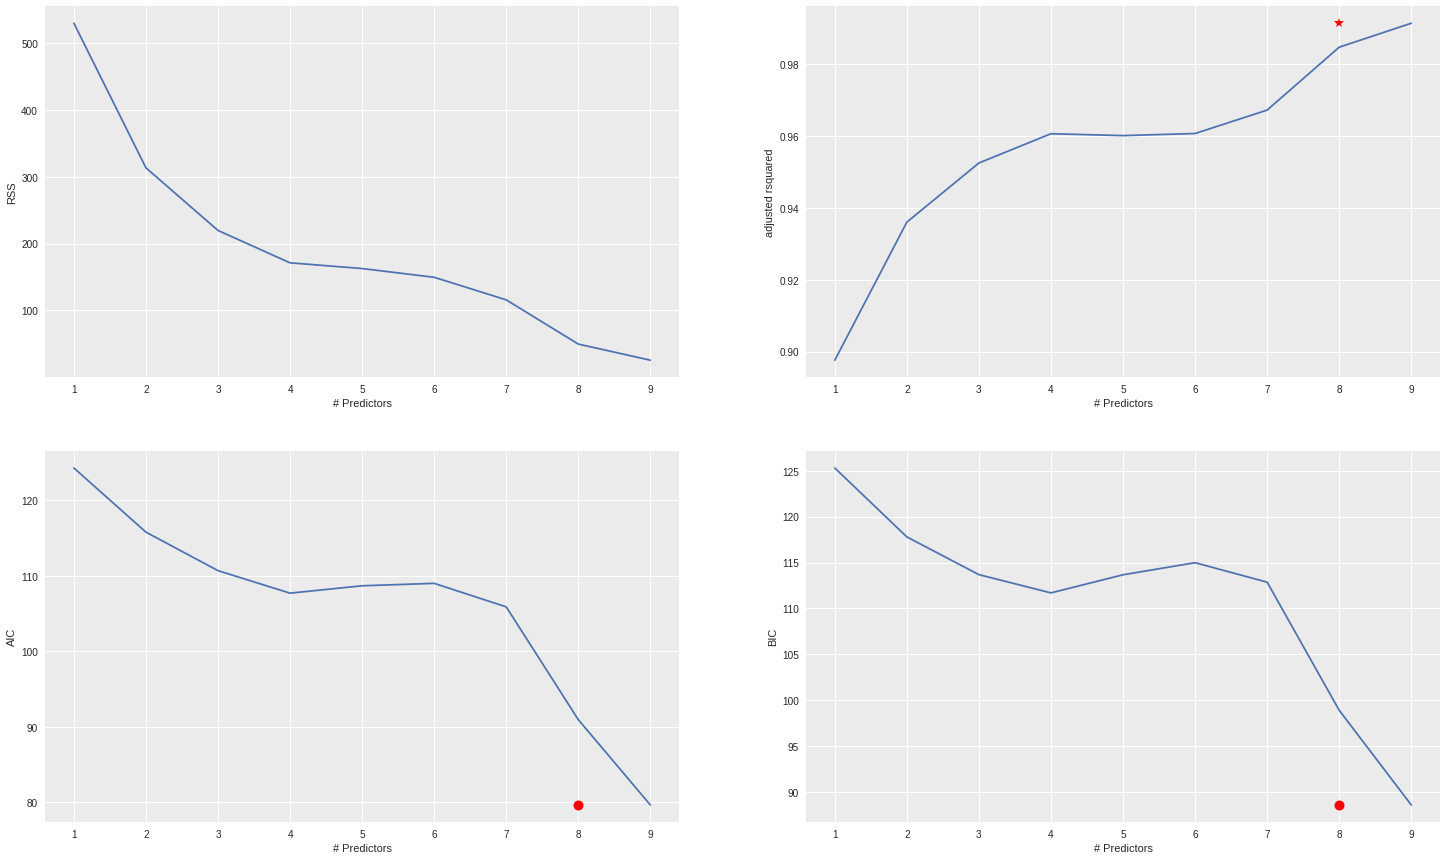

In [ ]:
plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_fwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_fwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "*r")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_fwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_fwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
plt.show()

In [ ]:
MSE_testing_2  = []
model_2 = []

In [ ]:
def Metrics2(modelname, model_id, x_test,y_test,x_train, y_train):
  """A function that tracks the performance metrics of MSE of the models used"""

  modelname.fit(x_train,y_train )
  model_2.append(model_id)

  MSE_testing_2.append(mean_squared_error(y_test, modelname.predict(x_test) ) )

  return None


In [ ]:
x_train_ex_2X1, y_train_ex_2X1, \
\
 x_test_ex_2X1, y_test_ex_2X1

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
x_train_ex_2X1[['x12','x2','x14']]

x12        x2       x14
5  -0.801436 -0.058493 -1.122818
17  0.670467 -0.054866  0.743867
40 -0.339709 -0.399129  0.532073
49 -1.963961 -0.968348 -1.934214
1  -1.160388  0.632197 -0.693783
12 -2.493565 -2.128654 -2.952473
37  0.265667 -0.849909 -0.107079
24 -1.069586 -1.952286 -0.231972
6   0.319567 -0.006480 -0.273385
23  0.249223 -0.006836  0.758676
36  0.454177  0.995142  0.154010
21  1.957121  0.080801  2.113125
19 -1.208864 -0.340531 -1.302929
9  -1.780572 -0.716121 -2.694915
39 -1.006198  0.992131 -1.449685
46 -0.574049 -0.804856  0.370258
3  -1.119825 -1.948956 -0.188976
0   0.839004  1.304956  0.865839
47  0.374319 -0.506964  0.122094
44  2.304708  1.165718  2.090835

In [ ]:
lm.fit(x_train_ex_2X1[['x12','x2','x14']], y_train_ex_2X1)

LinearRegression()

The intercept is given by:

In [ ]:
lm.intercept_

array([-0.42032744])

In [ ]:
y_hat = lm.predict(x_test_ex_2X1[['x12','x2','x14']])

In [ ]:
mean_squared_error(y_test_ex_2X1, y_hat)

16.243110395896707

In [ ]:
Metrics2(lm, 'Forward  Stepwise: Linear Regression', x_test_ex_2X1[['x12','x2','x14']], y_test_ex_2X1,\
         x_train_ex_2X1[['x12','x2','x14']], y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression'], [16.243110395896707])

### LASSO

In [ ]:
alphaLasso = np.linspace(0, 1, 100)
n_folds  = 4
lasso = Lasso()
tuned_parameters = [{"alpha": alphaLasso}]

In [ ]:
lass_model = GridSearchCV(lasso, tuned_parameters, cv = n_folds , refit=False)

In [ ]:
lass_model.fit(x_train_ex_2X1, y_train_ex_2X1)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])}],
             refit=False)

In [ ]:
out_lasso = lass_model.cv_results_
out_lasso = pd.DataFrame(out_lasso)
out_lasso.iloc[:, 4:].sort_values(by = "rank_test_score")

param_alpha                           params  split0_test_score  \
2     0.020202  {'alpha': 0.020202020202020204}           0.891911   
5     0.050505   {'alpha': 0.05050505050505051}           0.895817   
8     0.080808   {'alpha': 0.08080808080808081}           0.916993   
9     0.090909   {'alpha': 0.09090909090909091}           0.919040   
7     0.070707   {'alpha': 0.07070707070707072}           0.911615   
..         ...                              ...                ...   
57    0.575758    {'alpha': 0.5757575757575758}           0.867081   
59     0.59596     {'alpha': 0.595959595959596}           0.866389   
58    0.585859    {'alpha': 0.5858585858585859}           0.866736   
18    0.181818   {'alpha': 0.18181818181818182}           0.876714   
17    0.171717   {'alpha': 0.17171717171717174}           0.875597   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
2            0.955296           0.959607           0.885379         0.923048   
5            0.972393           0.953422           0.864807         0.921610   
8            0.965240           0.957038           0.844398         0.920917   
9            0.964931           0.958174           0.839964         0.920527   
7            0.965181           0.955865           0.849328         0.920497   
..                ...                ...                ...              ...   
57           0.918201           0.992913           0.868806         0.911750   
59           0.915702           0.993048           0.871604         0.911686   
58           0.916961           0.992983           0.869691         0.911593   
18           0.955771           0.970799           0.842326         0.911403   
17           0.958048           0.969274           0.841664         0.911146   

    std_test_score  rank_test_score  
2         0.034515                1  
5         0.043251                2  
8         0.047801                3  
9         0.049703                4  
7         0.045803                5  
..             ...              ...  
57        0.051158               96  
59        0.050730               97  
58        0.051042               98  
18        0.053552               99  
17        0.054014              100  

[100 rows x 9 columns]

In [ ]:
best_lass_model = Lasso(alpha = 0.020202 )

In [ ]:
Metrics2(best_lass_model, 'Lasso(alpha = 0.020202 )', x_test_ex_2X1, y_test_ex_2X1,\
         x_train_ex_2X1, y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression', 'Lasso(alpha = 0.020202 )'],
 [16.243110395896707, 43.45736308636197])

### Ridge

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:

parameters= [{'alpha': [0.001,0.1,1, 10, 100, 150, 200, 350, 300, 400, 500, 600, 700, 800, 900, 1000]} ]
Grid = GridSearchCV(RR, parameters, cv=4 )
Grid.fit(x_train_ex_2X1, y_train_ex_2X1)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 150, 200, 350, 300,
                                    400, 500, 600, 700, 800, 900, 1000]}])

In [ ]:
BestRR = Grid.best_estimator_
BestRR

Ridge(alpha=1)

In [ ]:
out = Grid.cv_results_
out = pd.DataFrame(out)
out.iloc[:, 4:].sort_values(by = "rank_test_score")

param_alpha            params  split0_test_score  split1_test_score  \
2            1      {'alpha': 1}           0.903907           0.964886   
3           10     {'alpha': 10}           0.908519           0.916676   
1          0.1    {'alpha': 0.1}           0.849705           0.969517   
0        0.001  {'alpha': 0.001}           0.822348           0.942074   
4          100    {'alpha': 100}           0.844401           0.783395   
5          150    {'alpha': 150}           0.800258           0.716806   
6          200    {'alpha': 200}           0.757098           0.655874   
8          300    {'alpha': 300}           0.678216           0.551404   
7          350    {'alpha': 350}           0.643028           0.506975   
9          400    {'alpha': 400}           0.610587           0.466989   
10         500    {'alpha': 500}           0.553173           0.398226   
11         600    {'alpha': 600}           0.504301           0.341470   
12         700    {'alpha': 700}           0.462417           0.293983   
13         800    {'alpha': 800}           0.426233           0.253742   
14         900    {'alpha': 900}           0.394721           0.219247   
15        1000   {'alpha': 1000}           0.367067           0.189373   

    split2_test_score  split3_test_score  mean_test_score  std_test_score  \
2            0.976422           0.911909         0.939281        0.031763   
3            0.984114           0.916743         0.931513        0.030553   
1            0.931232           0.916265         0.916680        0.043271   
0            0.866491           0.900215         0.882782        0.043980   
4            0.949989           0.902021         0.869951        0.062408   
5            0.902739           0.847819         0.816906        0.068228   
6            0.852585           0.789447         0.763751        0.071123   
8            0.757885           0.679026         0.666633        0.073981   
7            0.715483           0.629677         0.623791        0.074930   
9            0.676575           0.584469         0.584655        0.075775   
10           0.608408           0.505450         0.516314        0.077303   
11           0.551246           0.439373         0.459098        0.078677   
12           0.502960           0.383685         0.410761        0.079905   
13           0.461790           0.336295         0.369515        0.080992   
14           0.426352           0.295568         0.333972        0.081947   
15           0.395574           0.260244         0.303065        0.082785   

    rank_test_score  
2                 1  
3                 2  
1                 3  
0                 4  
4                 5  
5                 6  
6                 7  
8                 8  
7                 9  
9                10  
10               11  
11               12  
12               13  
13               14  
14               15  
15               16

We now have that $\alpha = 1$ is the best hyper parameter for our ridge regression.

In [ ]:
BestRR2 = Ridge(alpha = 1 )

In [ ]:
Metrics2(BestRR2, 'Ridge(alpha = 1 )', x_test_ex_2X1, y_test_ex_2X1,\
         x_train_ex_2X1, y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression',
  'Lasso(alpha = 0.020202 )',
  'Ridge(alpha = 1 )'],
 [16.243110395896707, 43.45736308636197, 21.614073900534155])

### PCR

In [ ]:
pca = make_pipeline( PCA(), LinearRegression())
# pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())

In [ ]:
pca.fit(x_train_ex_2X1, y_train_ex_2X1)

Pipeline(steps=[('pca', PCA()), ('linearregression', LinearRegression())])

In [ ]:
explained = pca[0].explained_variance_ratio_
cumulative_explained = explained.cumsum()
# np.cumsum(np.round(explained, decimals=4)*100)
cumulative_explained

array([0.75185341, 0.91490567, 0.95386741, 0.9666907 , 0.97603554,
       0.98271278, 0.98844612, 0.99110574, 0.99310638, 0.99485925,
       0.99640201, 0.99755125, 0.99859433, 0.99913825, 0.99954016,
       0.99977176, 0.99990745, 0.99999958, 1.        , 1.        ])

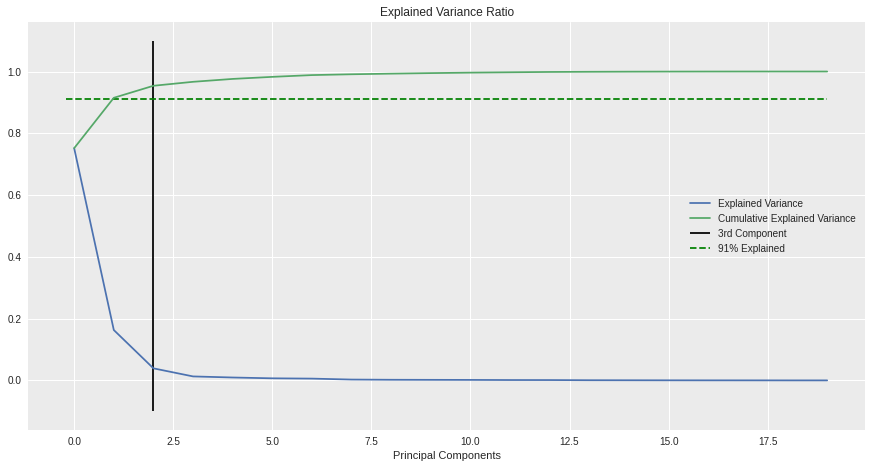

In [ ]:
plt.figure(figsize=(15,7.5))
plt.plot(range(0, 20), explained, label='Explained Variance')
plt.plot(range(0, 20), cumulative_explained, label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.vlines(x=2, ymin= -0.1, ymax=1.1, colors= 'k', label = "3rd Component")
plt.hlines(y=0.91, xmin=-0.2, xmax=19, colors= 'g', linestyles='--', label = "91% Explained")
plt.title('Explained Variance Ratio')
plt.legend()
plt.show()

In [ ]:
cumulative_explained[1]

0.9149056673269951

*About 91.5% of the variance is explained by the first 2 components.

In [ ]:
pca_selected = make_pipeline( PCA(2), LinearRegression())


In [ ]:
Metrics2(pca_selected, 'PCA(n_components = 2)', x_test_ex_2X1, y_test_ex_2X1,\
         x_train_ex_2X1, y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression',
  'Lasso(alpha = 0.020202 )',
  'Ridge(alpha = 1 )',
  'PCA(n_components = 2)'],
 [16.243110395896707,
  43.45736308636197,
  21.614073900534155,
  12.08368852993375])

In [ ]:
Metrics_Ex2a = pd.DataFrame(list(zip(model_2, MSE_testing_2)), columns =['model', 'MSE_testing'])
# pd.DataFrame(model,R_2_training, columns = ['model', 'R_2_training'] )
Metrics_Ex2a

model  MSE_testing
0  Forward  Stepwise: Linear Regression    16.243110
1              Lasso(alpha = 0.020202 )    43.457363
2                     Ridge(alpha = 1 )    21.614074
3                 PCA(n_components = 2)    12.083689

In [ ]:
Metrics_Ex2a.sort_values(by = 'MSE_testing', inplace = True)


In [ ]:
Metrics_Ex2a.reset_index(drop = True, inplace = True)

In [ ]:
Metrics_Ex2a = Metrics_Ex2a.round(decimals = 4)
Metrics_Ex2a

model  MSE_testing
0                 PCA(n_components = 2)      12.0837
1  Forward  Stepwise: Linear Regression      16.2431
2                     Ridge(alpha = 1 )      21.6141
3              Lasso(alpha = 0.020202 )      43.4574

In [ ]:
Metrics_Ex2a.to_csv("Metrics_Ex2a.csv")

## Part (b): $\rho = 0.5$  

In [ ]:
X = x_train_ex_2X2
y =  y_train_ex_2X2.y
# x_train_ex_2X2, x_test_ex_2X2, y_train_ex_2X2, y_test_ex_2X2
X.shape, y.shape

((20, 20), (20,))

We use a similar approach to perform forward stepwise selection, using a slight modification of the functions we defined above:

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in tqdm(range(1,len(X.columns)+1)):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

  0%|          | 0/20 [00:00<?, ?it/s]

Processed  20 models on 1 predictors in 0.04708123207092285 seconds.
Processed  19 models on 2 predictors in 0.044313669204711914 seconds.
Processed  18 models on 3 predictors in 0.039223432540893555 seconds.
Processed  17 models on 4 predictors in 0.03328967094421387 seconds.
Processed  16 models on 5 predictors in 0.04860663414001465 seconds.
Processed  15 models on 6 predictors in 0.03728199005126953 seconds.
Processed  14 models on 7 predictors in 0.030238628387451172 seconds.
Processed  13 models on 8 predictors in 0.0417177677154541 seconds.
Processed  12 models on 9 predictors in 0.027989864349365234 seconds.
Processed  11 models on 10 predictors in 0.025998353958129883 seconds.
Processed  10 models on 11 predictors in 0.03066086769104004 seconds.
Processed  9 models on 12 predictors in 0.024927139282226562 seconds.
Processed  8 models on 13 predictors in 0.020734071731567383 seconds.
Processed  7 models on 14 predictors in 0.018062591552734375 seconds.
Processed  6 models on 15

In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[4, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              19.72
Date:                Wed, 11 May 2022   Prob (F-statistic):                    0.000281
Time:                        00:00:38   Log-Likelihood:                         -63.289
No. Observations:                  20   AIC:                                      128.6
Df Residuals:                      19   BIC:                                      129.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              24.33
Date:                Tue, 10 May 2022   Prob (F-statistic):                    1.21e-06
Time:                        15:28:04   Log-Likelihood:                         -46.047
No. Observations:                  20   AIC:                                      104.1
Df Residuals:                      14   BIC:                                      110.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

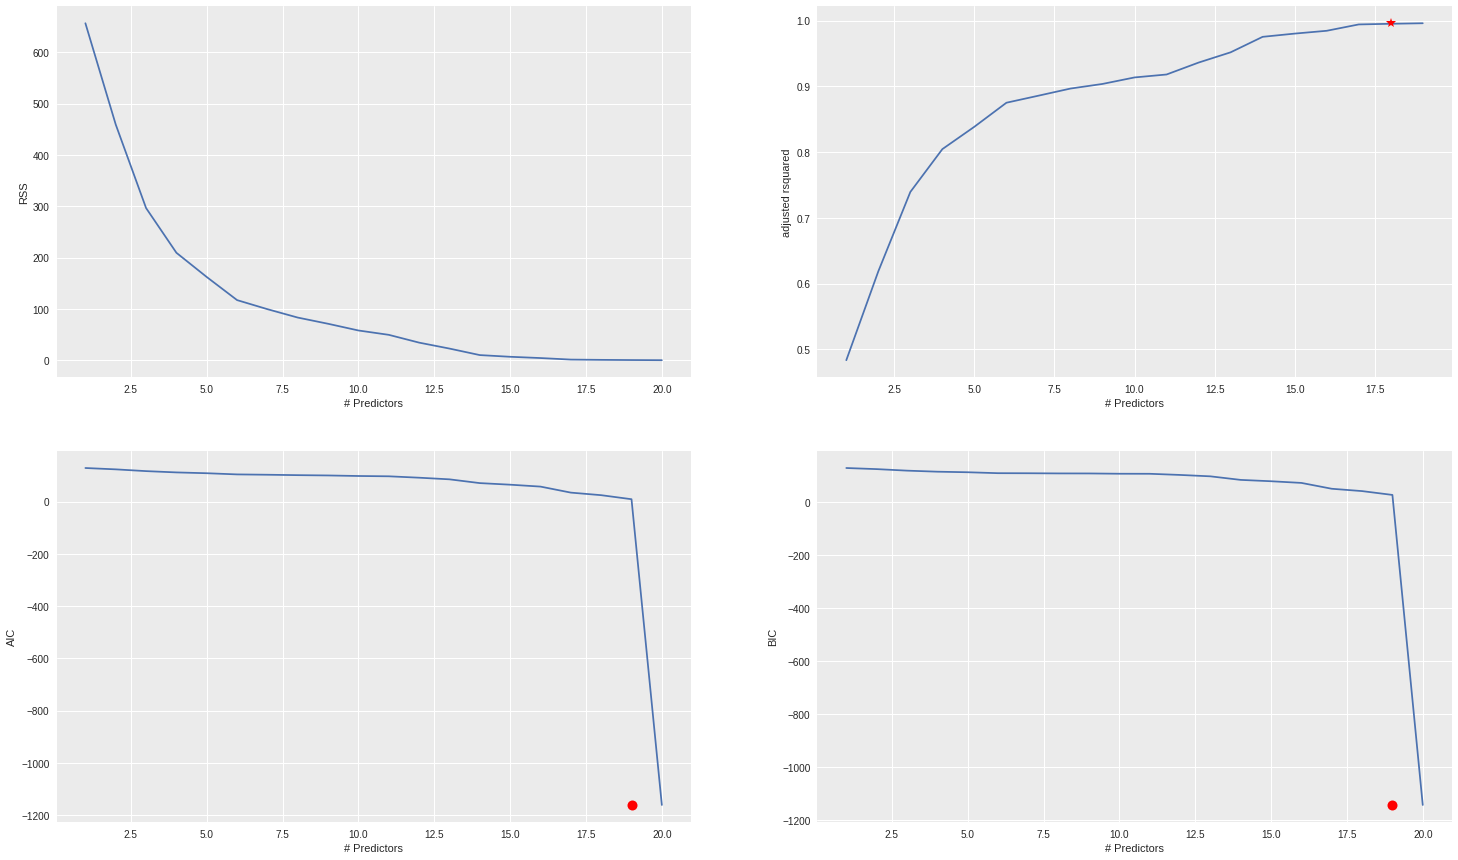

In [ ]:
plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_fwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_fwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "*r")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_fwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_fwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
plt.show()

### Forward StepWise

In [ ]:
MSE_testing_2  = []
model_2 = []

In [ ]:
def Metrics2(modelname, model_id, x_test,y_test,x_train, y_train):
  """A function that tracks the performance metrics of MSE of the models used"""

  modelname.fit(x_train,y_train )
  model_2.append(model_id)

  MSE_testing_2.append(mean_squared_error(y_test, modelname.predict(x_test) ) )

  return None


In [ ]:
x_train_ex_2X2, x_test_ex_2X2, y_train_ex_2X2, y_test_ex_2X2

In [ ]:
x_train_ex_2X1 =  x_train_ex_2X2
y_train_ex_2X1 = y_train_ex_2X2
x_test_ex_2X1 = x_test_ex_2X2
y_test_ex_2X1 =  y_test_ex_2X2

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
x_train_ex_2X1[['x4','x14','x5','x3']]

x4       x14        x5        x3
5  -1.221455  0.442866 -1.610377  1.478360
17  1.147040 -1.994587  1.654486 -0.077483
40  1.453041 -0.512945 -0.108697  0.925008
49 -1.036667 -0.489375 -0.891585 -0.098173
1   0.731880  0.856053  0.421096  1.291691
12 -0.834779 -0.927427 -1.171803 -1.756119
37 -0.570934 -0.951620  1.070681 -0.299155
24 -1.700037  0.966818  0.030301 -0.943834
6   1.269709 -0.027707  0.456377  1.386086
23  0.902255  1.096747 -0.075896  0.259462
36  0.729340  0.795039  0.629496 -0.631677
21 -0.064135 -0.314447 -0.007021  0.157645
19 -0.374983 -1.340605  0.259231 -0.072834
9   0.057820  1.282369  1.296202  0.832776
39 -0.742240  1.631761  0.719555  0.675918
46 -0.717066 -0.647731 -0.206579  1.158914
3   1.242309  0.700002  1.445155  1.105247
0   0.015109  0.282980 -1.223183 -1.030984
47 -0.306322  0.169425 -0.279015 -0.084024
44 -1.723775  0.225789 -1.721978  0.101018

In [ ]:
lm.fit(x_train_ex_2X1[['x4','x14','x5','x3']], y_train_ex_2X1)

LinearRegression()

The intercept is given by:

In [ ]:
lm.intercept_

array([0.84189396])

In [ ]:
y_hat = lm.predict(x_test_ex_2X1[['x4','x14','x5','x3']])

In [ ]:
mean_squared_error(y_test_ex_2X1, y_hat)

60.82916198164782

In [ ]:
model_2= []
MSE_testing_2 = []

In [ ]:
Metrics2(lm, 'Forward  Stepwise: Linear Regression', x_test_ex_2X1[['x4','x14','x5','x3']], y_test_ex_2X1,\
         x_train_ex_2X1[['x4','x14','x5','x3']], y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression'], [60.82916198164782])

### LASSO

In [ ]:
alphaLasso = np.linspace(0, 1, 100)
n_folds  = 4
lasso = Lasso()
tuned_parameters = [{"alpha": alphaLasso}]

In [ ]:
lass_model = GridSearchCV(lasso, tuned_parameters, cv = n_folds , refit=False)

In [ ]:
lass_model.fit(x_train_ex_2X1, y_train_ex_2X1)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])}],
             refit=False)

In [ ]:
out_lasso = lass_model.cv_results_
out_lasso = pd.DataFrame(out_lasso)
out_lasso.iloc[:, 4:].sort_values(by = "rank_test_score")

param_alpha                           params  split0_test_score  \
56    0.565657    {'alpha': 0.5656565656565657}           0.866885   
55    0.555556    {'alpha': 0.5555555555555556}           0.864859   
54    0.545455    {'alpha': 0.5454545454545455}           0.862708   
53    0.535354    {'alpha': 0.5353535353535354}           0.860438   
52    0.525253    {'alpha': 0.5252525252525253}           0.858048   
..         ...                              ...                ...   
4     0.040404   {'alpha': 0.04040404040404041}           0.497405   
0          0.0                   {'alpha': 0.0}          -0.197283   
3     0.030303  {'alpha': 0.030303030303030304}           0.439949   
2     0.020202  {'alpha': 0.020202020202020204}           0.408451   
1     0.010101  {'alpha': 0.010101010101010102}           0.233597   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
56           0.584312           0.452465           0.769192         0.668214   
55           0.586517           0.451546           0.769205         0.668032   
54           0.588513           0.450579           0.769095         0.667724   
53           0.590385           0.449564           0.768862         0.667312   
52           0.592112           0.448496           0.768507         0.666791   
..                ...                ...                ...              ...   
4            0.621889          -0.800688           0.091064         0.102418   
0           -0.828047           0.196583           0.824970        -0.000944   
3            0.607338          -0.999318          -0.114667        -0.016675   
2            0.595557          -1.210143          -0.298251        -0.126097   
1            0.593199          -1.433269          -0.412355        -0.254707   

    std_test_score  rank_test_score  
56        0.160666                1  
55        0.160068                2  
54        0.159469                3  
53        0.158857                4  
52        0.158236                5  
..             ...              ...  
4         0.557134               96  
0         0.600791               97  
3         0.627114               98  
2         0.709105               99  
1         0.769943              100  

[100 rows x 9 columns]

In [ ]:
best_lass_model = Lasso(alpha = 0.565657 )

In [ ]:
Metrics2(best_lass_model, 'Lasso(alpha = 0.0.565657 )', x_test_ex_2X1, y_test_ex_2X1,\
         x_train_ex_2X1, y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression', 'Lasso(alpha = 0.0.565657 )'],
 [60.82916198164782, 44.23133105406035])

### RIDGE

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:

parameters= [{'alpha': [0.001,0.1,1, 10, 100, 150, 200, 350, 300, 400, 500, 600, 700, 800, 900, 1000]} ]
Grid = GridSearchCV(RR, parameters, cv=4 )
Grid.fit(x_train_ex_2X1, y_train_ex_2X1)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 150, 200, 350, 300,
                                    400, 500, 600, 700, 800, 900, 1000]}])

In [ ]:
BestRR = Grid.best_estimator_
BestRR

Ridge(alpha=10)

In [ ]:
out = Grid.cv_results_
out = pd.DataFrame(out)
out.iloc[:, 4:].sort_values(by = "rank_test_score")

param_alpha            params  split0_test_score  split1_test_score  \
3           10     {'alpha': 10}           0.750779           0.755954   
2            1      {'alpha': 1}           0.583457           0.701344   
4          100    {'alpha': 100}           0.411712           0.421431   
5          150    {'alpha': 150}           0.310207           0.330037   
6          200    {'alpha': 200}           0.243242           0.270501   
8          300    {'alpha': 300}           0.160739           0.197988   
7          350    {'alpha': 350}           0.133579           0.174322   
9          400    {'alpha': 400}           0.111982           0.155578   
10         500    {'alpha': 500}           0.079812           0.127778   
11         600    {'alpha': 600}           0.057002           0.108156   
12         700    {'alpha': 700}           0.039989           0.093569   
13         800    {'alpha': 800}           0.026813           0.082300   
1          0.1    {'alpha': 0.1}           0.219414           0.646739   
14         900    {'alpha': 900}           0.016308           0.073334   
15        1000   {'alpha': 1000}           0.007737           0.066029   
0        0.001  {'alpha': 0.001}           0.047911           0.634046   

    split2_test_score  split3_test_score  mean_test_score  std_test_score  \
3            0.051759           0.615185         0.543419        0.289418   
2           -0.285717           0.514784         0.378467        0.389228   
4            0.048722           0.297522         0.294847        0.150221   
5            0.036851           0.217437         0.223633        0.115912   
6            0.027758           0.165877         0.176844        0.094243   
8            0.015303           0.103744         0.119443        0.068859   
7            0.010918           0.083629         0.100612        0.060937   
9            0.007334           0.067754         0.085662        0.054856   
10           0.001840           0.044305         0.063434        0.046282   
11          -0.002166           0.027822         0.047704        0.040692   
12          -0.005212           0.015606         0.035988        0.036893   
13          -0.007606           0.006190         0.026924        0.034237   
1           -0.838792           0.072235         0.024899        0.541462   
14          -0.009535          -0.001288         0.019705        0.032339   
15          -0.011123          -0.007372         0.013818        0.030960   
0           -0.992756          -0.180550        -0.122838        0.583549   

    rank_test_score  
3                 1  
2                 2  
4                 3  
5                 4  
6                 5  
8                 6  
7                 7  
9                 8  
10                9  
11               10  
12               11  
13               12  
1                13  
14               14  
15               15  
0                16

We now have that $\alpha = 10$ is the best hyper parameter for our ridge regression.

In [ ]:
BestRR2 = Ridge(alpha = 10 )

In [ ]:
Metrics2(BestRR2, 'Ridge(alpha = 10 )', x_test_ex_2X1, y_test_ex_2X1,\
         x_train_ex_2X1, y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression',
  'Lasso(alpha = 0.0.565657 )',
  'Ridge(alpha = 10 )'],
 [60.82916198164782, 44.23133105406035, 40.965586164616774])

### Principal Component Regression

In [ ]:
pca = make_pipeline( PCA(), LinearRegression())
# pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())

In [ ]:
pca.fit(x_train_ex_2X1, y_train_ex_2X1)

Pipeline(steps=[('pca', PCA()), ('linearregression', LinearRegression())])

In [ ]:
explained = pca[0].explained_variance_ratio_
cumulative_explained = explained.cumsum()
# np.cumsum(np.round(explained, decimals=4)*100)
cumulative_explained

array([0.22141157, 0.4006876 , 0.52349764, 0.62058761, 0.71337883,
       0.77470059, 0.82099942, 0.86358974, 0.90040532, 0.93237172,
       0.95663028, 0.97606212, 0.98355827, 0.98982958, 0.99442437,
       0.99750086, 0.99880096, 0.9994795 , 1.        , 1.        ])

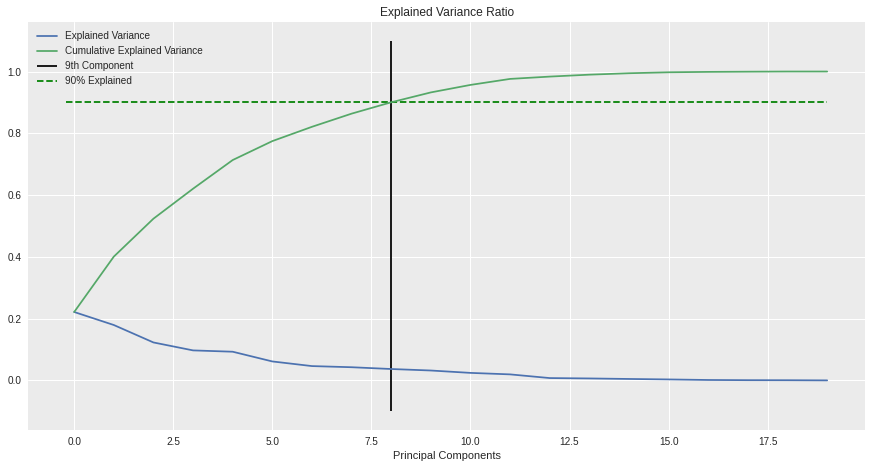

In [ ]:
plt.figure(figsize=(15,7.5))
plt.plot(range(0, 20), explained, label='Explained Variance')
plt.plot(range(0, 20), cumulative_explained, label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.vlines(x=8, ymin= -0.1, ymax=1.1, colors= 'k', label = "9th Component")
plt.hlines(y=0.90, xmin=-0.2, xmax=19, colors= 'g', linestyles='--', label = "90% Explained")
plt.title('Explained Variance Ratio')
plt.legend()
plt.show()

In [ ]:
cumulative_explained[8]

0.9004053237017374

*About 90% of the variance is explained by the first 9 components.

In [ ]:
pca_selected = make_pipeline( PCA(9), LinearRegression())


In [ ]:
Metrics2(pca_selected, 'PCA(n_components = 9)', x_test_ex_2X1, y_test_ex_2X1,\
         x_train_ex_2X1, y_train_ex_2X1)
model_2, MSE_testing_2

(['Forward  Stepwise: Linear Regression',
  'Lasso(alpha = 0.0.565657 )',
  'Ridge(alpha = 10 )',
  'PCA(n_components = 9)'],
 [60.82916198164782, 44.23133105406035, 40.965586164616774, 43.71692431269139])

In [ ]:
Metrics_Ex2b = pd.DataFrame(list(zip(model_2, MSE_testing_2)), columns =['model', 'MSE_testing'])
# pd.DataFrame(model,R_2_training, columns = ['model', 'R_2_training'] )
Metrics_Ex2b

model  MSE_testing
0  Forward  Stepwise: Linear Regression    60.829162
1            Lasso(alpha = 0.0.565657 )    44.231331
2                    Ridge(alpha = 10 )    40.965586
3                 PCA(n_components = 9)    43.716924

In [ ]:
Metrics_Ex2b.sort_values(by = 'MSE_testing', inplace = True)


In [ ]:
Metrics_Ex2b.reset_index(drop = True, inplace = True)

In [ ]:
Metrics_Ex2b = Metrics_Ex2b.round(decimals = 4)
Metrics_Ex2b

model  MSE_testing
0                    Ridge(alpha = 10 )      40.9656
1                 PCA(n_components = 9)      43.7169
2            Lasso(alpha = 0.0.565657 )      44.2313
3  Forward  Stepwise: Linear Regression      60.8292

In [ ]:
Metrics_Ex2b.to_csv("Metrics_Ex2b.csv")